# West investigation
On this notebook i performed ABBA-BABA test to check the tree concordance with Far-west populations and explored regions where gene flow has occour:

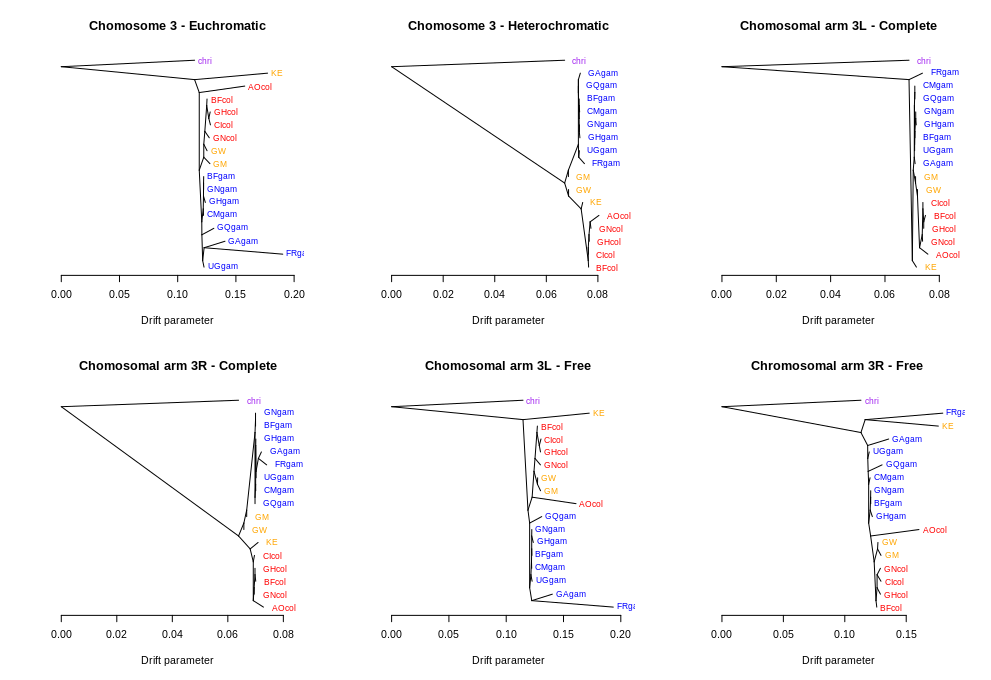

In [2]:
Image(filename='images/treemix/Chromosome_3_tree_only.png')

In [5]:
%run imports.ipynb
import allel
import zarr
import pandas as pd
import petl as etl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
palette = sns.color_palette()

In [3]:
calldata_out= zarr.open('data/outgroup_alleles_phase2.zarr/')
calldata_out.tree()

/
 ├── 2L
 │   ├── arab (8906423, 2) int32
 │   ├── chri (8906423, 2) int32
 │   ├── epir (8906423, 2) int32
 │   ├── mela (8906423, 2) int32
 │   ├── meru (8906423, 2) int32
 │   └── quad (8906423, 2) int32
 ├── 2R
 │   ├── arab (12047846, 2) int32
 │   ├── chri (12047846, 2) int32
 │   ├── epir (12047846, 2) int32
 │   ├── mela (12047846, 2) int32
 │   ├── meru (12047846, 2) int32
 │   └── quad (12047846, 2) int32
 ├── 3L
 │   ├── arab (7897666, 2) int32
 │   ├── chri (7897666, 2) int32
 │   ├── epir (7897666, 2) int32
 │   ├── mela (7897666, 2) int32
 │   ├── meru (7897666, 2) int32
 │   └── quad (7897666, 2) int32
 ├── 3R
 │   ├── arab (10752701, 2) int32
 │   ├── chri (10752701, 2) int32
 │   ├── epir (10752701, 2) int32
 │   ├── mela (10752701, 2) int32
 │   ├── meru (10752701, 2) int32
 │   └── quad (10752701, 2) int32
 └── X
     ├── arab (4472265, 2) int32
     ├── chri (4472265, 2) int32
     ├── epir (4472265, 2) int32
     ├── mela (4472265, 2) int32
     ├── meru (4472265, 2) int32
     └── quad (4472265, 2) int32

In [7]:
calldata_biallel= zarr.open('data/phase2_biallel_allele_count.zarr/')
calldata_biallel.tree()

/
 ├── .zarr
 ├── 2L
 │   ├── AOcol (8906423, 2) int32
 │   ├── BFcol (8906423, 2) int32
 │   ├── BFgam (8906423, 2) int32
 │   ├── CIcol (8906423, 2) int32
 │   ├── CMgam (8906423, 2) int32
 │   ├── FRgam (8906423, 2) int32
 │   ├── GAgam (8906423, 2) int32
 │   ├── GHcol (8906423, 2) int32
 │   ├── GHgam (8906423, 2) int32
 │   ├── GM (8906423, 2) int32
 │   ├── GNcol (8906423, 2) int32
 │   ├── GNgam (8906423, 2) int32
 │   ├── GQgam (8906423, 2) int32
 │   ├── GW (8906423, 2) int32
 │   ├── KE (8906423, 2) int32
 │   └── UGgam (8906423, 2) int32
 ├── 2R
 │   ├── AOcol (12047846, 2) int32
 │   ├── BFcol (12047846, 2) int32
 │   ├── BFgam (12047846, 2) int32
 │   ├── CIcol (12047846, 2) int32
 │   ├── CMgam (12047846, 2) int32
 │   ├── FRgam (12047846, 2) int32
 │   ├── GAgam (12047846, 2) int32
 │   ├── GHcol (12047846, 2) int32
 │   ├── GHgam (12047846, 2) int32
 │   ├── GM (12047846, 2) int32
 │   ├── GNcol (12047846, 2) int32
 │   ├── GNgam (12047846, 2) int32
 │   ├── GQgam (12047846, 2) int32
 │   ├── GW (12047846, 2) int32
 │   ├── KE (12047846, 2) int32
 │   └── UGgam (12047846, 2) int32
 ├── 3L
 │   ├── AOcol (7897666, 2) int32
 │   ├── BFcol (7897666, 2) int32
 │   ├── BFgam (7897666, 2) int32
 │   ├── CIcol (7897666, 2) int32
 │   ├── CMgam (7897666, 2) int32
 │   ├── FRgam (7897666, 2) int32
 │   ├── GAgam (7897666, 2) int32
 │   ├── GHcol (7897666, 2) int32
 │   ├── GHgam (7897666, 2) int32
 │   ├── GM (7897666, 2) int32
 │   ├── GNcol (7897666, 2) int32
 │   ├── GNgam (7897666, 2) int32
 │   ├── GQgam (7897666, 2) int32
 │   ├── GW (7897666, 2) int32
 │   ├── KE (7897666, 2) int32
 │   └── UGgam (7897666, 2) int32
 ├── 3R
 │   ├── AOcol (10752701, 2) int32
 │   ├── BFcol (10752701, 2) int32
 │   ├── BFgam (10752701, 2) int32
 │   ├── CIcol (10752701, 2) int32
 │   ├── CMgam (10752701, 2) int32
 │   ├── FRgam (10752701, 2) int32
 │   ├── GAgam (10752701, 2) int32
 │   ├── GHcol (10752701, 2) int32
 │   ├── GHgam (10752701, 2) int32
 │   ├── GM (10752701, 2) int32
 │   ├── GNcol (10752701, 2) int32
 │   ├── GNgam (10752701, 2) int32
 │   ├── GQgam (10752701, 2) int32
 │   ├── GW (10752701, 2) int32
 │   ├── KE (10752701, 2) int32
 │   └── UGgam (10752701, 2) int32
 └── X
     ├── AOcol (4472265, 2) int32
     ├── BFcol (4472265, 2) int32
     ├── BFgam (4472265, 2) int32
     ├── CIcol (4472265, 2) int32
     ├── CMgam (4472265, 2) int32
     ├── FRgam (4472265, 2) int32
     ├── GAgam (4472265, 2) int32
     ├── GHcol (4472265, 2) int32
     ├── GHgam (4472265, 2) int32
     ├── GM (4472265, 2) int32
     ├── GNcol (4472265, 2) int32
     ├── GNgam (4472265, 2) int32
     ├── GQgam (4472265, 2) int32
     ├── GW (4472265, 2) int32
     ├── KE (4472265, 2) int32
     └── UGgam (4472265, 2) int32

In [6]:
callset_biallel = callset_biallel
callset_biallel.tree()

/
 ├── 2L
 │   ├── calldata
 │   │   └── GT (8906423, 1142, 2) int8
 │   ├── samples (1142,) object
 │   └── variants
 │       ├── ABHet (8906423,) float32
 │       ├── ABHom (8906423,) float32
 │       ├── AC (8906423,) int32
 │       ├── AF (8906423,) float32
 │       ├── ALT (8906423,) |S1
 │       ├── AN (8906423,) int32
 │       ├── Accessible (8906423,) bool
 │       ├── BaseCounts (8906423, 4) int32
 │       ├── BaseQRankSum (8906423,) float32
 │       ├── Coverage (8906423,) int32
 │       ├── CoverageMQ0 (8906423,) int32
 │       ├── DP (8906423,) int32
 │       ├── DS (8906423,) bool
 │       ├── Dels (8906423,) float32
 │       ├── FILTER_BaseQRankSum (8906423,) bool
 │       ├── FILTER_FS (8906423,) bool
 │       ├── FILTER_HRun (8906423,) bool
 │       ├── FILTER_HighCoverage (8906423,) bool
 │       ├── FILTER_HighMQ0 (8906423,) bool
 │       ├── FILTER_LowCoverage (8906423,) bool
 │       ├── FILTER_LowMQ (8906423,) bool
 │       ├── FILTER_LowQual (8906423,) bool
 │       ├── FILTER_NoCoverage (8906423,) bool
 │       ├── FILTER_PASS (8906423,) bool
 │       ├── FILTER_QD (8906423,) bool
 │       ├── FILTER_ReadPosRankSum (8906423,) bool
 │       ├── FILTER_RefN (8906423,) bool
 │       ├── FILTER_RepeatDUST (8906423,) bool
 │       ├── FS (8906423,) float32
 │       ├── HRun (8906423,) int32
 │       ├── HW (8906423,) float32
 │       ├── HaplotypeScore (8906423,) float32
 │       ├── HighCoverage (8906423,) int32
 │       ├── HighMQ0 (8906423,) int32
 │       ├── InbreedingCoeff (8906423,) float32
 │       ├── LowCoverage (8906423,) int32
 │       ├── LowMQ (8906423,) int32
 │       ├── LowPairing (8906423,) int32
 │       ├── MLEAC (8906423,) int32
 │       ├── MLEAF (8906423,) float32
 │       ├── MQ (8906423,) float32
 │       ├── MQ0 (8906423,) int32
 │       ├── MQRankSum (8906423,) float32
 │       ├── NDA (8906423,) int32
 │       ├── NoCoverage (8906423,) int32
 │       ├── OND (8906423,) float32
 │       ├── POS (8906423,) int32
 │       ├── QD (8906423,) float32
 │       ├── QUAL (8906423,) float32
 │       ├── REF (8906423,) |S1
 │       ├── RPA (8906423,) int32
 │       ├── RU (8906423,) object
 │       ├── ReadPosRankSum (8906423,) float32
 │       ├── RefMasked (8906423,) bool
 │       ├── RefN (8906423,) bool
 │       ├── RepeatDUST (8906423,) bool
 │       ├── RepeatMasker (8906423,) bool
 │       ├── RepeatTRF (8906423,) bool
 │       ├── STR (8906423,) bool
 │       ├── VariantType (8906423,) object
 │       ├── altlen (8906423,) int32
 │       ├── is_snp (8906423,) bool
 │       └── numalt (8906423,) int32
 ├── 2R
 │   ├── calldata
 │   │   └── GT (12047846, 1142, 2) int8
 │   ├── samples (1142,) object
 │   └── variants
 │       ├── ABHet (12047846,) float32
 │       ├── ABHom (12047846,) float32
 │       ├── AC (12047846,) int32
 │       ├── AF (12047846,) float32
 │       ├── ALT (12047846,) |S1
 │       ├── AN (12047846,) int32
 │       ├── Accessible (12047846,) bool
 │       ├── BaseCounts (12047846, 4) int32
 │       ├── BaseQRankSum (12047846,) float32
 │       ├── Coverage (12047846,) int32
 │       ├── CoverageMQ0 (12047846,) int32
 │       ├── DP (12047846,) int32
 │       ├── DS (12047846,) bool
 │       ├── Dels (12047846,) float32
 │       ├── FILTER_BaseQRankSum (12047846,) bool
 │       ├── FILTER_FS (12047846,) bool
 │       ├── FILTER_HRun (12047846,) bool
 │       ├── FILTER_HighCoverage (12047846,) bool
 │       ├── FILTER_HighMQ0 (12047846,) bool
 │       ├── FILTER_LowCoverage (12047846,) bool
 │       ├── FILTER_LowMQ (12047846,) bool
 │       ├── FILTER_LowQual (12047846,) bool
 │       ├── FILTER_NoCoverage (12047846,) bool
 │       ├── FILTER_PASS (12047846,) bool
 │       ├── FILTER_QD (12047846,) bool
 │       ├── FILTER_ReadPosRankSum (12047846,) bool
 │       ├── FILTER_RefN (12047846,) bool
 │       ├── FILTER_RepeatDUST (12047846,) bool
 │       ├── FS (12047846,) float32
 │       ├── HRun (12047846,) int32
 │       ├── HW (12047846,) float32
 │       ├── Hap

In [16]:
an_col = 'AOcol', 'BFcol', 'GNcol', 'CIcol', 'GHcol'
an_gam = 'GHgam', 'CMgam', 'BFgam', 'GNgam', 'GQgam', 'UGgam', 'GAgam', 'FRgam'
an_na = 'GM', 'GW'
out_species = ['arab', 'chri', 'epir', 'mela', 'meru', 'quad']

In [9]:
chromosomes = ['3L', '3R']

In [10]:
ac_cache = dict()

def load_ac(chrom, pop):
    if (chrom, pop) in ac_cache:
        return ac_cache[chrom, pop]
    else:
        if pop in out_species:
            ac = calldata_out[chrom][pop]
        else:
            ac = calldata_biallel[chrom][pop]
            ac_cache[chrom, pop] = ac
        return ac
    
fourpop_cache = dict()

In [11]:
def f4_analysis(chroms, A, B, C, D, regions=None, blen=100000, plot=False, ax=None):
    
    
    
    region_str = ",".join(["{0}_{1}".format(r.start, r.stop) for r in regions])
    
    key = (",".join(chroms), region_str, A, B, C, D, blen)
    if key in fourpop_cache:
        # re-use from cache
        d, d_se, d_z, d_vb, d_vj = fourpop_cache[key]
        
    else:
        # load allele counts
        aca = np.vstack([load_ac(chrom, A)[region] for chrom, region in zip(chroms, regions)])
        acb = np.vstack([load_ac(chrom, B)[region] for chrom, region in zip(chroms, regions)])
        acc = np.vstack([load_ac(chrom, C)[region] for chrom, region in zip(chroms, regions)])
        acd = np.vstack([load_ac(chrom, D)[region] for chrom, region in zip(chroms, regions)])
            
        # run D test
        d, d_se, d_z, d_vb, d_vj = allel.blockwise_patterson_d(aca, acb, acc, acd, 
                                                                     blen=blen)
        
        # cache for re-use
        fourpop_cache[key] = d, d_se, d_z, d_vb, d_vj
    
    return d, d_se, d_z, d_vb, d_vj

def f4_analys(As, Bs, Cs, Ds, chroms=chromosomes, regions=None, blen=100000):
    
    if regions is None:
        regions = [slice(None)] * 4
    
    region_str = ",".join(["{0}_{1}".format(r.start, r.stop) for r in regions])
    # normalise inputs
    if not isinstance(chroms, (list, tuple)):
        chroms = [chroms]
    if not isinstance(As, (list, tuple)):
        As = [As]
    if not isinstance(Bs, (list, tuple)):
        Bs = [Bs]
    if not isinstance(Cs, (list, tuple)):
        Cs = [Cs]
    if not isinstance(Ds, (list, tuple)):
        Ds = [Ds]
        
    # setup output table
    tbl = [['chromosome', 'test', 'D', 'SE', 'Z']]

    for A in As:
        for B in Bs:
            if A != B:
                for C in Cs:
                    for D in Ds:
                        if C != D:
                            d, d_se, d_z, _, _ = f4_analysis(chroms, A, B, C, D, 
                                                             regions=regions, blen=blen)
                            test = 'D(%s, %s; %s, %s)' % (A, B, C, D)
                            row = [",".join(chroms), test, d, d_se, d_z]
                            tbl += [row]

    # display results
    (etl
     .wrap(tbl)
     .interpolate('D', '%.3f')
     .interpolate('SE', '%.4f')
     .interpolate('Z', '%.1f')
     .displayall(index_header=False, 
                 tr_style=lambda row: 'background-color: %s' % ('#afa' if float(row.Z) > 5 else '#aaf' if float(row.Z) < -5 else 'white')))

-----------------------------
## Testing Euchromatic Region of Chromosome 3

In [26]:
A = an_col
B = an_na
C = an_gam
D = 'chri'

In [27]:
f4_analys(A, B, C, D, chroms=("3L", "3R"),
                regions=(slice(15000000, 41000000), slice(1000000, 37000000)))

chromosome,test,D,SE,Z
"3L,3R","D(AOcol, GM; GHgam, chri)",0.017,0.0062,2.8
"3L,3R","D(AOcol, GM; CMgam, chri)",0.014,0.0064,2.1
"3L,3R","D(AOcol, GM; BFgam, chri)",0.014,0.0064,2.2
"3L,3R","D(AOcol, GM; GNgam, chri)",0.013,0.0065,2.0
"3L,3R","D(AOcol, GM; GQgam, chri)",0.028,0.0059,4.7
"3L,3R","D(AOcol, GM; UGgam, chri)",0.021,0.0058,3.7
"3L,3R","D(AOcol, GM; GAgam, chri)",0.042,0.0047,8.9
"3L,3R","D(AOcol, GM; FRgam, chri)",0.042,0.0044,9.4
"3L,3R","D(AOcol, GW; GHgam, chri)",0.033,0.0039,8.5
"3L,3R","D(AOcol, GW; CMgam, chri)",0.031,0.0043,7.1


-------------------
## Testing Heterochromatic Region of Chromosome 3

In [20]:
A = an_col
B = an_na
C = an_gam
D = 'chri'

In [21]:
f4_analys(A, B, C, D, chroms=("3L", "3R"),
                regions=(slice(1, 15000000), slice(37000000 , 53200684)))

chromosome,test,D,SE,Z
"3L,3R","D(AOcol, GM; GHgam, chri)",0.040,0.0046,8.8
"3L,3R","D(AOcol, GM; CMgam, chri)",0.043,0.0048,9.0
"3L,3R","D(AOcol, GM; BFgam, chri)",0.041,0.0048,8.6
"3L,3R","D(AOcol, GM; GNgam, chri)",0.041,0.0046,8.9
"3L,3R","D(AOcol, GM; GQgam, chri)",0.061,0.0055,11.1
"3L,3R","D(AOcol, GM; UGgam, chri)",0.048,0.0049,9.8
"3L,3R","D(AOcol, GM; GAgam, chri)",0.067,0.0054,12.4
"3L,3R","D(AOcol, GM; FRgam, chri)",0.063,0.0058,10.8
"3L,3R","D(AOcol, GW; GHgam, chri)",0.051,0.0043,11.9
"3L,3R","D(AOcol, GW; CMgam, chri)",0.054,0.0047,11.4


-----------------------------------
## Testing 3L

In [28]:
A = an_col
B = an_na
C = an_gam
D = 'chri'

In [29]:
f4_analys(A, B, C, D, chroms=("3L"))

chromosome,test,D,SE,Z
3L,"D(AOcol, GM; GHgam, chri)",0.040,0.0046,8.8
3L,"D(AOcol, GM; CMgam, chri)",0.043,0.0048,9.0
3L,"D(AOcol, GM; BFgam, chri)",0.041,0.0048,8.6
3L,"D(AOcol, GM; GNgam, chri)",0.041,0.0046,8.9
3L,"D(AOcol, GM; GQgam, chri)",0.061,0.0055,11.1
3L,"D(AOcol, GM; UGgam, chri)",0.048,0.0049,9.8
3L,"D(AOcol, GM; GAgam, chri)",0.067,0.0054,12.4
3L,"D(AOcol, GM; FRgam, chri)",0.063,0.0058,10.8
3L,"D(AOcol, GW; GHgam, chri)",0.051,0.0043,11.9
3L,"D(AOcol, GW; CMgam, chri)",0.054,0.0047,11.4


-----------------
## Testing 3R

In [30]:
A = an_col
B = an_na
C = an_gam
D = 'chri'

In [31]:
f4_analys(A, B, C, D, chroms=("3R"))

chromosome,test,D,SE,Z
3R,"D(AOcol, GM; GHgam, chri)",0.015,0.0077,1.9
3R,"D(AOcol, GM; CMgam, chri)",0.013,0.0078,1.6
3R,"D(AOcol, GM; BFgam, chri)",0.013,0.0078,1.6
3R,"D(AOcol, GM; GNgam, chri)",0.011,0.0079,1.4
3R,"D(AOcol, GM; GQgam, chri)",0.027,0.0069,3.9
3R,"D(AOcol, GM; UGgam, chri)",0.019,0.0073,2.7
3R,"D(AOcol, GM; GAgam, chri)",0.039,0.0065,6.0
3R,"D(AOcol, GM; FRgam, chri)",0.037,0.0067,5.6
3R,"D(AOcol, GW; GHgam, chri)",0.032,0.0054,5.8
3R,"D(AOcol, GW; CMgam, chri)",0.030,0.0055,5.4


-----------------------
## Testing 3L-free region

In [38]:
pos_all = allel.SortedIndex(callset_biallel['3L']["variants/POS"])
loc = pos_all.intersect_range(15000000, 41000000)
loc1, loc2 = pos_all.locate_intersection(loc)

In [34]:
def count_alleles_pos(chrom, start, stop):
    
    metadata = pd.read_csv("samples.meta.txt", sep="\t")
    pos_all = allel.SortedIndex(callset_biallel[chrom]["variants/POS"])
    loc = pos_all.intersect_range(start, stop)
    loc1, loc2 = pos_all.locate_intersection(loc)
    geno = allel.GenotypeChunkedArray(callset_biallel[chrom]["calldata/GT"])
    geno_subset = geno.subset(sel0=loc1)
    ac = geno_subset.count_alleles()[:]
    grp = metadata.groupby("population")
    grp_indices = grp.indices
    ac_subpops = geno_subset.count_alleles_subpops(grp_indices)

    return ac_subpops

In [35]:
ac_3L_free = count_alleles_pos('3L', 15000000, 41000000)
ac_3L_free

<AlleleCountsChunkedTable shape=(5989818,) dtype=[('AOcol', '<i4', (2,)), ('BFcol', '<i4', (2,)), ('BFgam', '<i4', (2,)), ('CIcol', '<i4', (2,)), ('CMgam', '<i4', (2,)), ('FRgam', '<i4', (2,)), ('GAgam', '<i4', (2,)), ('GHcol', '<i4', (2,)), ('GHgam', '<i4', (2,)), ('GM', '<i4', (2,)), ('GNcol', '<i4', (2,)), ('GNgam', '<i4', (2,)), ('GQgam', '<i4', (2,)), ('GW', '<i4', (2,)), ('KE', '<i4', (2,)), ('UGgam', '<i4', (2,))]
   nbytes=731.2M cbytes=64.7M cratio=11.3
   values=allel.chunked.storage_zarr.ZarrTable>

In [39]:
ac_chri_3L_free = allel.AlleleCountsChunkedArray(calldata_out['3L']['chri']).compress(loc1)
ac_chri_3L_free

<AlleleCountsChunkedArray shape=(5989818, 2) dtype=int32 chunks=(93591, 2)
   nbytes=45.7M cbytes=4.0M cratio=11.5
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [40]:
ac_cache = dict()

def load_ac(pop):
    if (pop) in ac_cache:
        return ac_cache[pop]
    else:
        if pop in out_species:
            ac = ac_chri_3L_free
        else:
            ac = ac_3L_free[pop]
            ac_cache[pop] = ac
        return ac
    
fourpop_cache = dict()

In [41]:
#this is the function that perform the test
def f4_analysis(A, B, C, D, blen=100000, plot=False, ax=None):
    
    key = (A, B, C, D, blen)
    if key in fourpop_cache:
        # re-use from cache
        d, d_se, d_z, d_vb, d_vj = fourpop_cache[key]
        
    else:
        # load allele counts
        aca = load_ac(A)
        acb = load_ac(B)
        acc = load_ac(C)
        acd = load_ac(D)

        # run D test
        d, d_se, d_z, d_vb, d_vj = allel.blockwise_patterson_d(aca, acb, acc, acd, blen=blen)
        
        # cache for re-use
        fourpop_cache[key] = d, d_se, d_z, d_vb, d_vj
    
    return d, d_se, d_z, d_vb, d_vj

#this is the function that give me to display multiple tests on a table
def f4_analyses(As, Bs, Cs, Ds, blen=100000):
    
    # normalise inputs
    if not isinstance(As, (list, tuple)):
        As = [As]
    if not isinstance(Bs, (list, tuple)):
        Bs = [Bs]
    if not isinstance(Cs, (list, tuple)):
        Cs = [Cs]
    if not isinstance(Ds, (list, tuple)):
        Ds = [Ds]
        
    # setup output table
    tbl = [['test', 'D', 'SE', 'Z']]
    for A in As:
        for B in Bs:
            if A != B:
                for C in Cs:
                    for D in Ds:
                        if C != D:
                            d, d_se, d_z, _, _ = f4_analysis(A, B, C, D, blen=blen)
                            test = '3L-free  -  D(%s, %s; %s, %s)' % (A, B, C, D)
                            row = [test, d, d_se, d_z]
                            tbl += [row]
    
    # display results
    (etl
     .wrap(tbl)
     .interpolate('D', '%.3f')
     .interpolate('SE', '%.4f')
     .interpolate('Z', '%.1f')
     .displayall(index_header=False, tr_style=lambda row: 'background-color: %s' % ('#afa' if float(row.Z) > 5 else '#aaf' if float(row.Z) < -5 else 'white')))


In [42]:
A = an_col
B = an_na
C = an_gam
D = 'chri'

In [43]:
f4_analyses(A, B, C, D)

test,D,SE,Z
"3L-free - D(AOcol, GM; GHgam, chri)",0.045,0.0026,17.1
"3L-free - D(AOcol, GM; CMgam, chri)",0.045,0.0027,16.4
"3L-free - D(AOcol, GM; BFgam, chri)",0.043,0.0028,15.6
"3L-free - D(AOcol, GM; GNgam, chri)",0.043,0.0028,15.7
"3L-free - D(AOcol, GM; GQgam, chri)",0.054,0.0026,20.6
"3L-free - D(AOcol, GM; UGgam, chri)",0.046,0.0027,17.3
"3L-free - D(AOcol, GM; GAgam, chri)",0.058,0.0031,18.9
"3L-free - D(AOcol, GM; FRgam, chri)",0.051,0.0028,17.8
"3L-free - D(AOcol, GW; GHgam, chri)",0.048,0.0026,18.6
"3L-free - D(AOcol, GW; CMgam, chri)",0.048,0.0027,17.9


In [44]:
def plot_test(As,Bs,Cs,Ds, blen=100000):
    # normalise inputs
    if not isinstance(As, (list, tuple)):
        As = [As]
    if not isinstance(Bs, (list, tuple)):
        Bs = [Bs]
    if not isinstance(Cs, (list, tuple)):
        Cs = [Cs]
    if not isinstance(Ds, (list, tuple)):
        Ds = [Ds]
   
    tbl = []
    tbl2 = [["Block_1","Block_2","Block_3","Block_4","Block_5","Block_6","Block_7","Block_8","Block_9","Block_10","Block_11","Block_12","Block_13","Block_14","Block_15","Block_16","Block_17","Block_18","Block_19","Block_20","Block_21","Block_22","Block_23","Block_24","Block_25","Block_26","Block_27","Block_28","Block_29","Block_30","Block_31","Block_32","Block_33","Block_34","Block_35","Block_36","Block_37","Block_38","Block_39","Block_40","Block_41","Block_42","Block_43","Block_44","Block_45","Block_46","Block_47","Block_48","Block_49","Block_50","Block_51","Block_52","Block_53","Block_54","Block_55","Block_56","Block_57","Block_58","Block_59"]]
    tbl3 = [['Test']]

    for A in As:
        for B in Bs:
            if A != B:
                for C in Cs:
                    for D in Ds:
                        if C != D:
                            d, d_se, d_z, b1, _ = f4_analysis(A, B, C, D, blen=blen)
                            test = "3L-free - D-Test(%s, %s, %s, %s)" % (A, B, C, D)
                            row = b1
                            tbl += [row]
                            row2 = [test]
                            tbl2 += [row]
                            tbl3 += [row2]
    df1 = etl.todataframe(tbl2)
    df2 = etl.todataframe(tbl3)
    results = df2.join(df1)
    tbl=np.array(tbl)
    #print (tbl)
    fig, ax = plt.subplots(figsize=(14, 4))
    # mean
    pos = callset_biallel['3L']['variants']['POS'][:]
    windows = allel.moving_statistic(loc, statistic=lambda v: [v[0], v[-1]], size=blen)
    x = np.asarray(windows).mean(axis=1)    
    y = np.median(tbl, axis=0)
    plt.plot(x, y, lw=1, label = "median", color=palette[3]) 
    
    #min and max
    y5 = np.max(tbl, axis=0)
    y6 = np.min(tbl, axis=0)
    ax.fill_between(x, y5, y6,label = "min and max", color=palette[9], alpha=.4)
    
    # interquartile range
    y1 = np.percentile(tbl, 25, axis=0)
    y2 = np.percentile(tbl, 75, axis=0)
    ax.fill_between(x, y1, y2, label = "interquartile range", color=palette[2], alpha=.6)
    # 5-95 range
    y3 = np.percentile(tbl, 5, axis=0)
    y4 = np.percentile(tbl, 95, axis=0)
    ax.fill_between(x, y3, y4,label = "5-95 range", color=palette[4], alpha=.4)

    
    ax.set_title(('ABBA BABA Test - Blocks scan (%s bp) on 3L-free') % (blen))
    sns.despine(ax=ax, offset=10)
    ax.set_xlim(loc[0], loc.max())
    ax.set_xlabel('position (bp)')
    #ax.set_ylim(0,0.018)
    sns.despine(ax=ax, offset=10)
    fig.tight_layout()
    # show a legend on the plot 
    plt.legend() 

    # function to show the plot 
    plt.show()
    
    return results, tbl, plt    

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


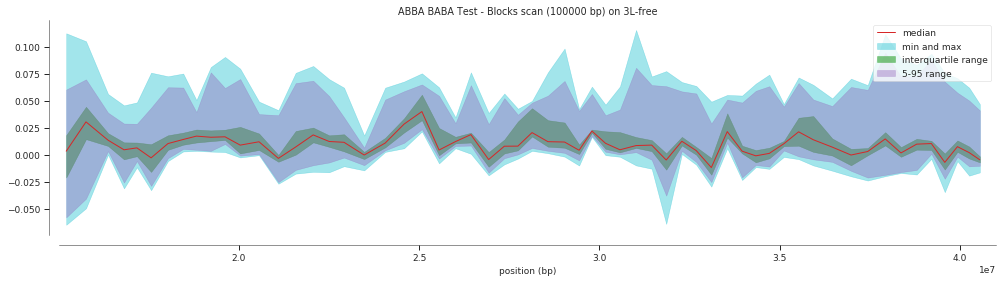

In [45]:
results_3L, bloks_3L, plot_3L = plot_test(A,B,C,D, blen = 100000)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


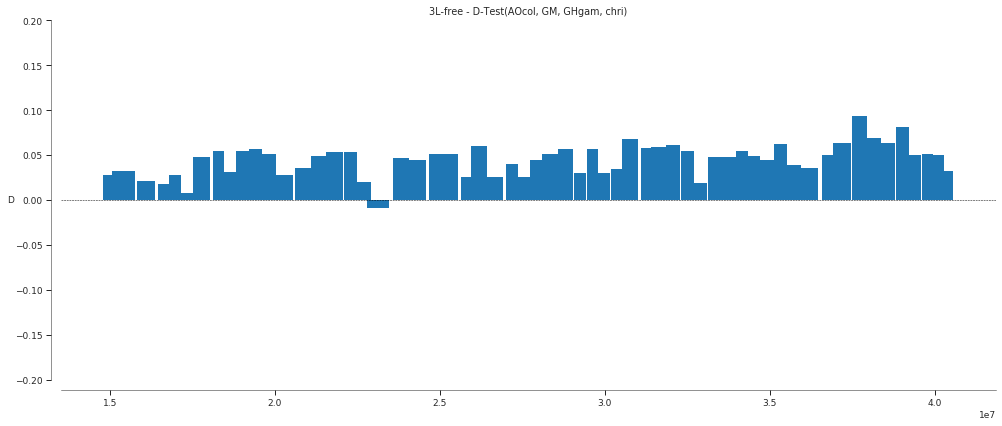

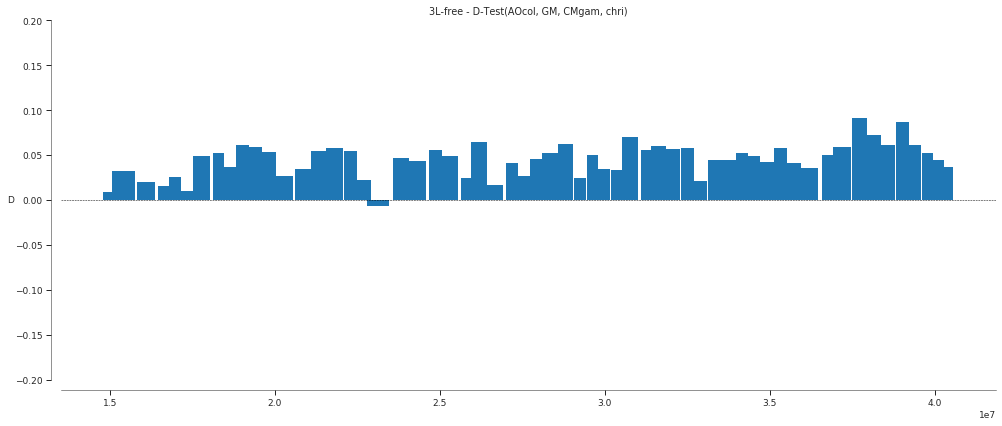

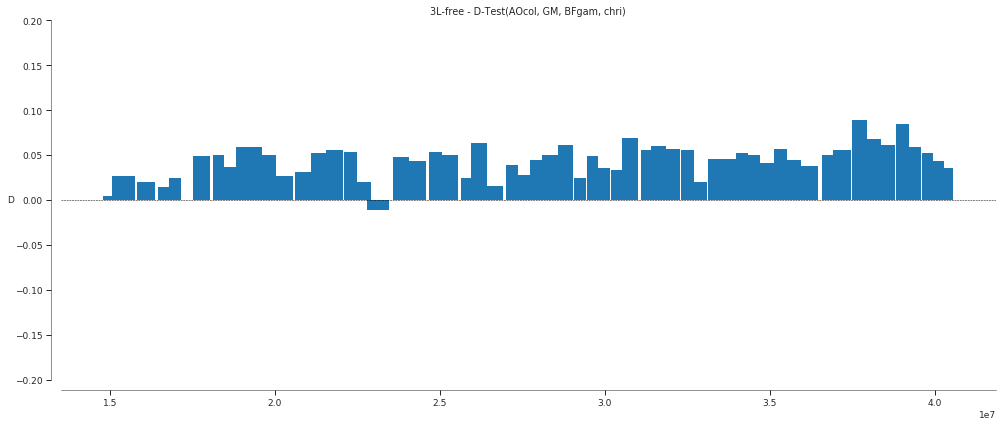

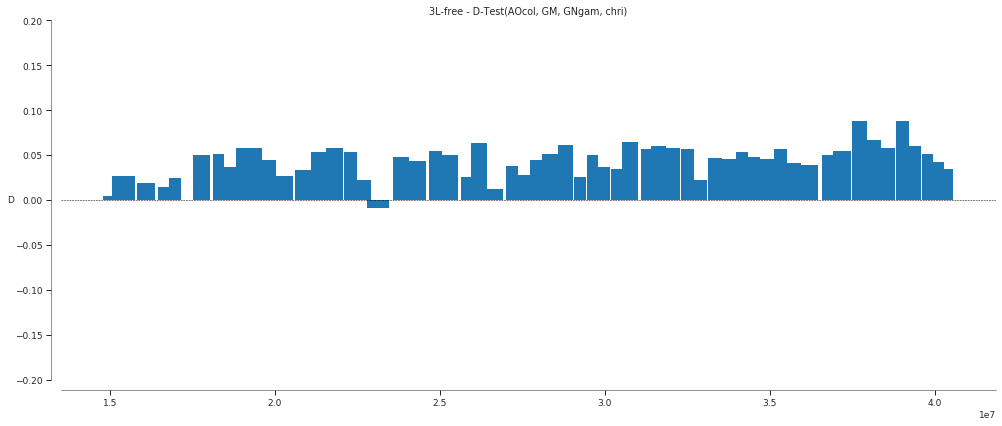

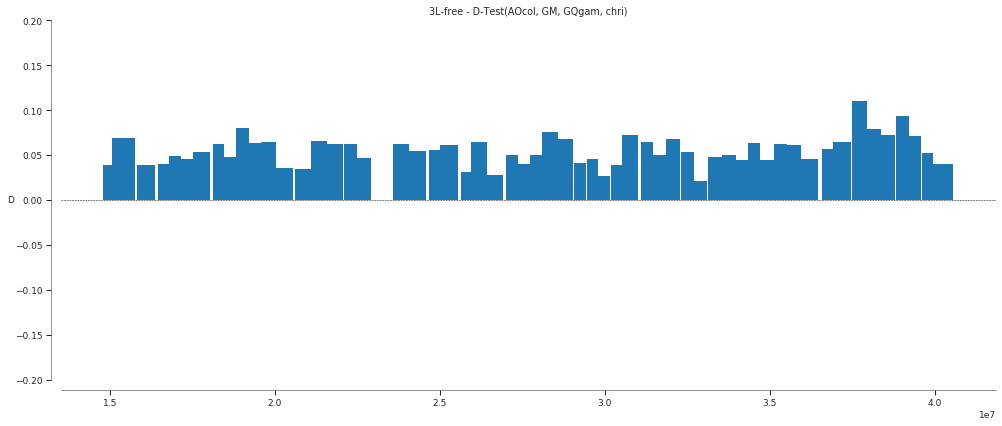

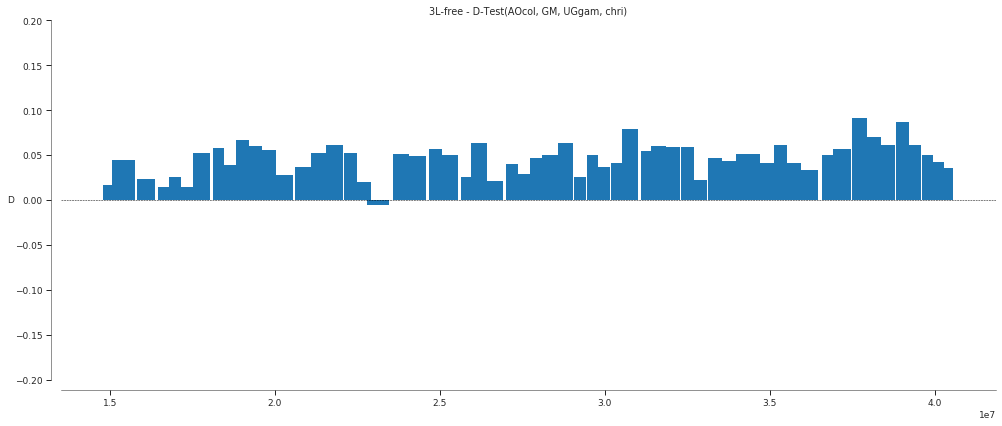

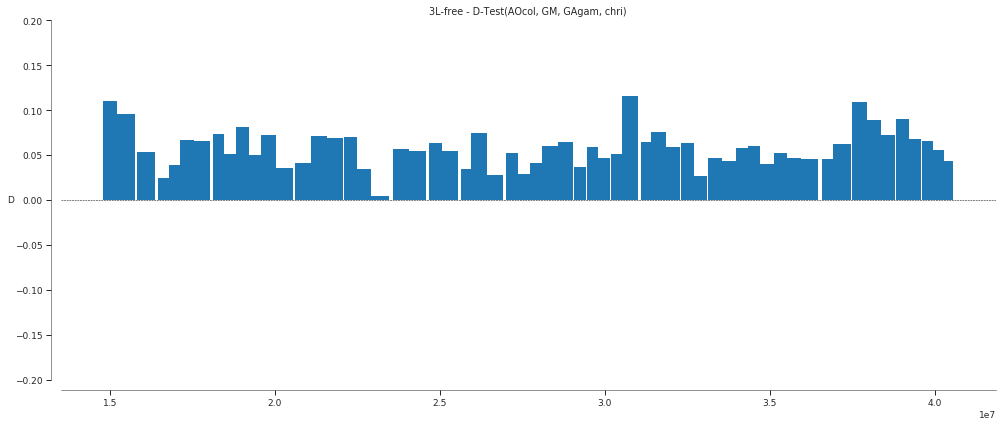

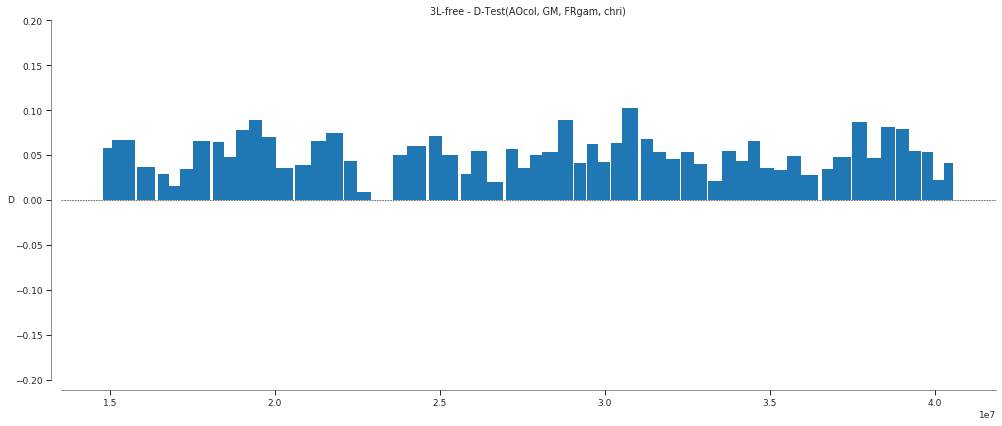

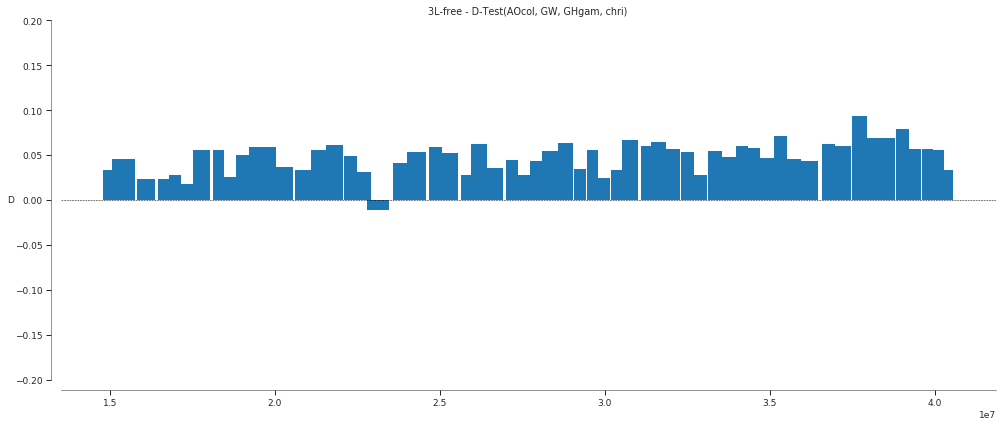

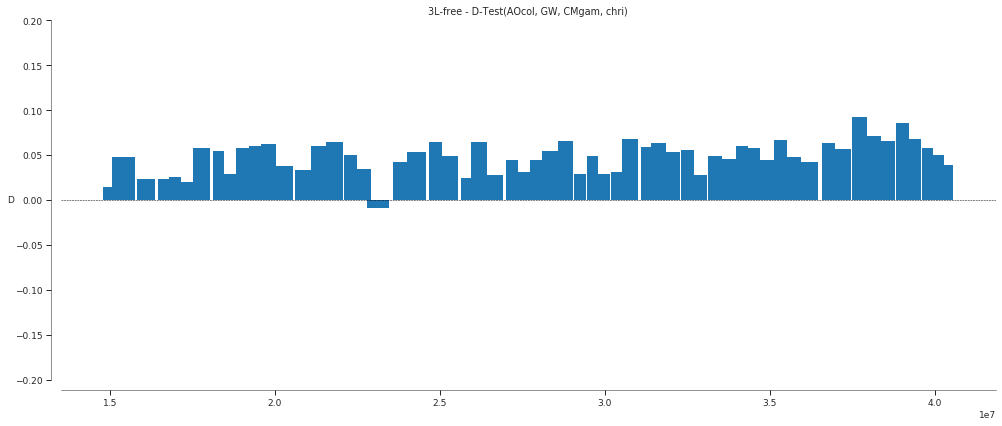

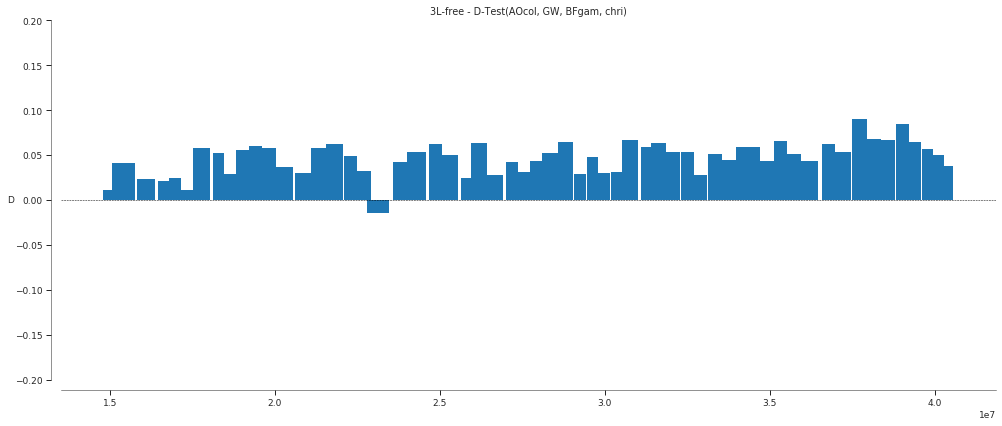

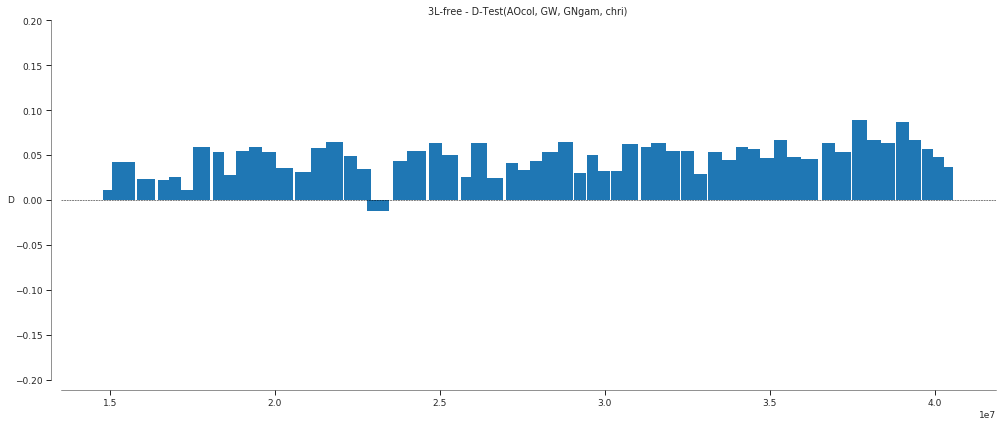

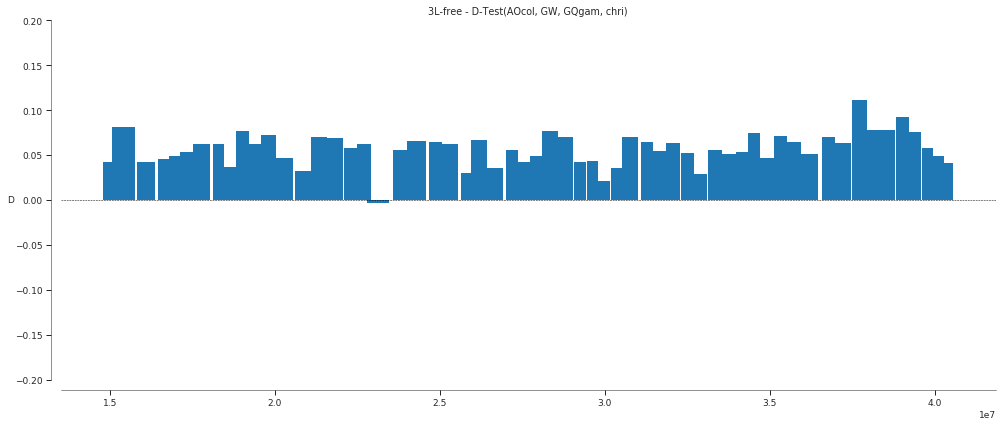

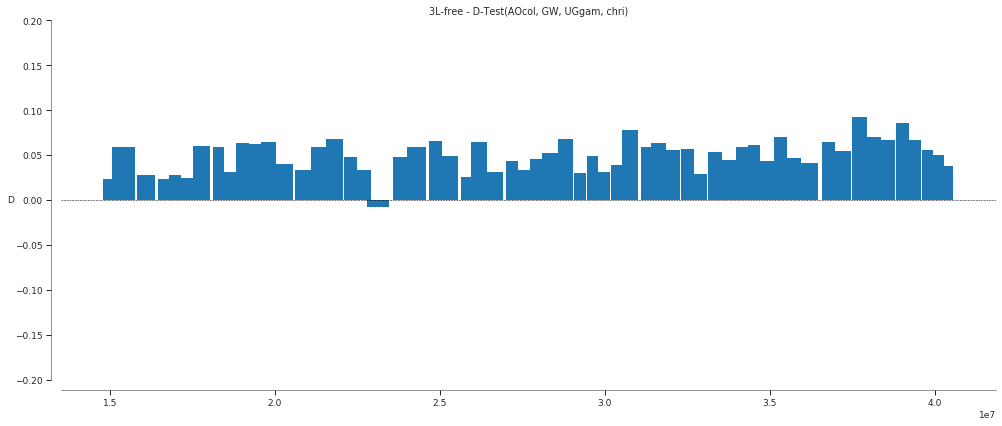

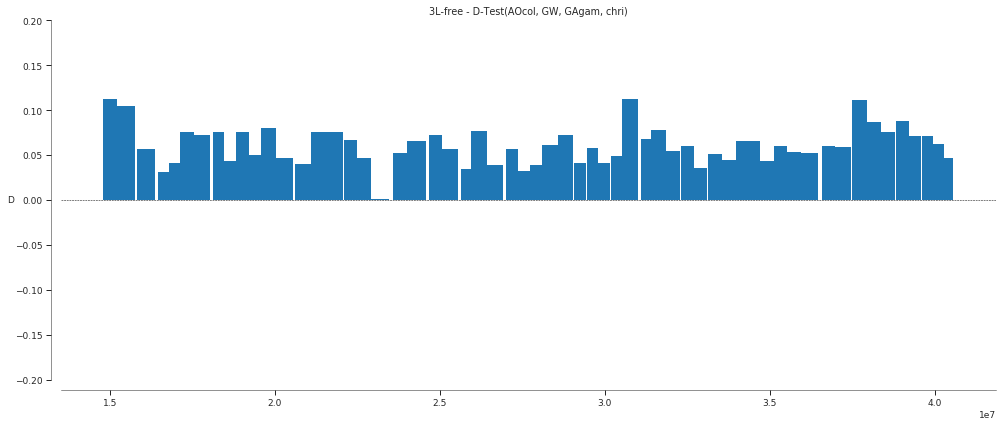

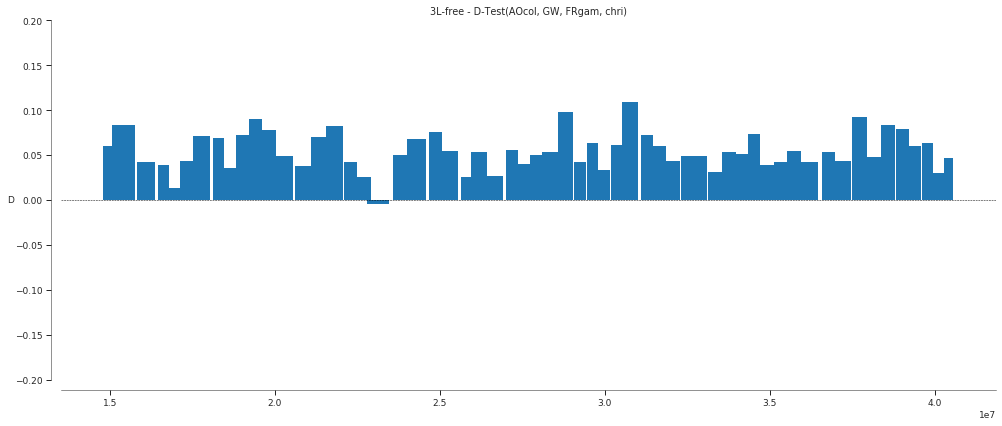

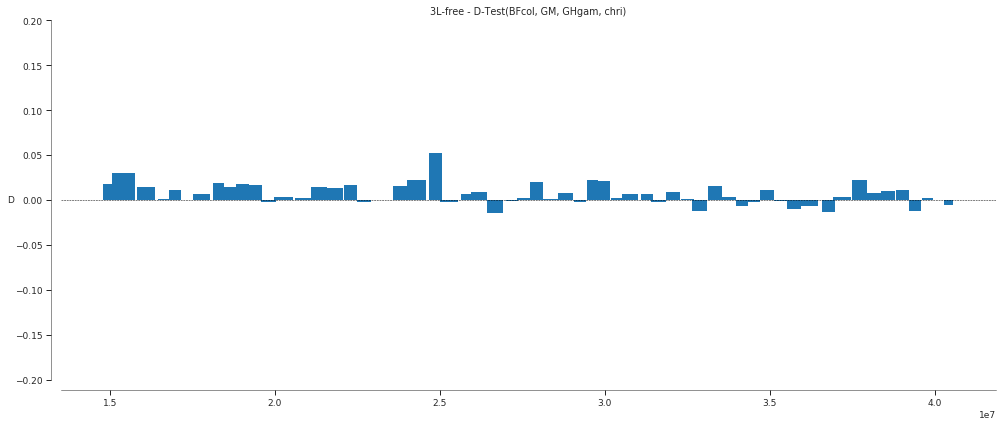

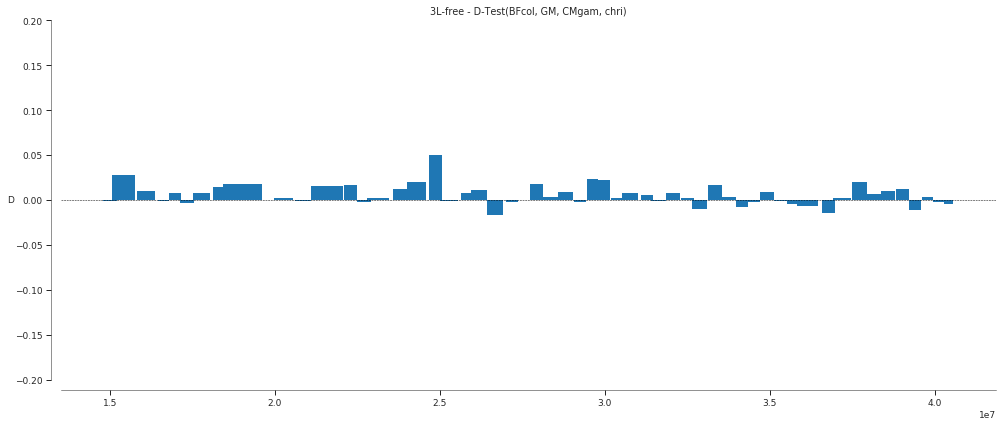

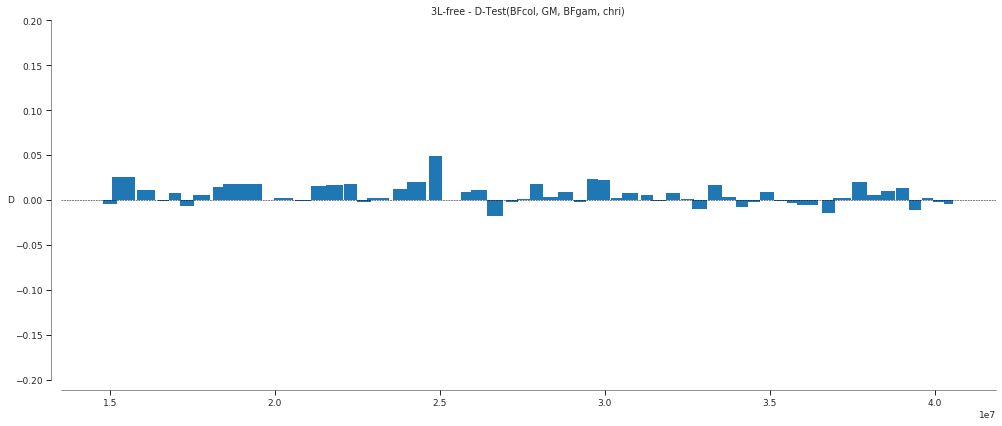

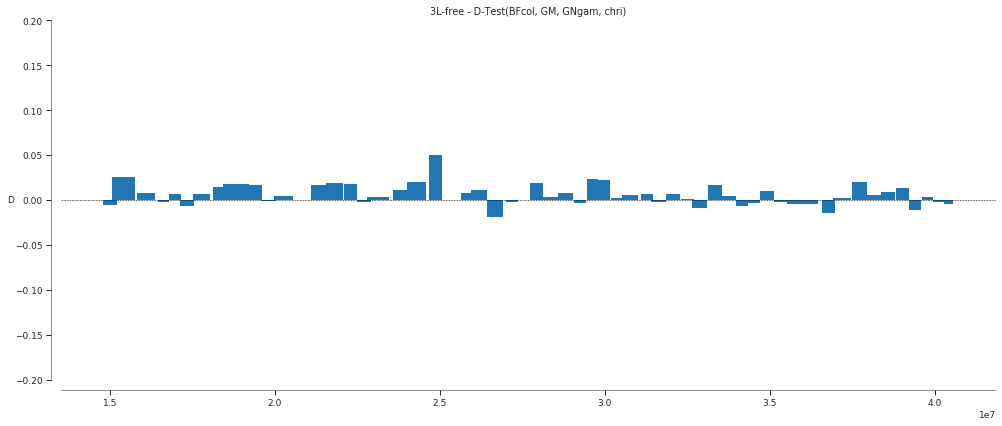

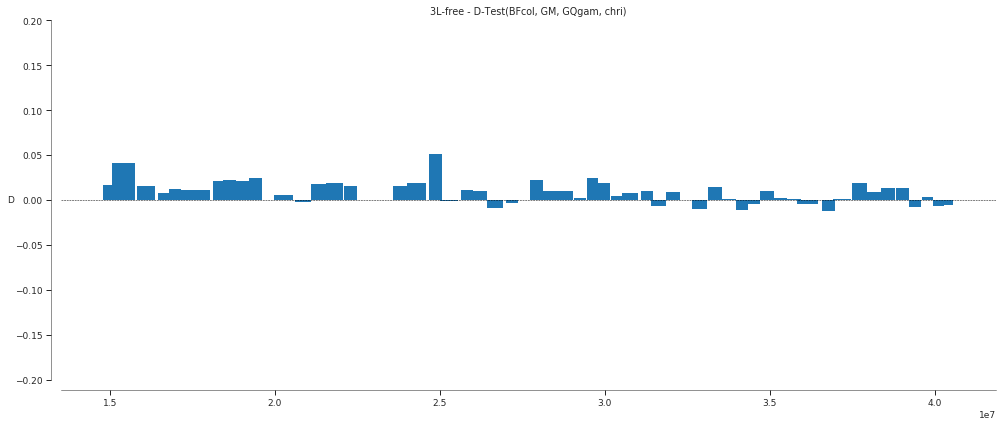

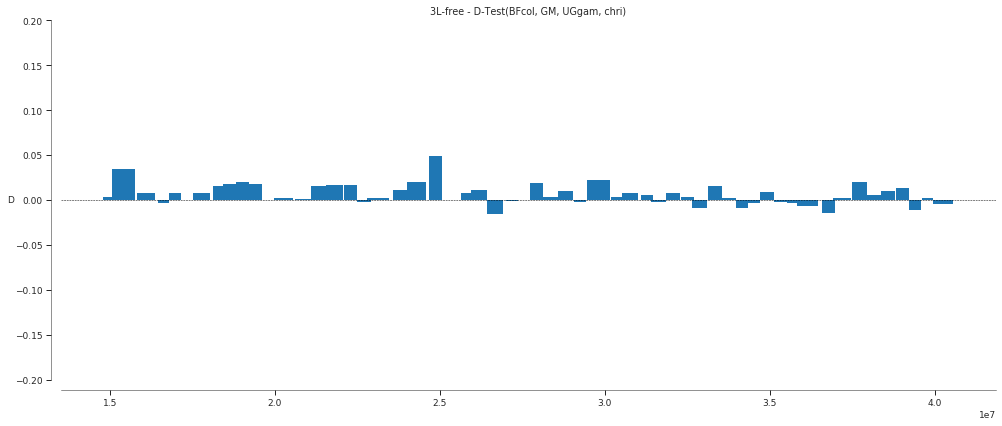

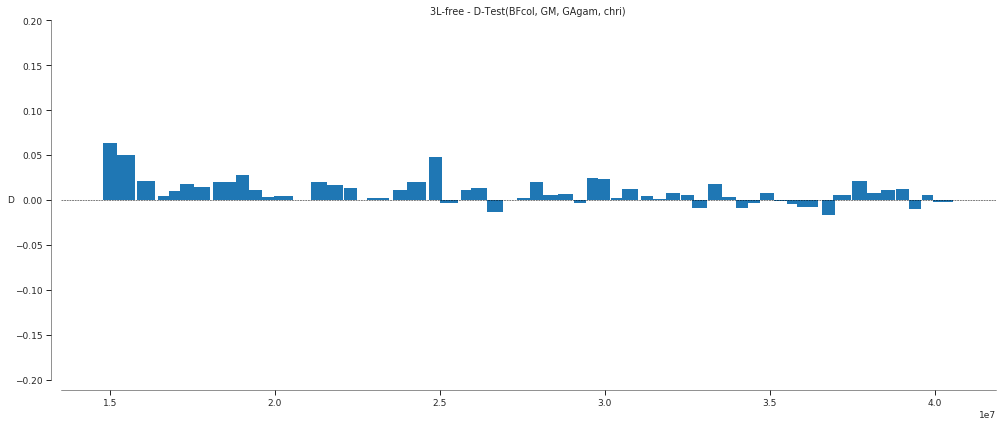

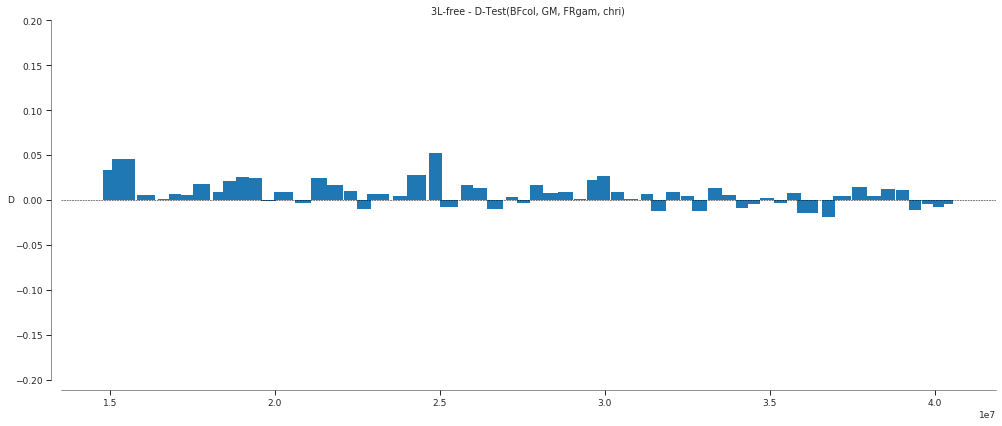

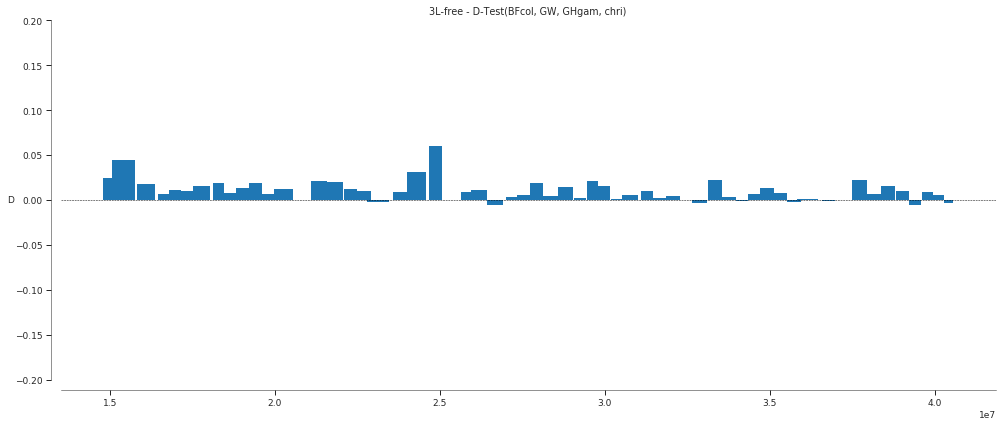

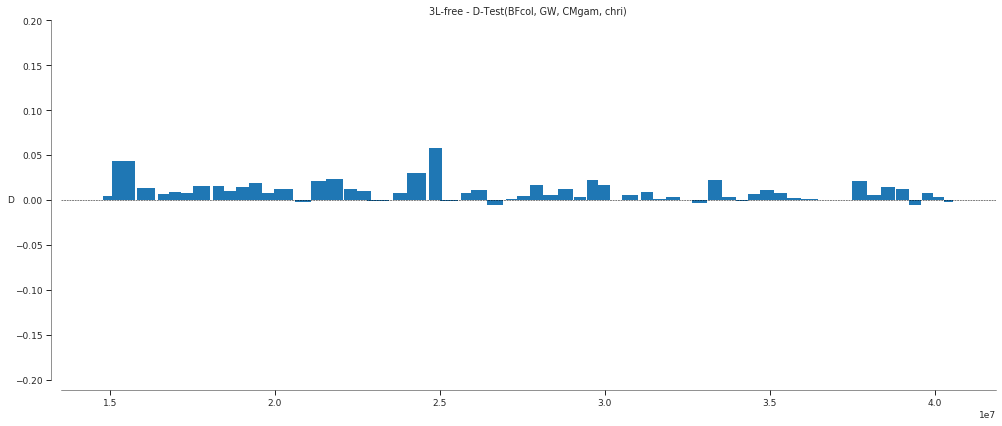

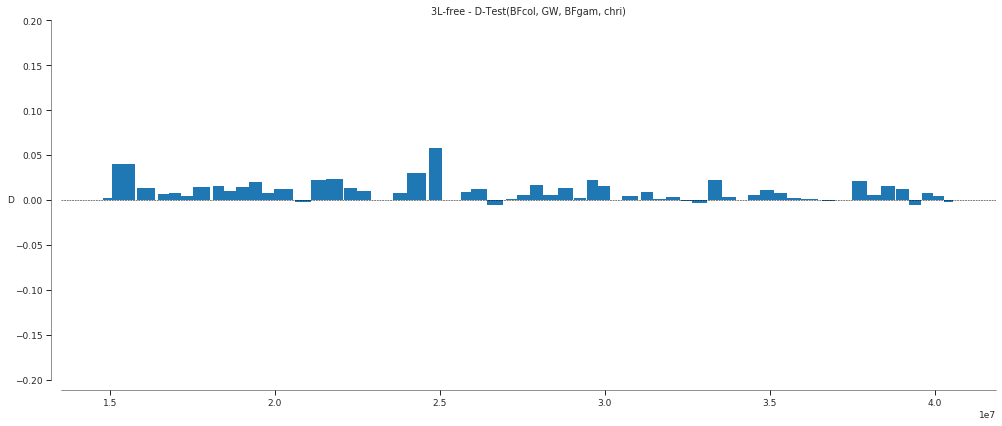

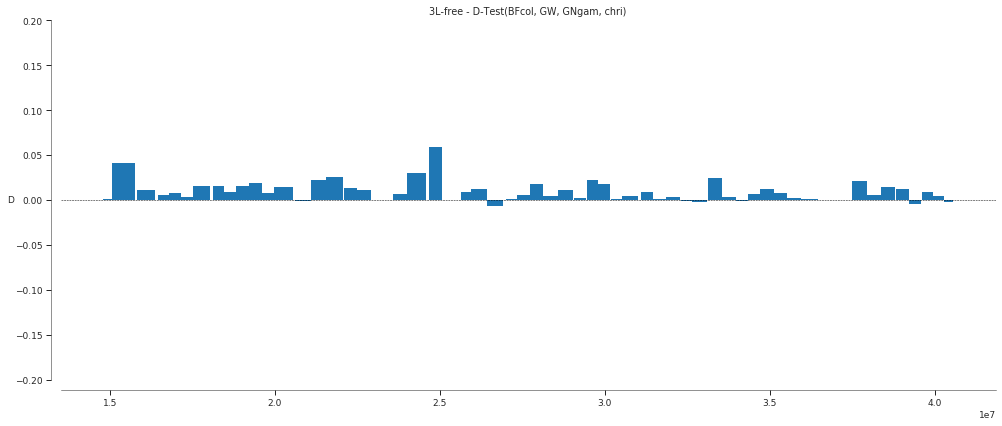

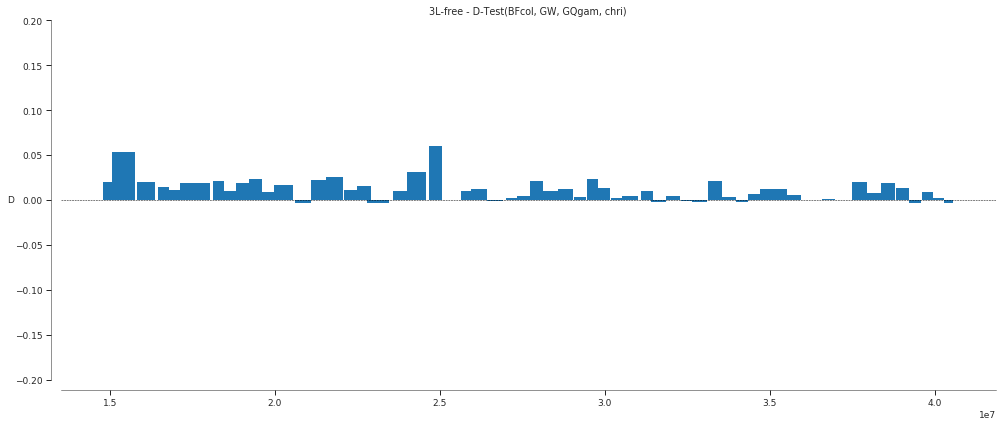

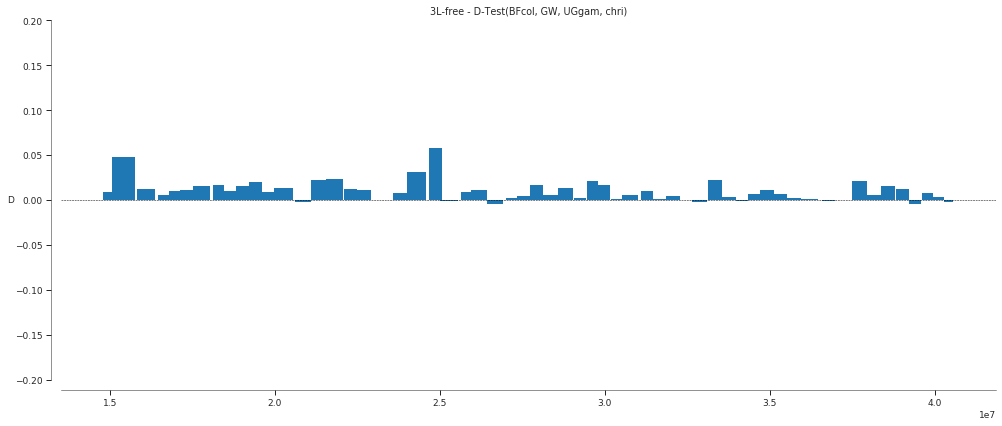

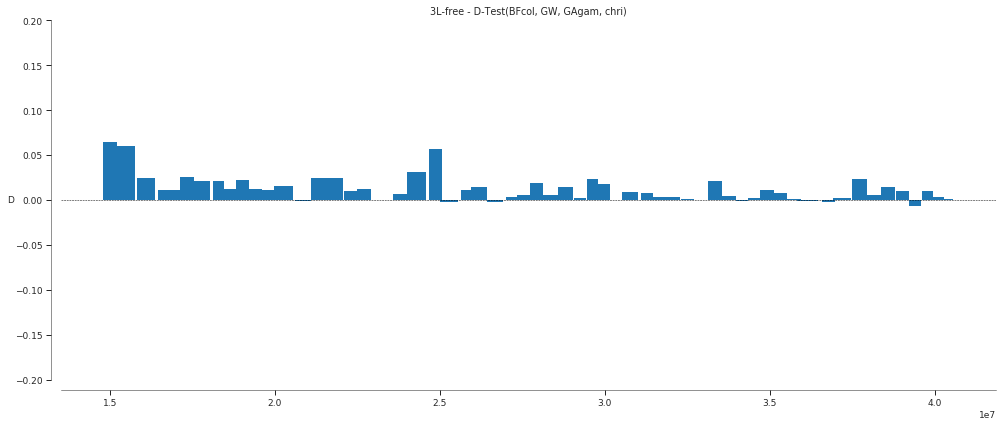

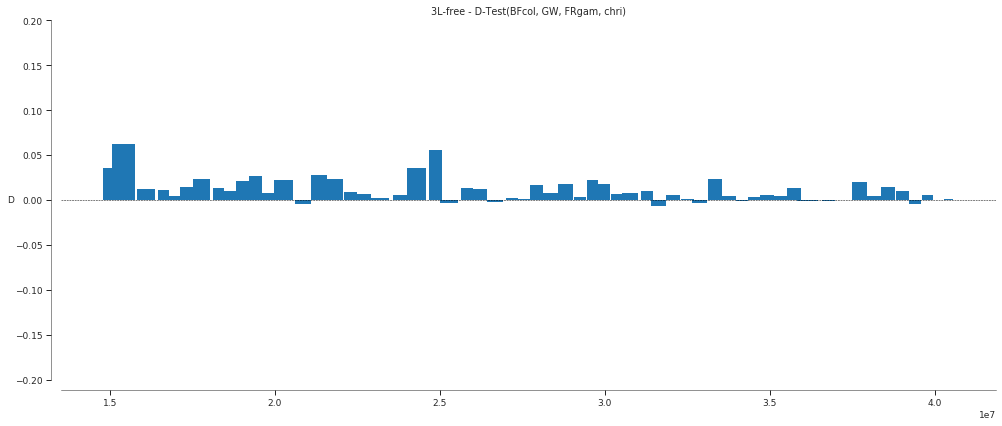

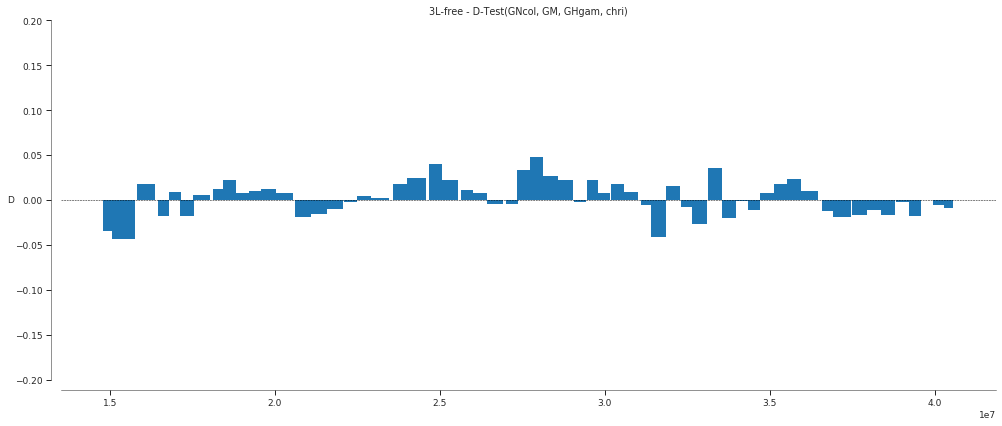

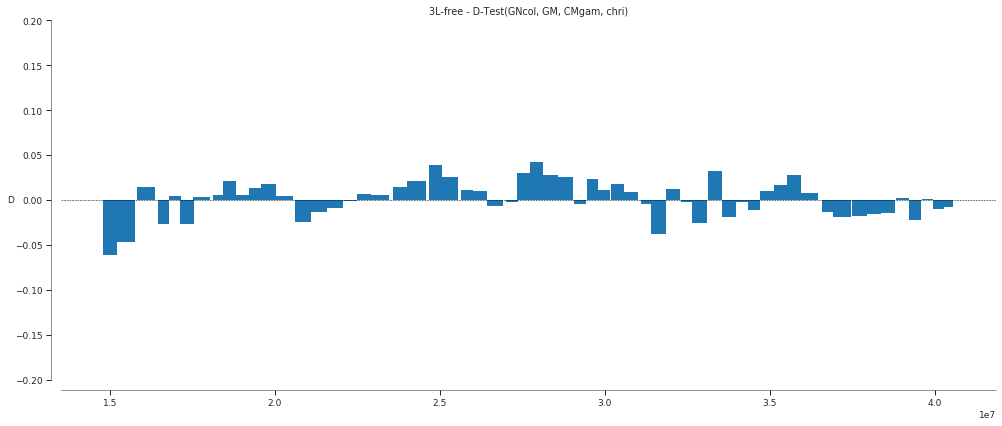

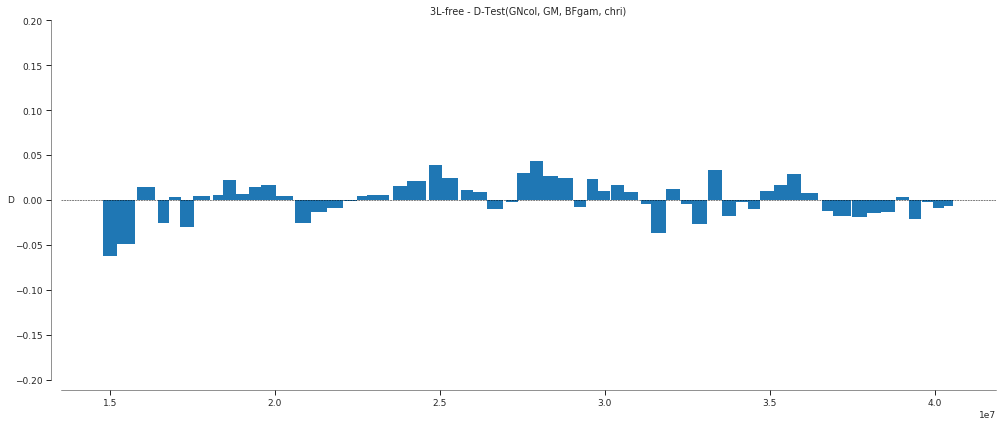

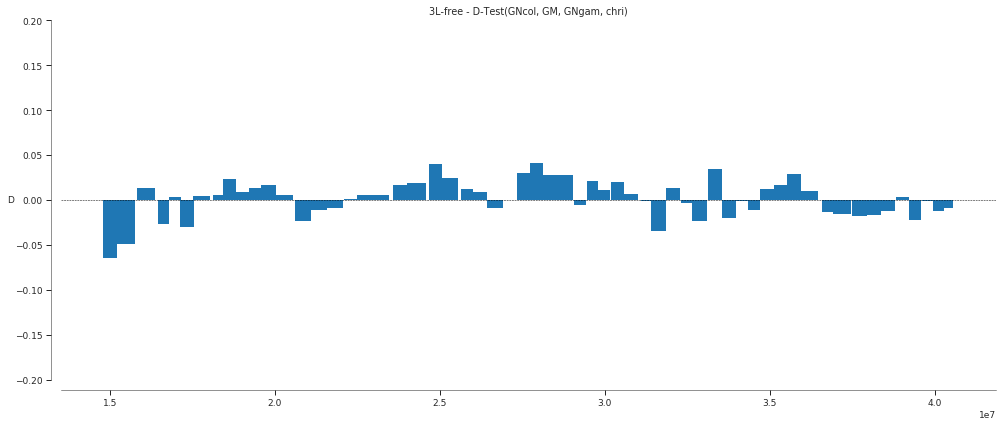

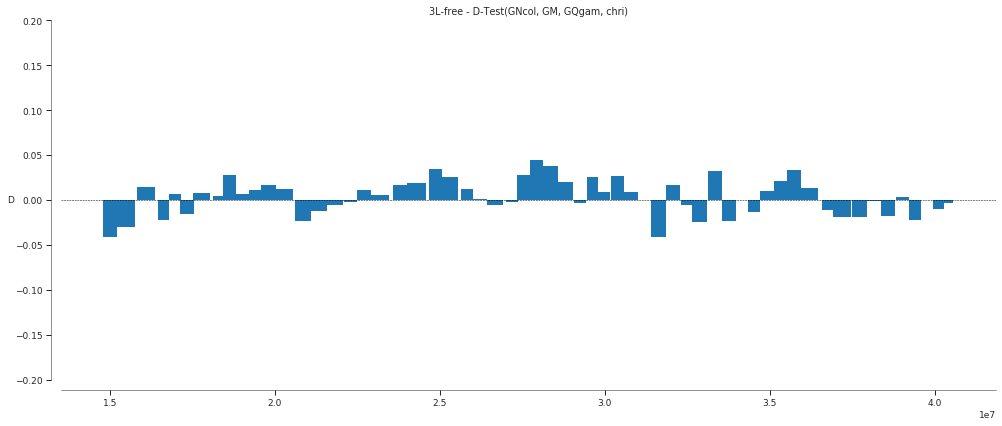

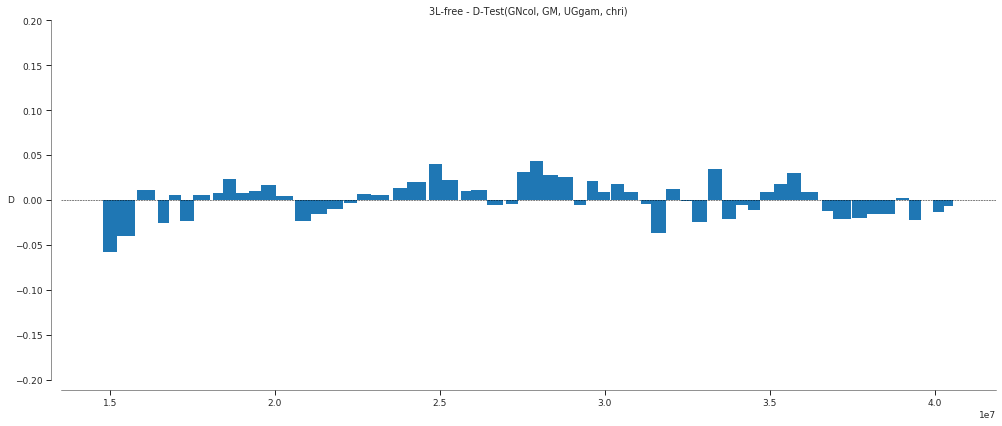

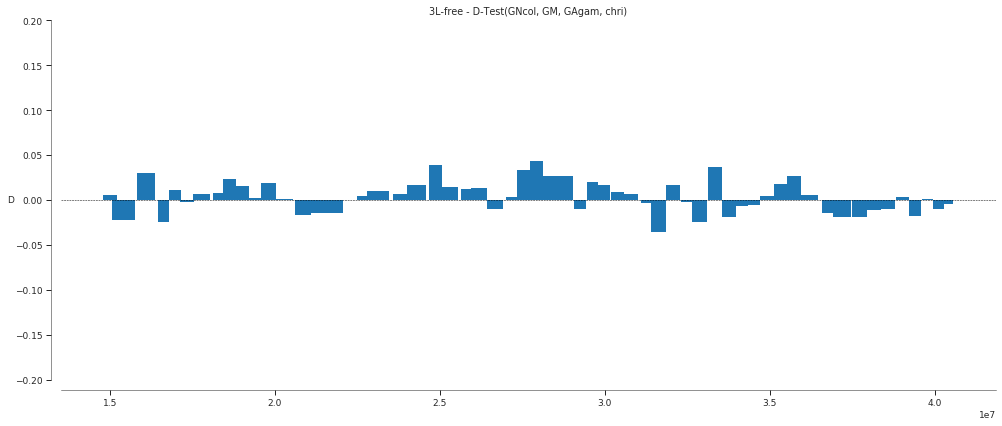

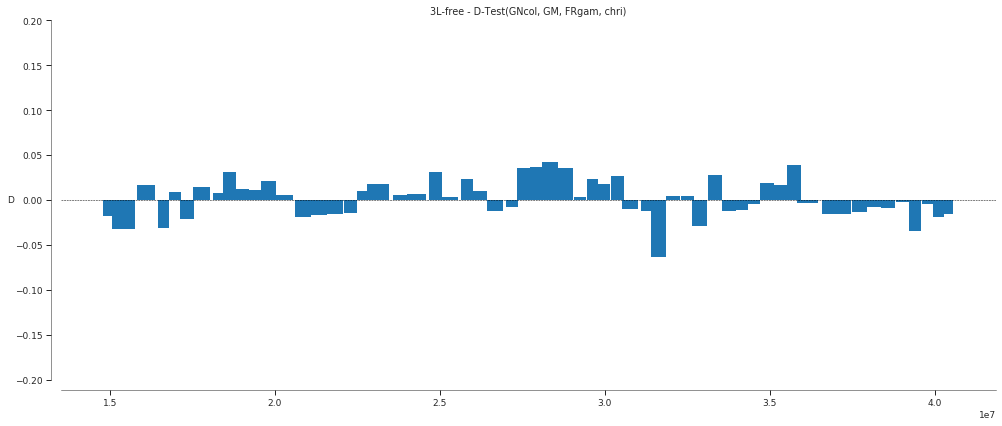

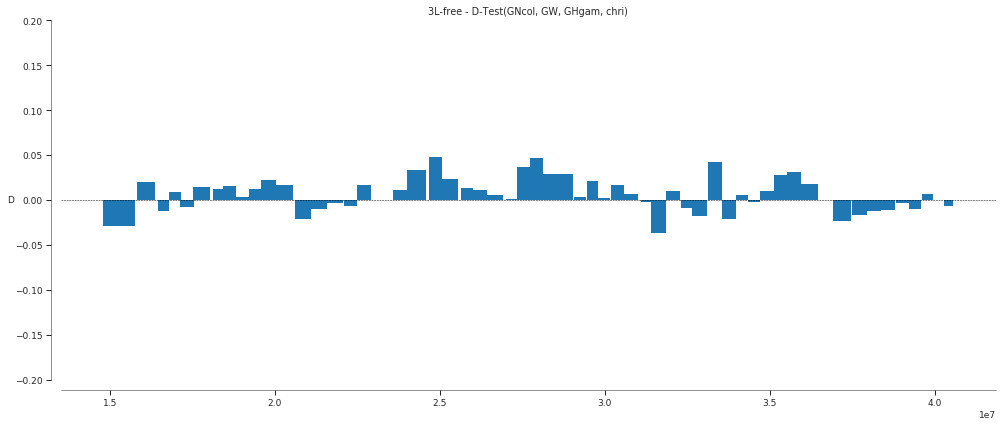

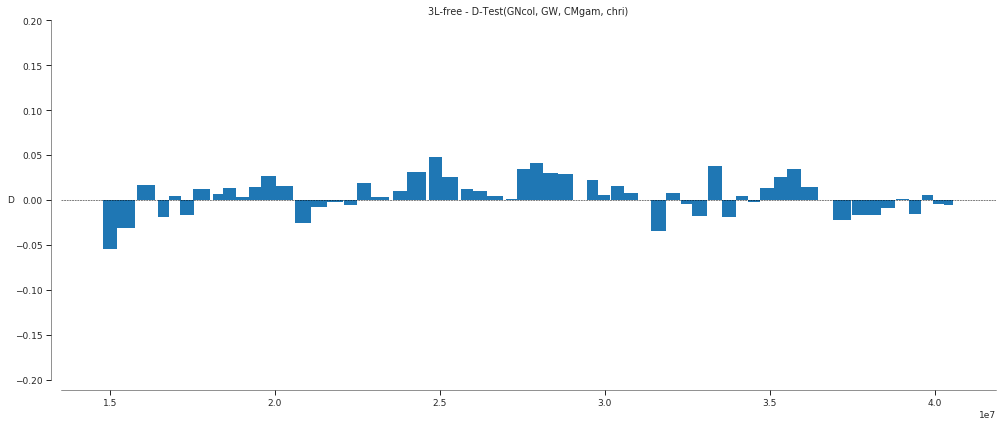

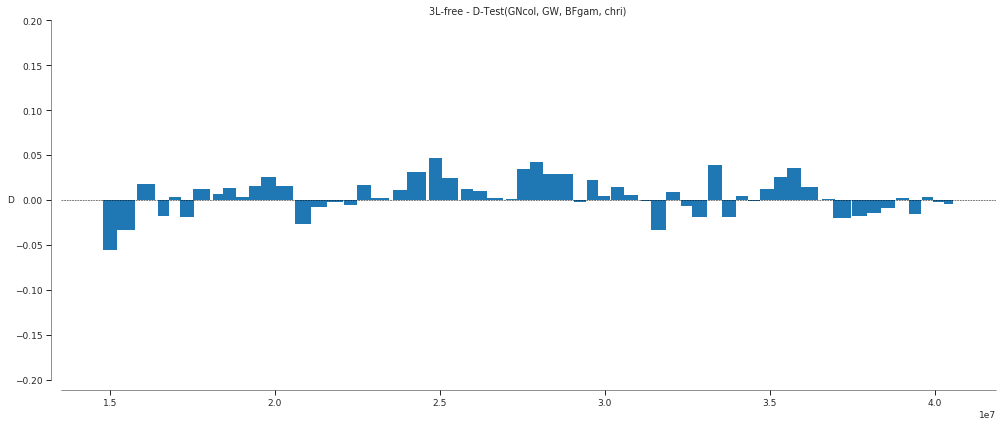

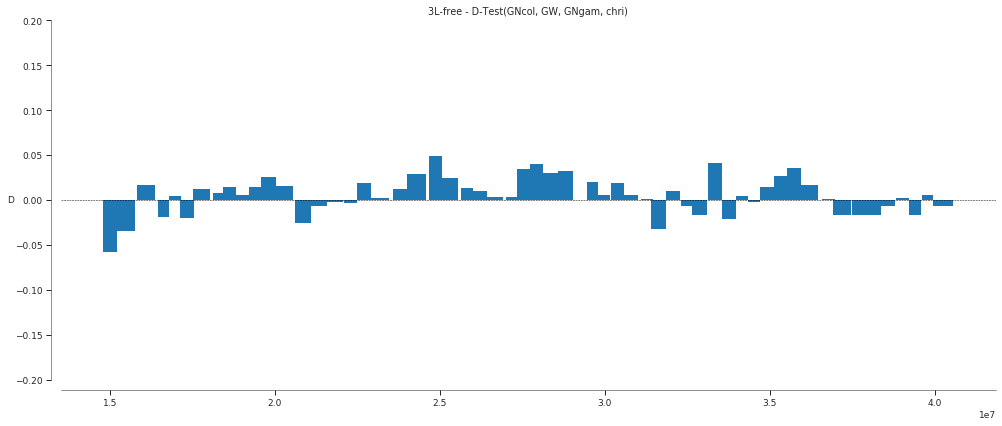

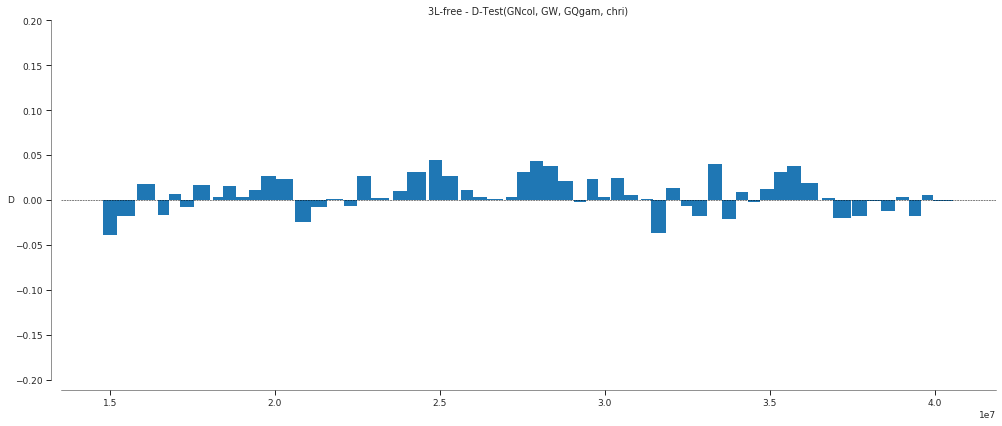

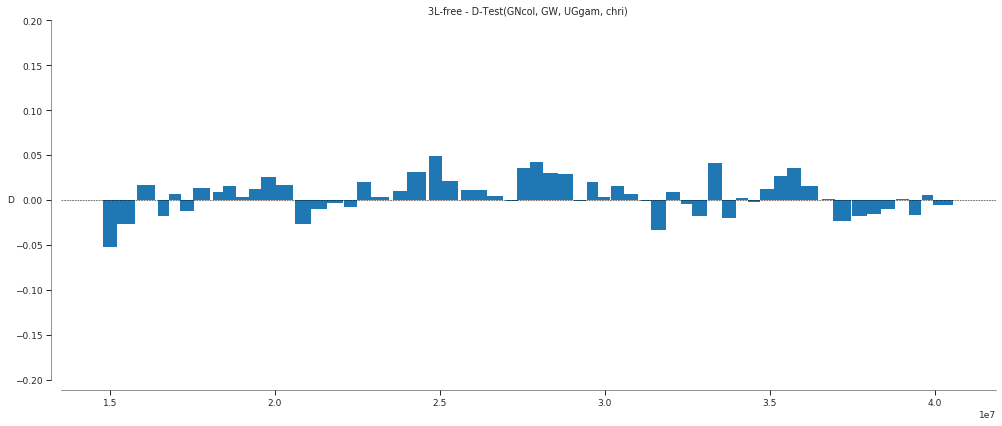

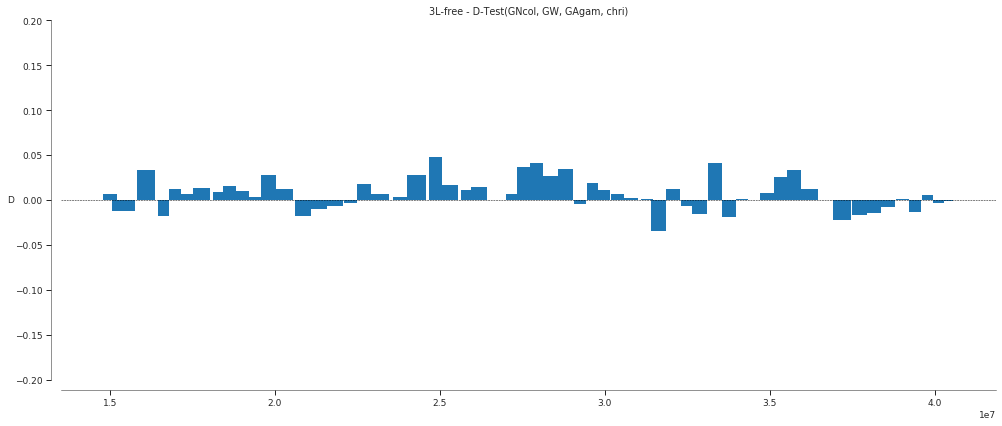

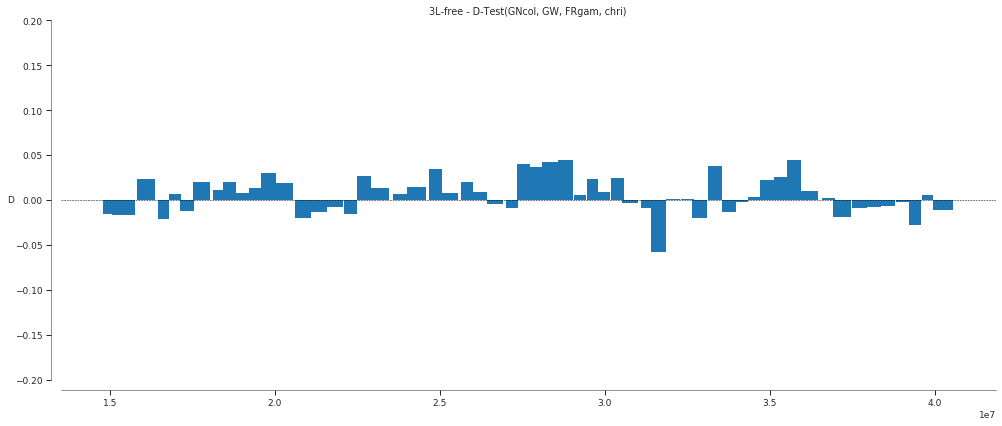

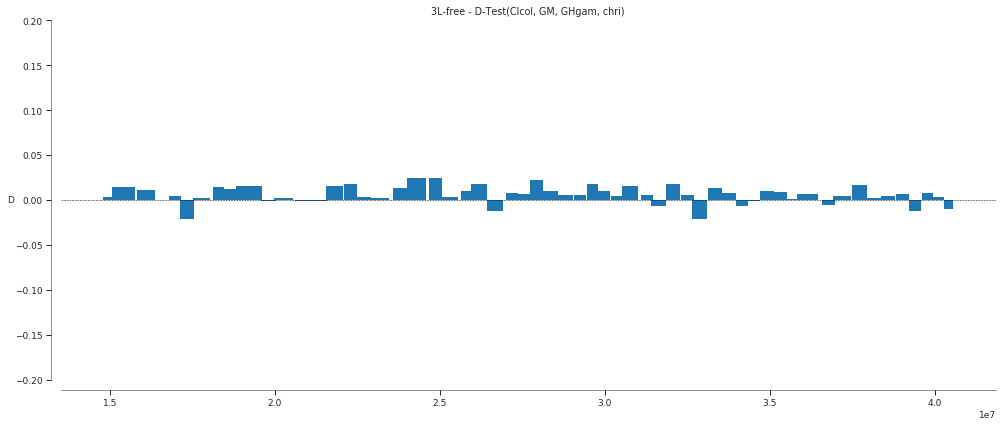

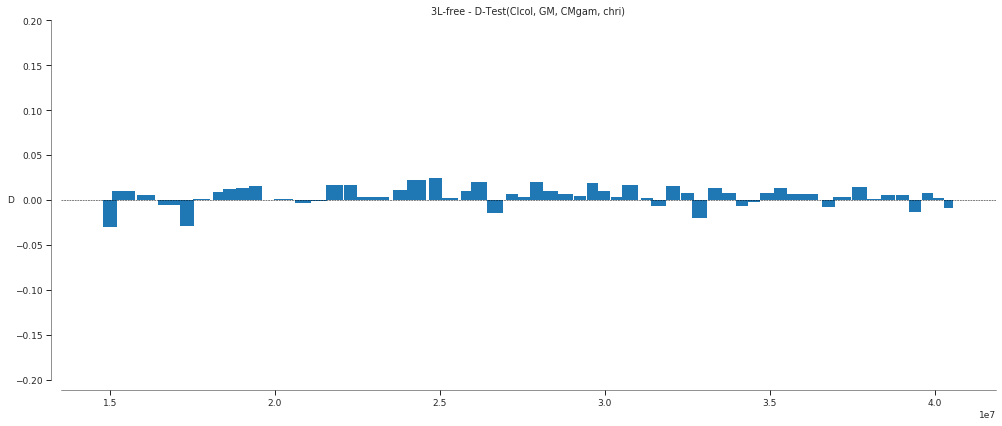

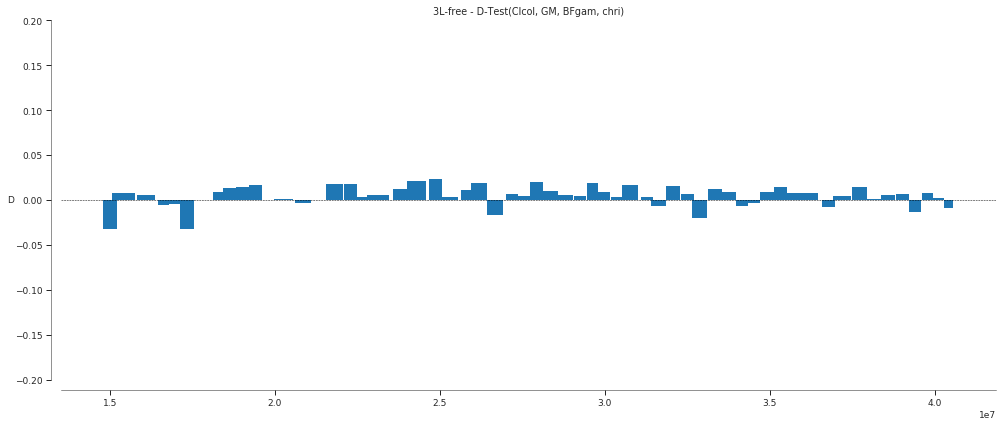

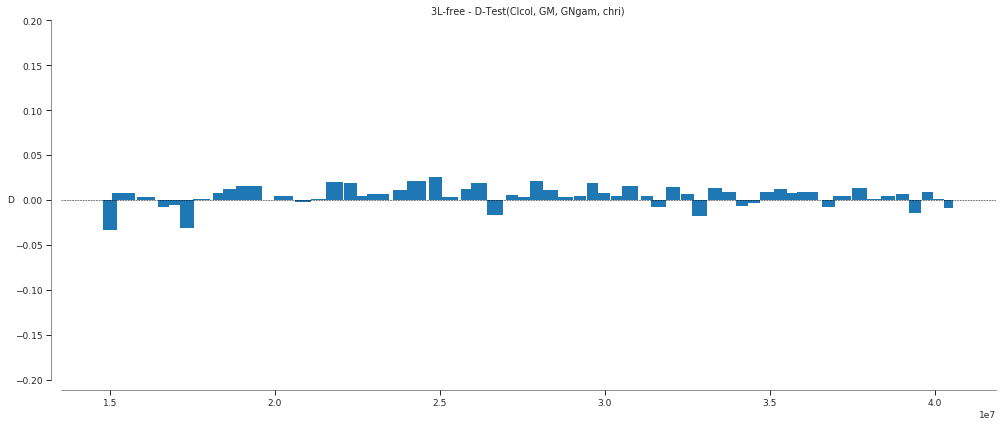

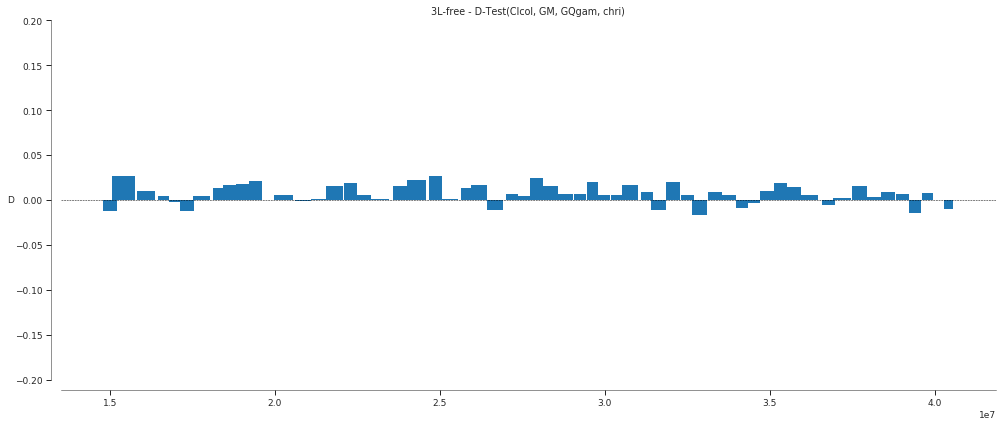

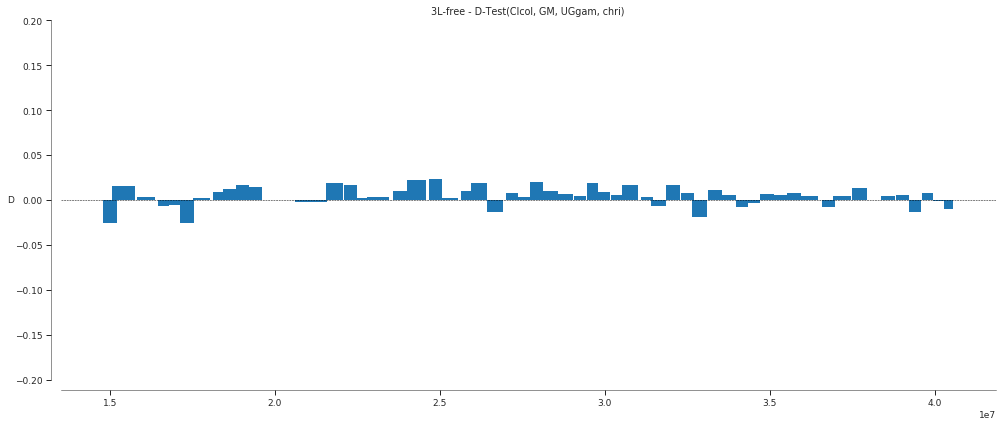

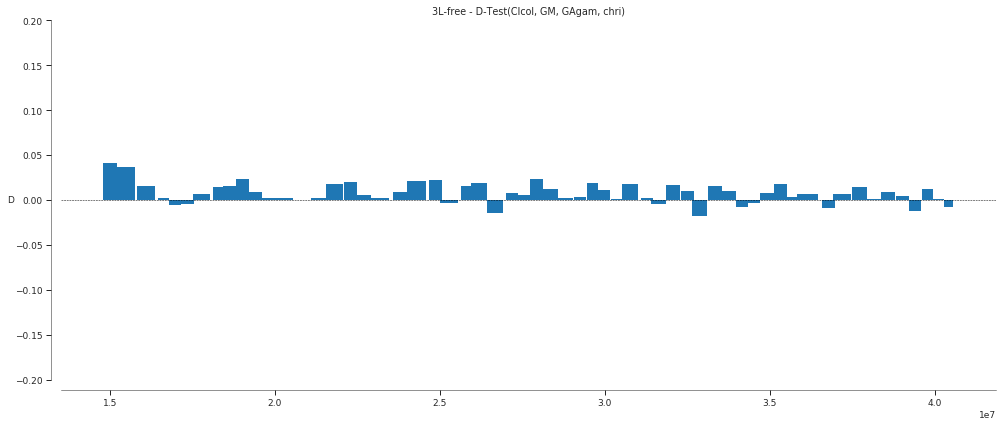

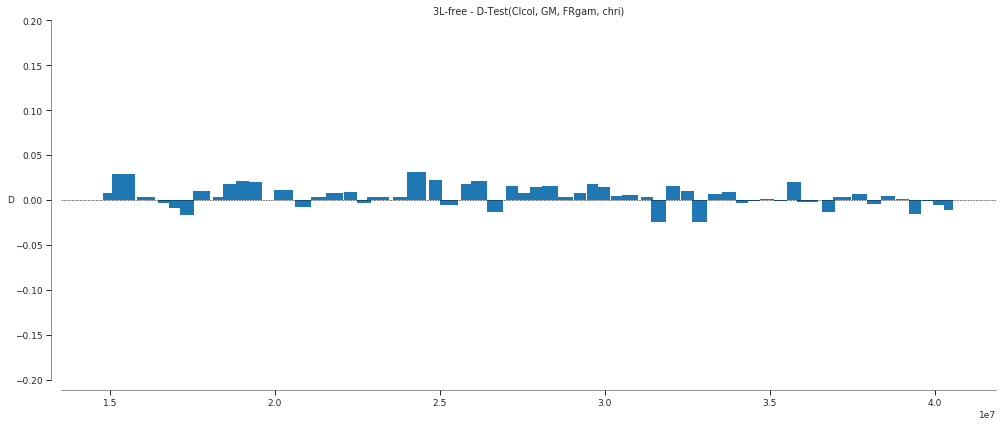

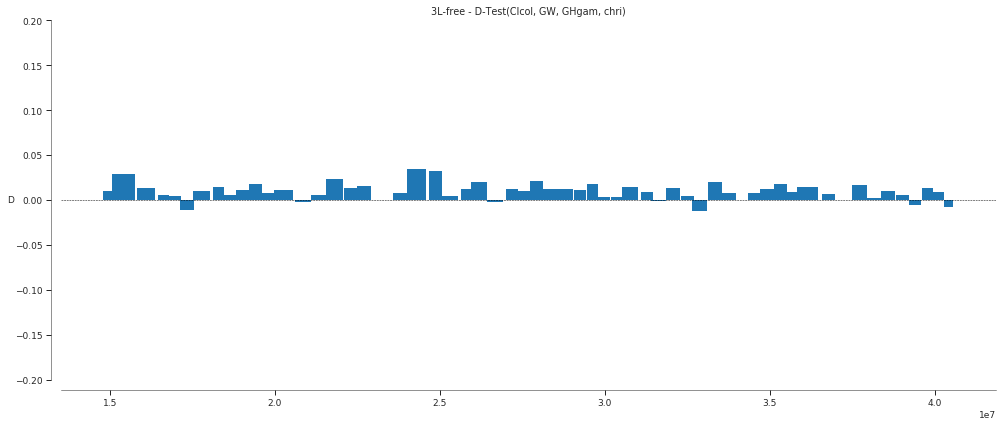

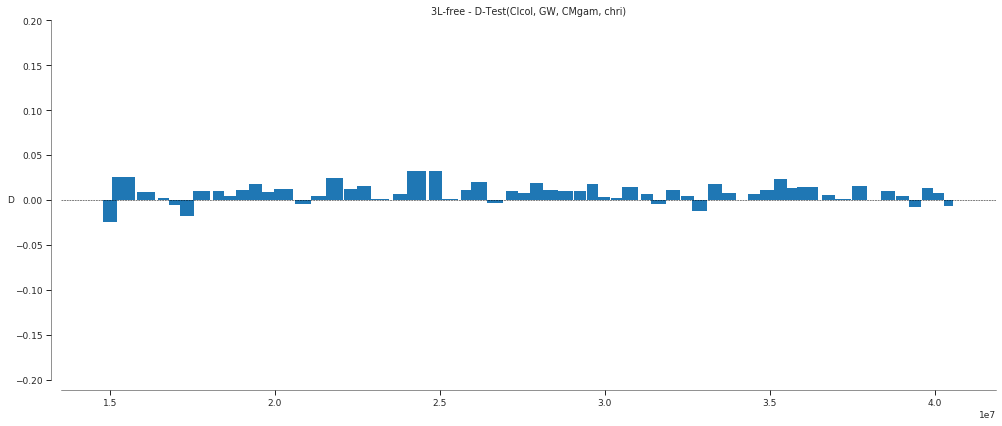

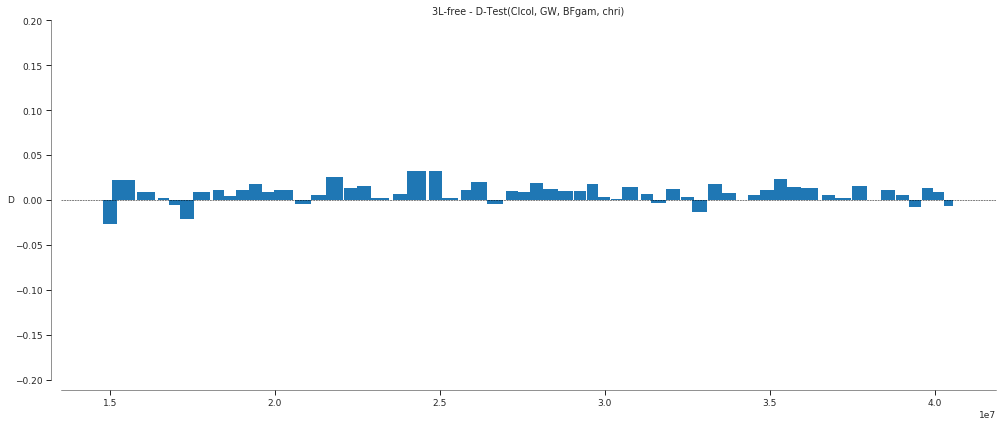

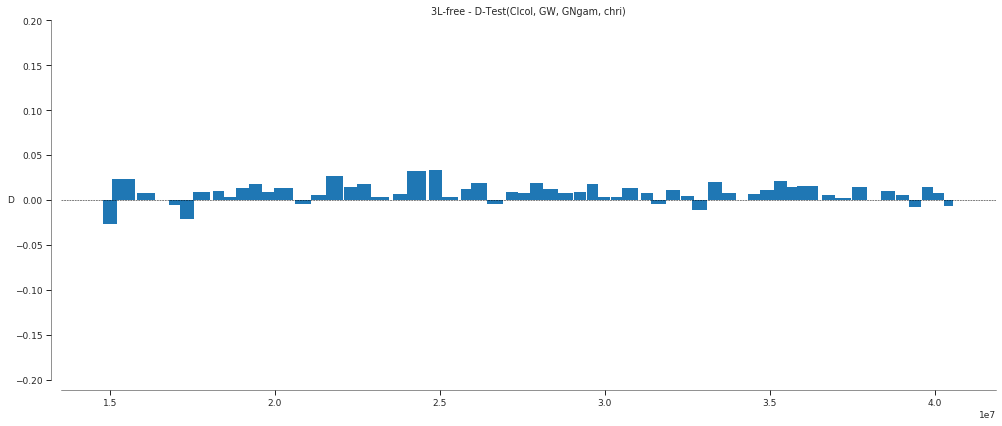

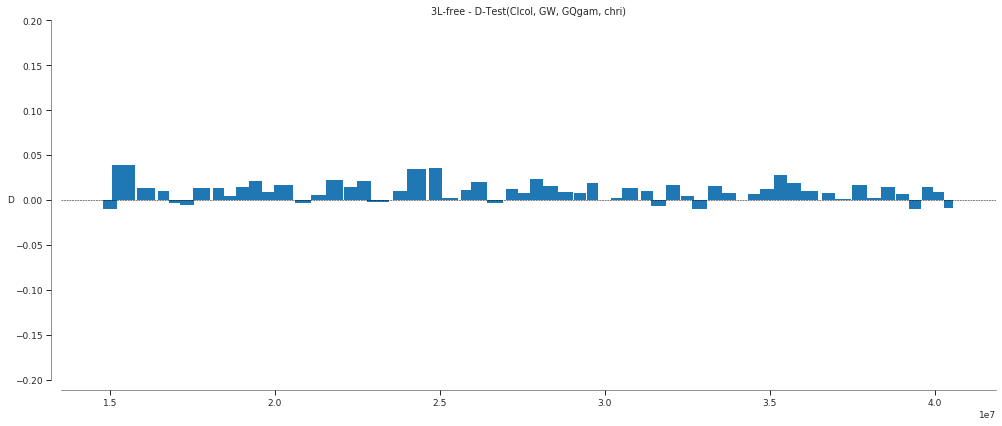

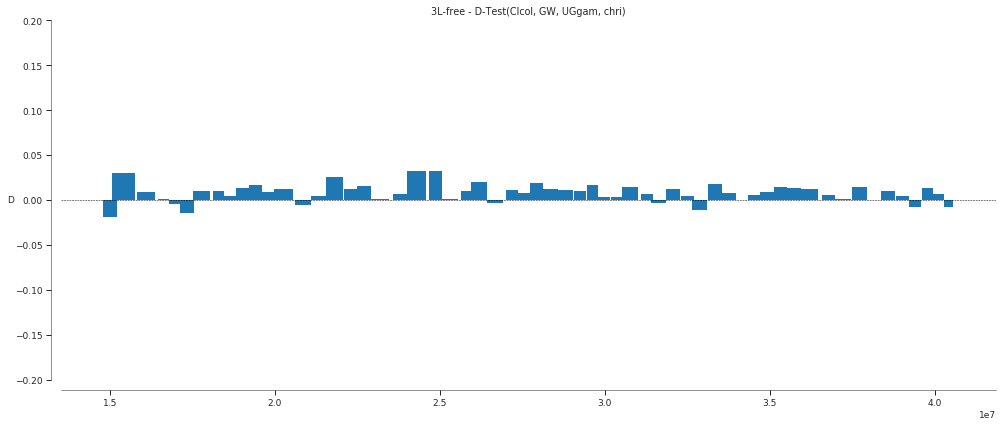

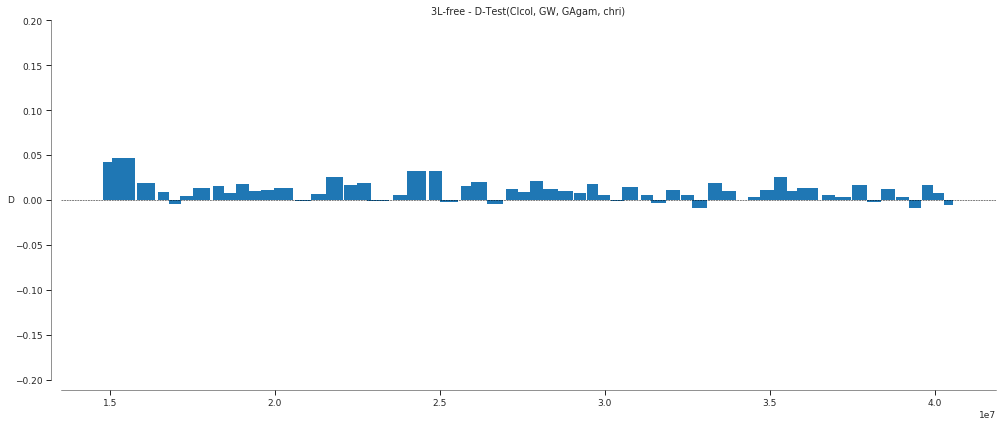

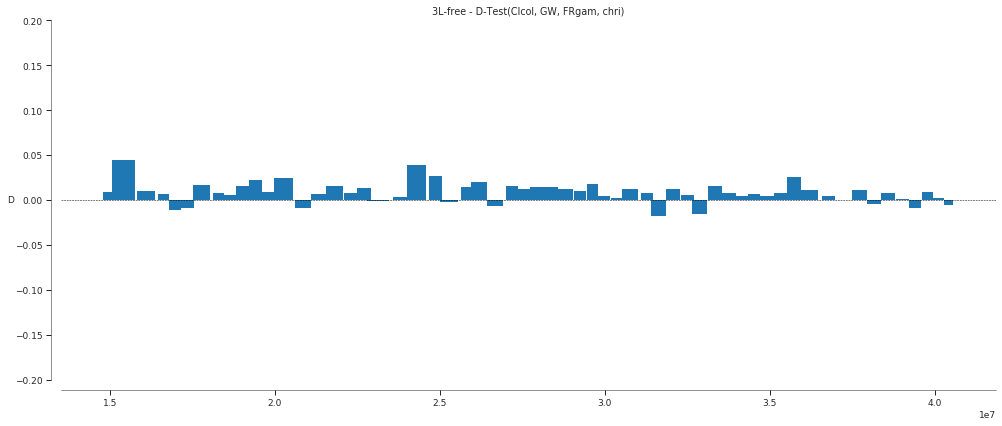

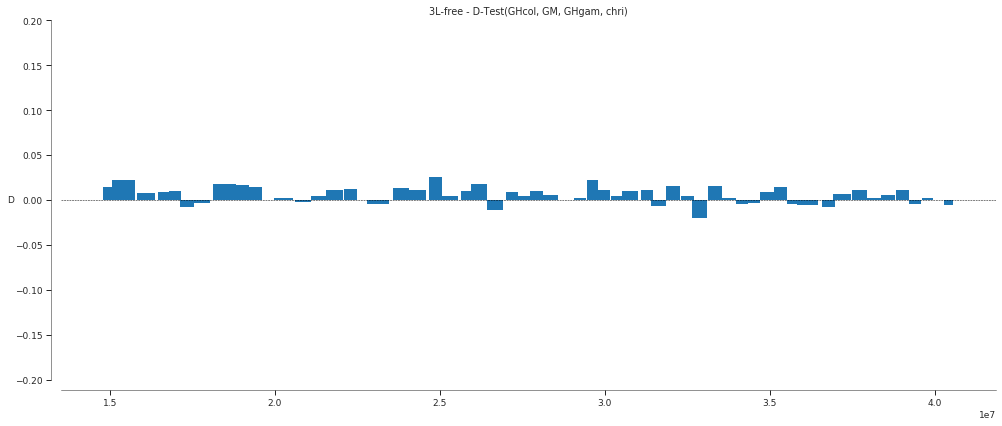

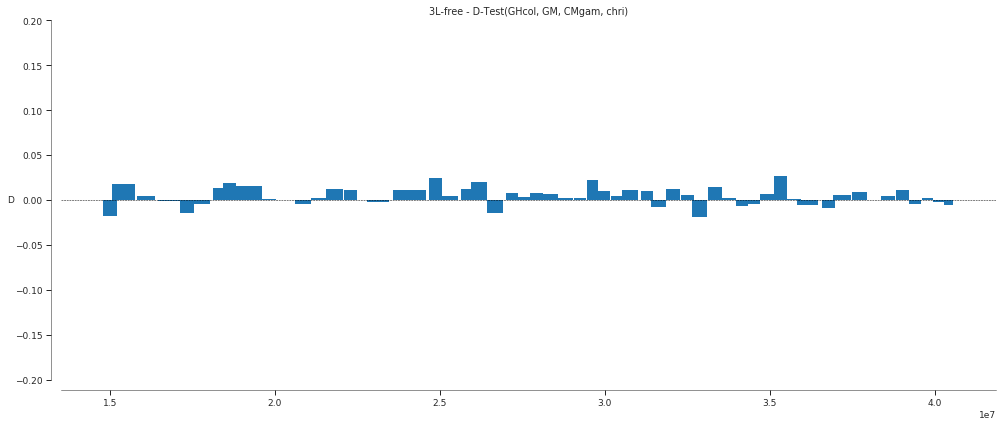

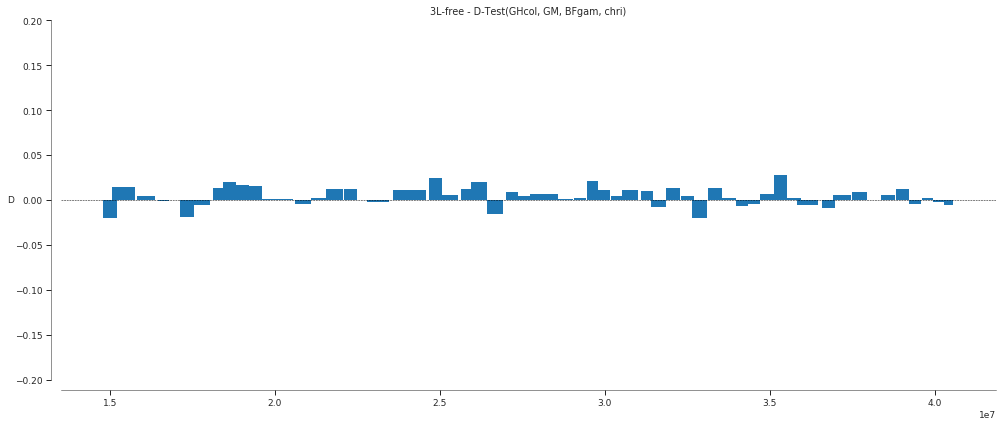

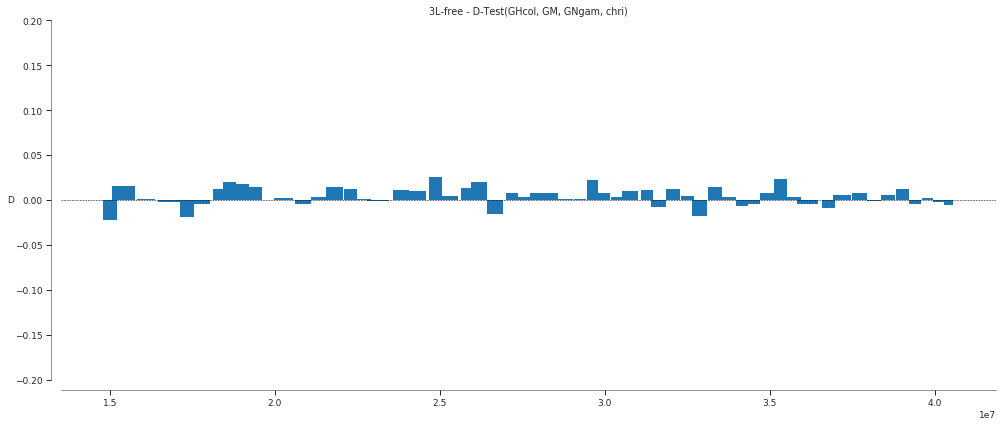

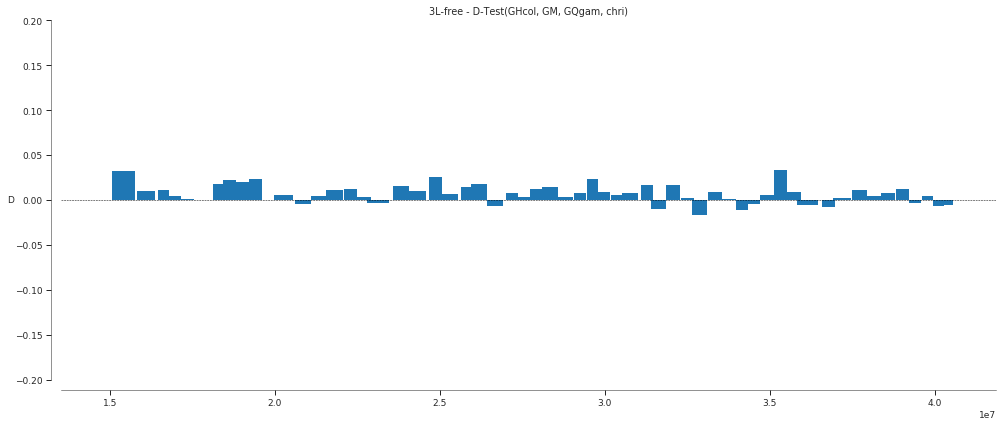

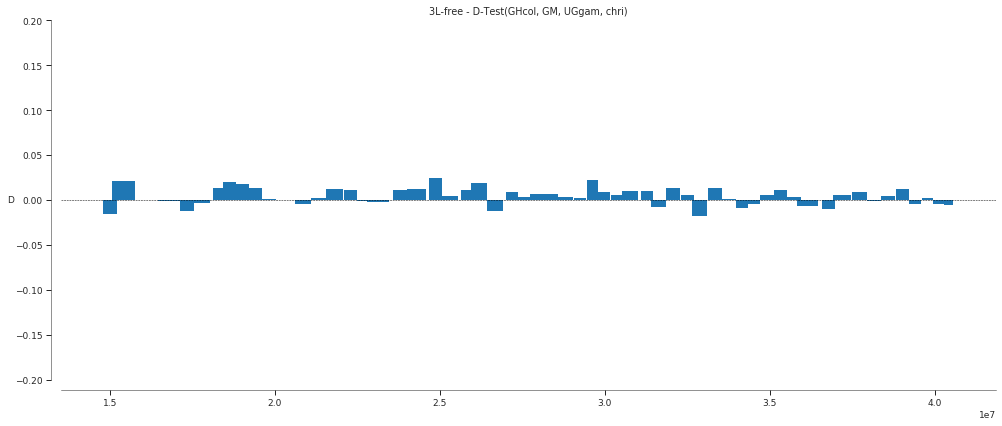

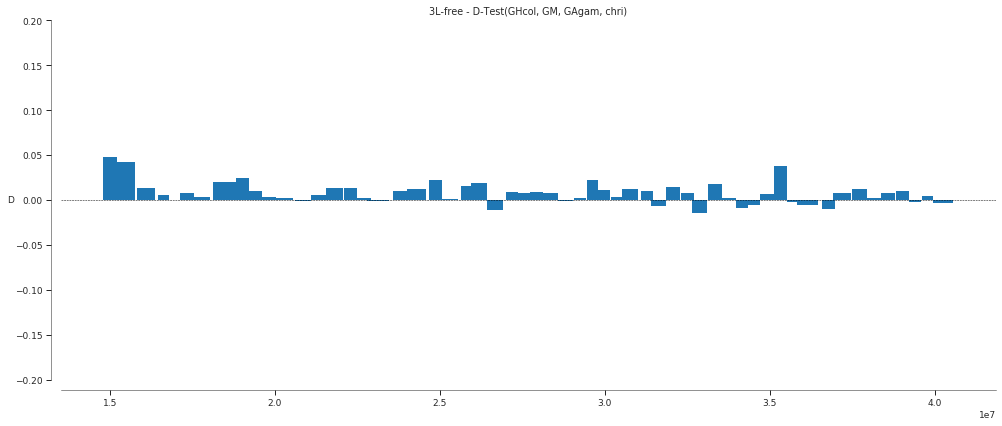

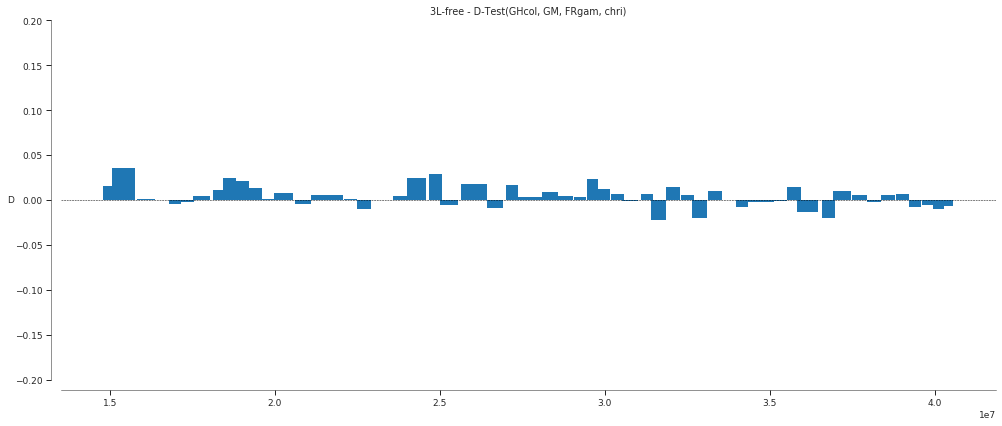

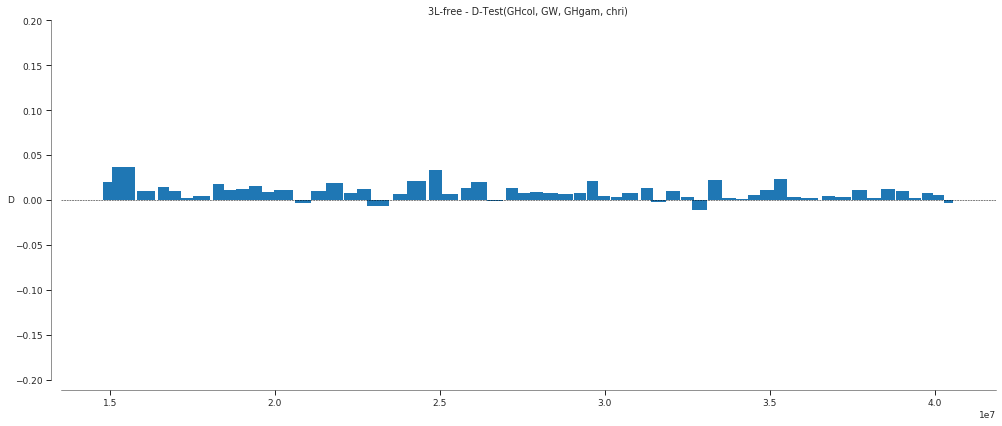

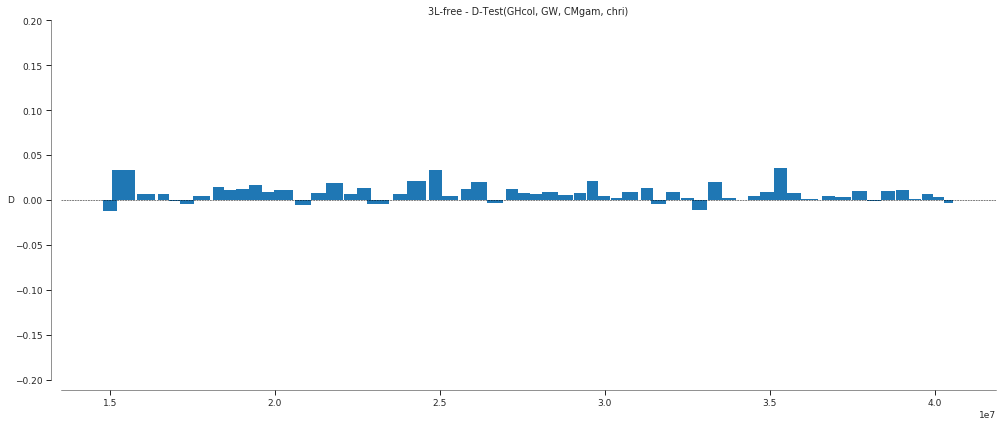

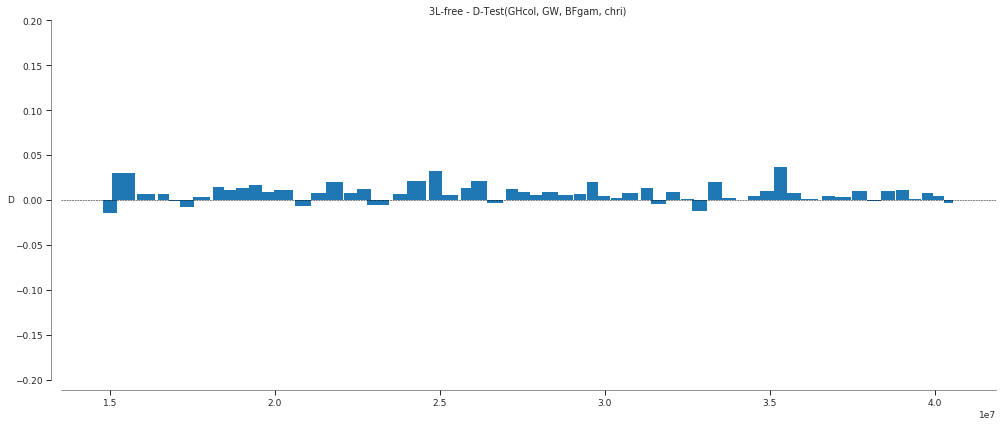

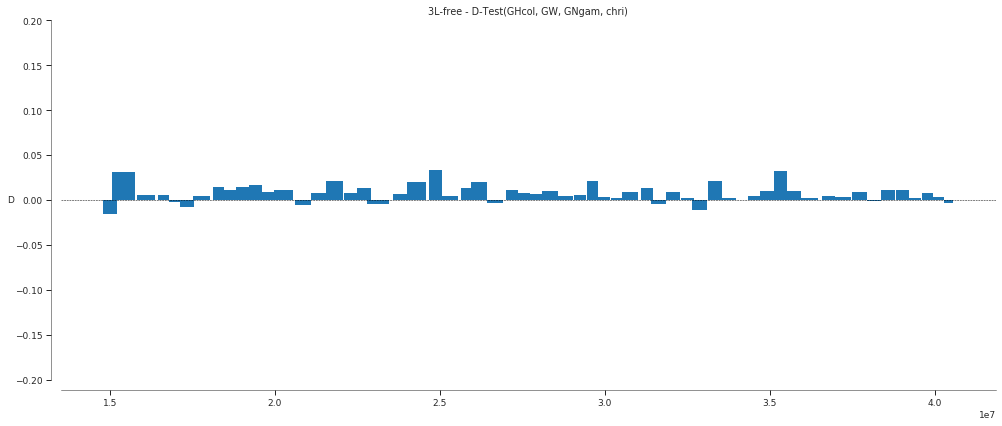

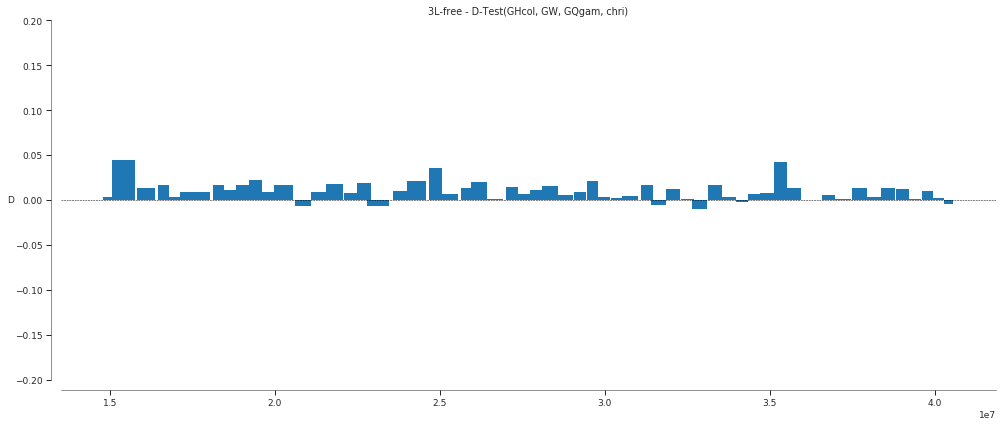

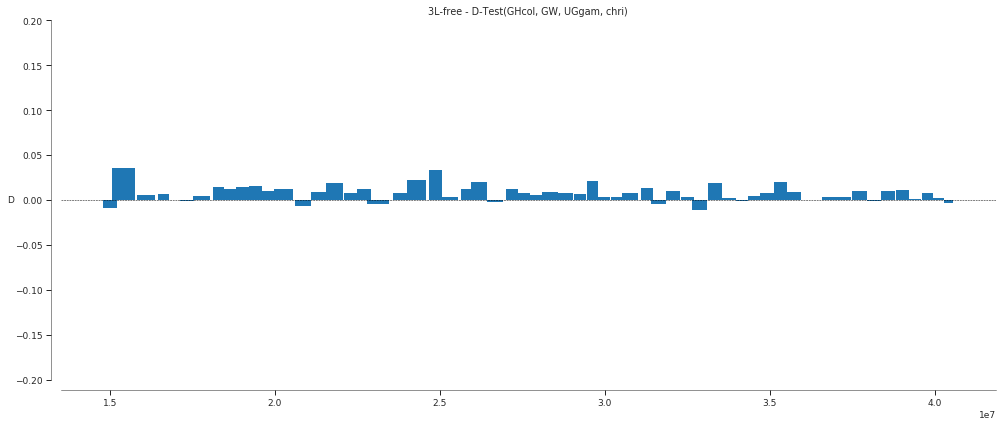

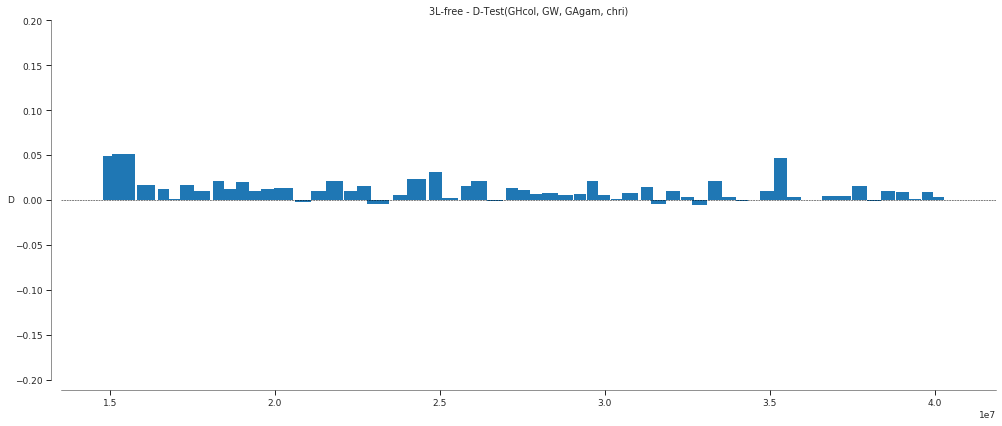

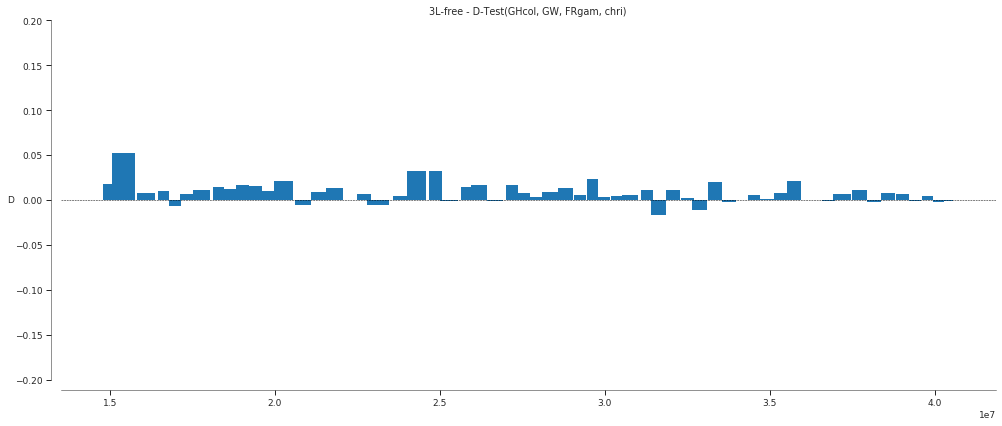

In [46]:
# load variant positions
block_starts = allel.moving_statistic(loc, statistic=np.min, size=100000)
block_stops = allel.moving_statistic(loc, statistic=np.max, size=100000)
block_widths = block_stops - block_starts
title = results_3L['Test']
### qui bisogna fare un ciclo:
for i in range(len(bloks_3L)):	
		ylim=(-.2, .2)
		fig, ax =  plt.subplots(figsize=(14, 6))
		ax.bar(block_starts, bloks_3L[i], width=block_widths, linewidth=0)
		ax.axhline(0, color='k', linestyle='--')
		ax.set_ylabel('D', rotation=0, ha='center', va='center')
		ax.set_ylim(*ylim)
		ax.set_title('%s' %(title[i]))
		sns.despine(ax=ax, offset=10)
		fig.tight_layout()      
i+=1

--------------------
## Testing 3R-free region

In [50]:
def count_alleles_pos(chrom, start, stop):
    
    metadata = pd.read_csv("samples.meta.txt", sep="\t")
    pos_all = allel.SortedIndex(callset_biallel[chrom]["variants/POS"])
    loc = pos_all.intersect_range(start, stop)
    loc1, loc2 = pos_all.locate_intersection(loc)
    geno = allel.GenotypeChunkedArray(callset_biallel[chrom]["calldata/GT"])
    geno_subset = geno.subset(sel0=loc1)
    ac = geno_subset.count_alleles()[:]
    grp = metadata.groupby("population")
    grp_indices = grp.indices
    ac_subpops = geno_subset.count_alleles_subpops(grp_indices)

    return ac_subpops

In [51]:
pos_all = allel.SortedIndex(callset_biallel['3R']["variants/POS"])
loc = pos_all.intersect_range(1000000, 37000000)
loc1, loc2 = pos_all.locate_intersection(loc)

In [52]:
ac_3R_free = count_alleles_pos('3R', 1000000, 37000000)
ac_3R_free

<AlleleCountsChunkedTable shape=(8281766,) dtype=[('AOcol', '<i4', (2,)), ('BFcol', '<i4', (2,)), ('BFgam', '<i4', (2,)), ('CIcol', '<i4', (2,)), ('CMgam', '<i4', (2,)), ('FRgam', '<i4', (2,)), ('GAgam', '<i4', (2,)), ('GHcol', '<i4', (2,)), ('GHgam', '<i4', (2,)), ('GM', '<i4', (2,)), ('GNcol', '<i4', (2,)), ('GNgam', '<i4', (2,)), ('GQgam', '<i4', (2,)), ('GW', '<i4', (2,)), ('KE', '<i4', (2,)), ('UGgam', '<i4', (2,))]
   nbytes=1011.0M cbytes=90.8M cratio=11.1
   values=allel.chunked.storage_zarr.ZarrTable>

In [53]:
ac_chri_3R_free = allel.AlleleCountsChunkedArray(calldata_out['3R']['chri']).compress(loc1)
ac_chri_3R_free

<AlleleCountsChunkedArray shape=(8281766, 2) dtype=int32 chunks=(129403, 2)
   nbytes=63.2M cbytes=5.7M cratio=11.0
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [54]:
ac_cache = dict()

def load_ac(pop):
    if (pop) in ac_cache:
        return ac_cache[pop]
    else:
        if pop in out_species:
            ac = ac_chri_3R_free
        else:
            ac = ac_3R_free[pop]
            ac_cache[pop] = ac
        return ac
    
fourpop_cache = dict()

In [55]:
#this is the function that perform the test
def f4_analysis(A, B, C, D, blen=100000, plot=False, ax=None):
    
    key = (A, B, C, D, blen)
    if key in fourpop_cache:
        # re-use from cache
        d, d_se, d_z, d_vb, d_vj = fourpop_cache[key]
        
    else:
        # load allele counts
        aca = load_ac(A)
        acb = load_ac(B)
        acc = load_ac(C)
        acd = load_ac(D)

        # run D test
        d, d_se, d_z, d_vb, d_vj = allel.blockwise_patterson_d(aca, acb, acc, acd, blen=blen)
        
        # cache for re-use
        fourpop_cache[key] = d, d_se, d_z, d_vb, d_vj
    
    return d, d_se, d_z, d_vb, d_vj

#this is the function that give me to display multiple tests on a table
def f4_analyses(As, Bs, Cs, Ds, blen=100000):
    
    # normalise inputs
    if not isinstance(As, (list, tuple)):
        As = [As]
    if not isinstance(Bs, (list, tuple)):
        Bs = [Bs]
    if not isinstance(Cs, (list, tuple)):
        Cs = [Cs]
    if not isinstance(Ds, (list, tuple)):
        Ds = [Ds]
        
    # setup output table
    tbl = [['test', 'D', 'SE', 'Z']]
    for A in As:
        for B in Bs:
            if A != B:
                for C in Cs:
                    for D in Ds:
                        if C != D:
                            d, d_se, d_z, _, _ = f4_analysis(A, B, C, D, blen=blen)
                            test = '3R-free - D(%s, %s; %s, %s)' % (A, B, C, D)
                            row = [test, d, d_se, d_z]
                            tbl += [row]
    
    # display results
    (etl
     .wrap(tbl)
     .interpolate('D', '%.3f')
     .interpolate('SE', '%.4f')
     .interpolate('Z', '%.1f')
     .displayall(index_header=False, tr_style=lambda row: 'background-color: %s' % ('#afa' if float(row.Z) > 5 else '#aaf' if float(row.Z) < -5 else 'white')))


In [56]:
A = an_col
B = an_na
C = an_gam
D = 'chri'

In [57]:
f4_analyses(A, B, C, D)

test,D,SE,Z
"3R-free - D(AOcol, GM; GHgam, chri)",0.037,0.0039,9.5
"3R-free - D(AOcol, GM; CMgam, chri)",0.038,0.0039,9.7
"3R-free - D(AOcol, GM; BFgam, chri)",0.038,0.0037,10.3
"3R-free - D(AOcol, GM; GNgam, chri)",0.038,0.0035,10.7
"3R-free - D(AOcol, GM; GQgam, chri)",0.047,0.0037,12.8
"3R-free - D(AOcol, GM; UGgam, chri)",0.041,0.0034,12.0
"3R-free - D(AOcol, GM; GAgam, chri)",0.058,0.0030,19.6
"3R-free - D(AOcol, GM; FRgam, chri)",0.047,0.0032,14.8
"3R-free - D(AOcol, GW; GHgam, chri)",0.041,0.0033,12.4
"3R-free - D(AOcol, GW; CMgam, chri)",0.042,0.0032,13.0


In [58]:
def plot_test(As,Bs,Cs,Ds, blen=100000):
    # normalise inputs
    if not isinstance(As, (list, tuple)):
        As = [As]
    if not isinstance(Bs, (list, tuple)):
        Bs = [Bs]
    if not isinstance(Cs, (list, tuple)):
        Cs = [Cs]
    if not isinstance(Ds, (list, tuple)):
        Ds = [Ds]
   
    tbl = []
    tbl2 = [["Block_1","Block_2","Block_3","Block_4","Block_5","Block_6","Block_7","Block_8","Block_9","Block_10","Block_11","Block_12","Block_13","Block_14","Block_15","Block_16","Block_17","Block_18","Block_19","Block_20","Block_21","Block_22","Block_23","Block_24","Block_25","Block_26","Block_27","Block_28","Block_29","Block_30","Block_31","Block_32","Block_33","Block_34","Block_35","Block_36","Block_37","Block_38","Block_39","Block_40","Block_41","Block_42","Block_43","Block_44","Block_45","Block_46","Block_47","Block_48","Block_49","Block_50","Block_51","Block_52","Block_53","Block_54","Block_55","Block_56","Block_57","Block_58","Block_59","Block_60","Block_61","Block_62","Block_63","Block_64","Block_65","Block_66","Block_67","Block_68","Block_69","Block_70","Block_71","Block_72","Block_73","Block_74","Block_75","Block_76","Block_77","Block_78","Block_79","Block_80","Block_81","Block_82"]]
    tbl3 = [['Test']]

    for A in As:
        for B in Bs:
            if A != B:
                for C in Cs:
                    for D in Ds:
                        if C != D:
                            d, d_se, d_z, b1, _ = f4_analysis(A, B, C, D, blen=blen)
                            test = "3R-free - D-Test(%s, %s, %s, %s)" % (A, B, C, D)
                            row = b1
                            tbl += [row]
                            row2 = [test]
                            tbl2 += [row]
                            tbl3 += [row2]
    df1 = etl.todataframe(tbl2)
    df2 = etl.todataframe(tbl3)
    results = df2.join(df1)
    tbl=np.array(tbl)
    #print (tbl)
    fig, ax = plt.subplots(figsize=(14, 4))
    # mean
    pos = callset_biallel['3R']['variants']['POS'][:]
    windows = allel.moving_statistic(loc, statistic=lambda v: [v[0], v[-1]], size=blen)
    x = np.asarray(windows).mean(axis=1)    
    y = np.median(tbl, axis=0)
    plt.plot(x, y, lw=1, label = "median", color=palette[3]) 
    
    #min and max
    y5 = np.max(tbl, axis=0)
    y6 = np.min(tbl, axis=0)
    ax.fill_between(x, y5, y6,label = "min and max", color=palette[9], alpha=.4)
    
    # interquartile range
    y1 = np.percentile(tbl, 25, axis=0)
    y2 = np.percentile(tbl, 75, axis=0)
    ax.fill_between(x, y1, y2, label = "interquartile range", color=palette[2], alpha=.6)
    # 5-95 range
    y3 = np.percentile(tbl, 5, axis=0)
    y4 = np.percentile(tbl, 95, axis=0)
    ax.fill_between(x, y3, y4,label = "5-95 range", color=palette[4], alpha=.4)

    
    ax.set_title(('ABBA BABA Test - Blocks scan (%s bp) on 3R-free') % (blen))
    sns.despine(ax=ax, offset=10)
    ax.set_xlim(loc[0], loc.max())
    ax.set_xlabel('position (bp)')
    #ax.set_ylim(0,0.018)
    sns.despine(ax=ax, offset=10)
    fig.tight_layout()
    # show a legend on the plot 
    plt.legend() 

    # function to show the plot 
    plt.show()
    
    return results, tbl, plt    

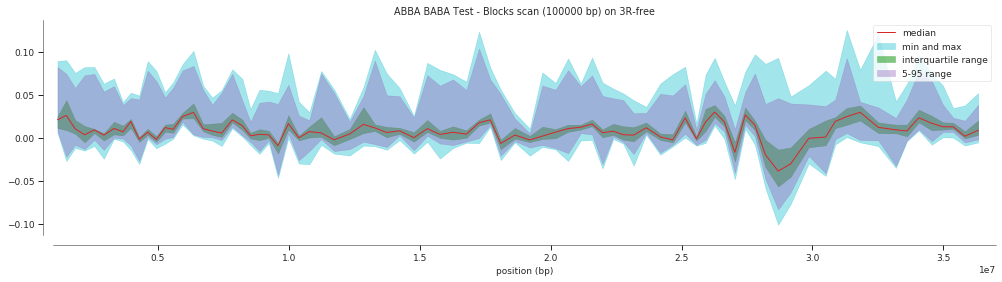

In [59]:
results_3R, bloks_3R, plot_3R = plot_test(A,B,C,D, blen = 100000)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


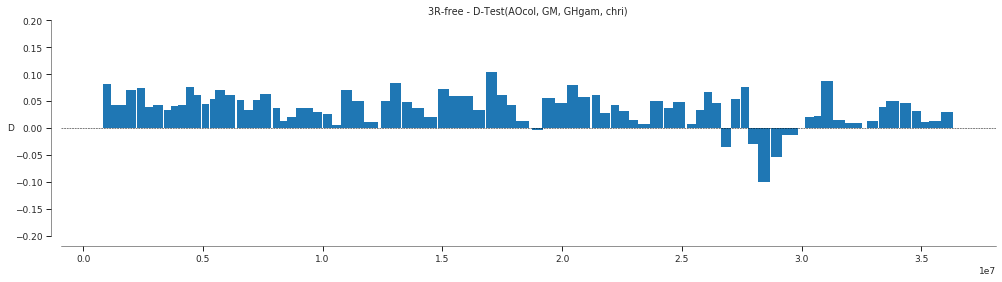

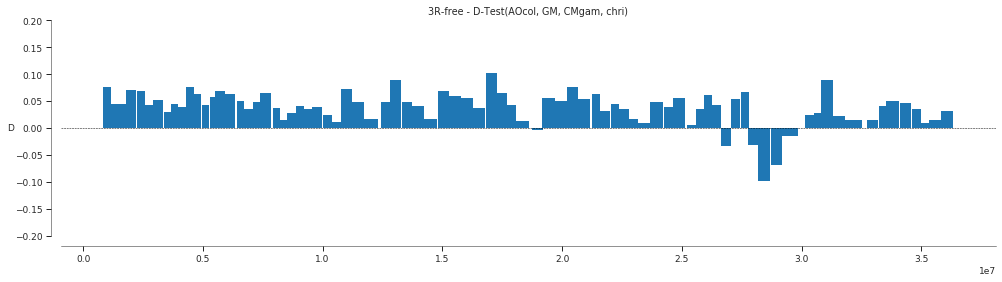

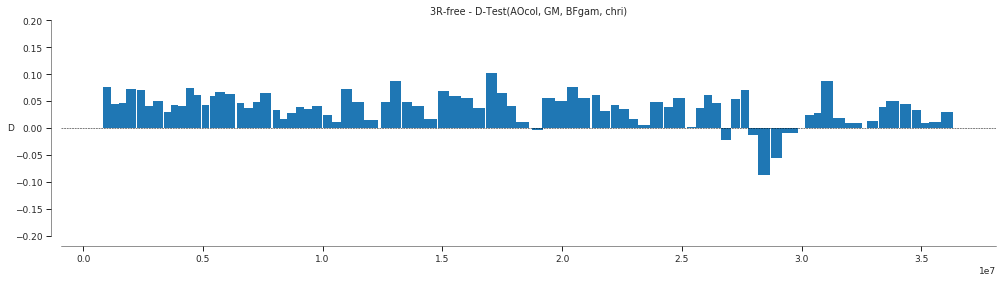

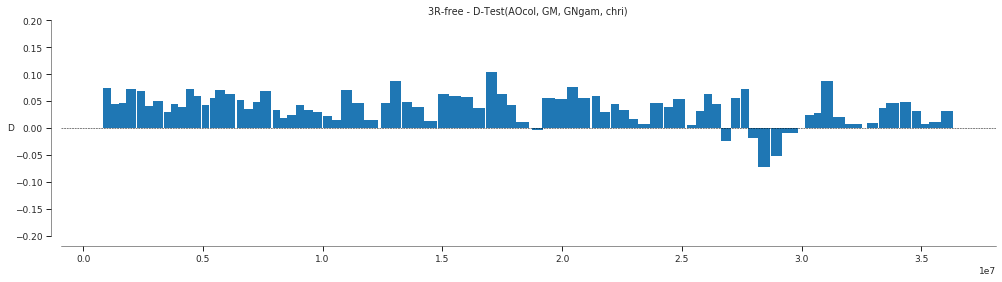

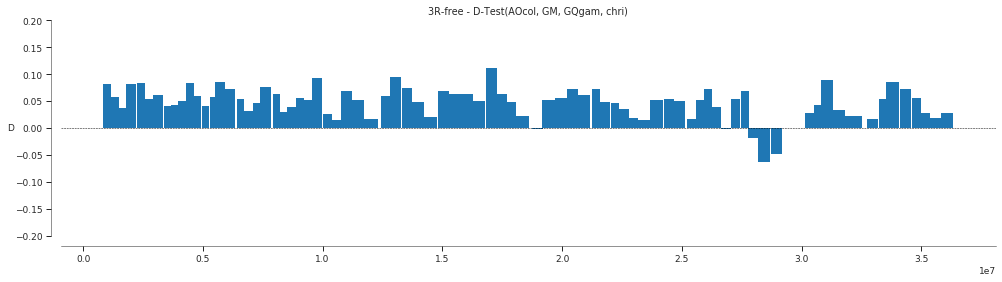

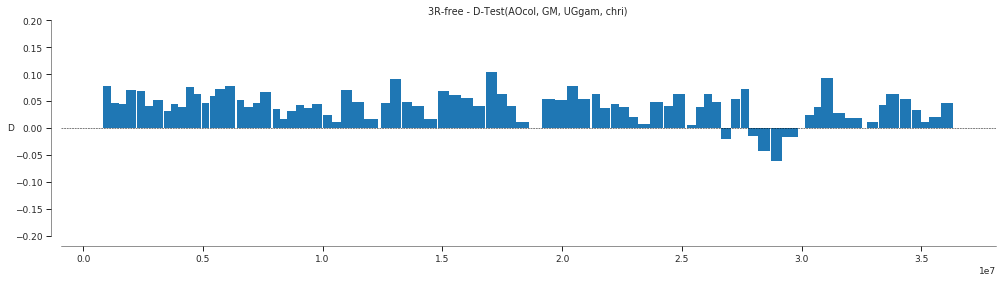

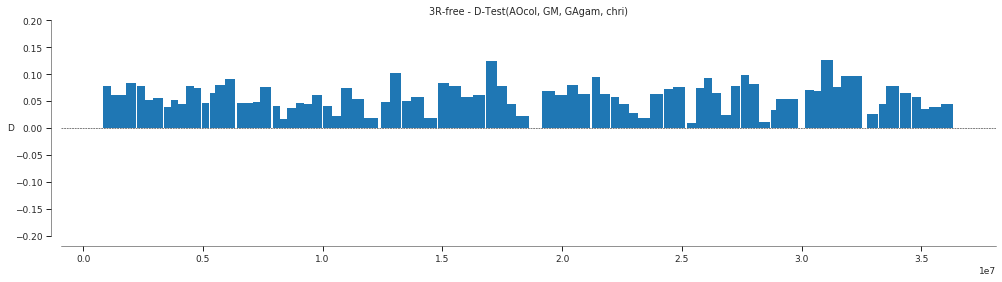

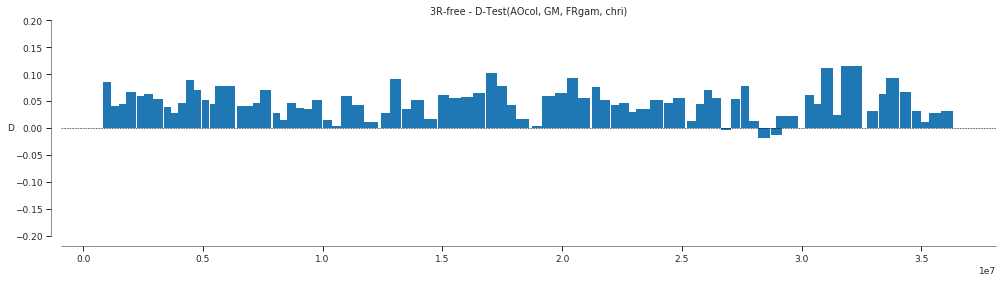

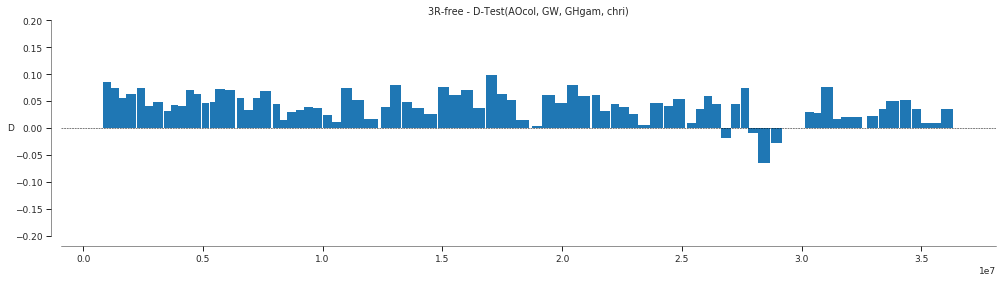

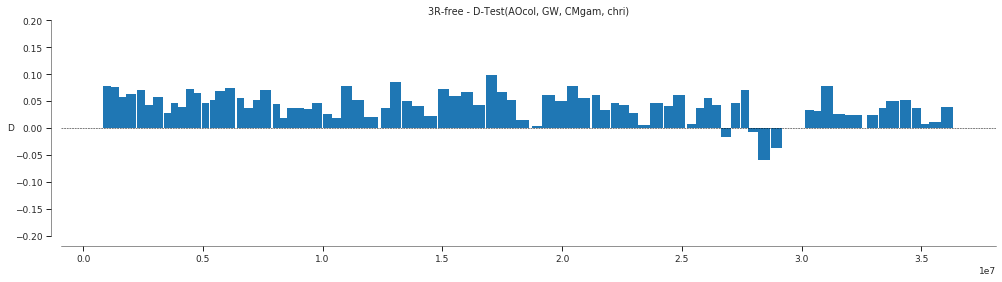

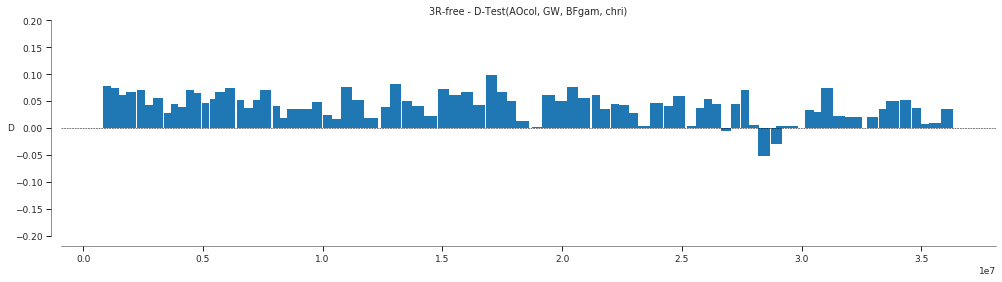

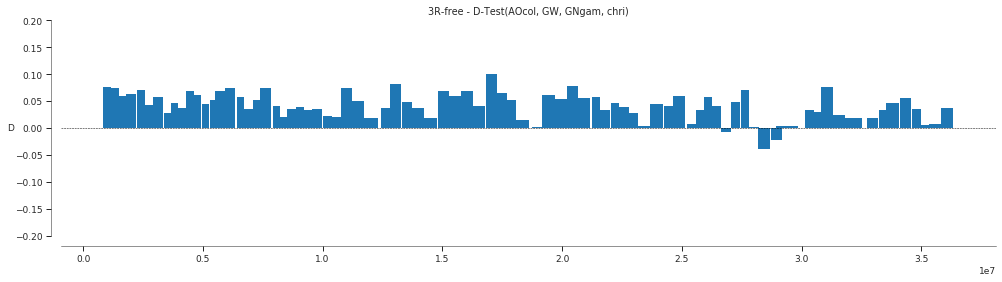

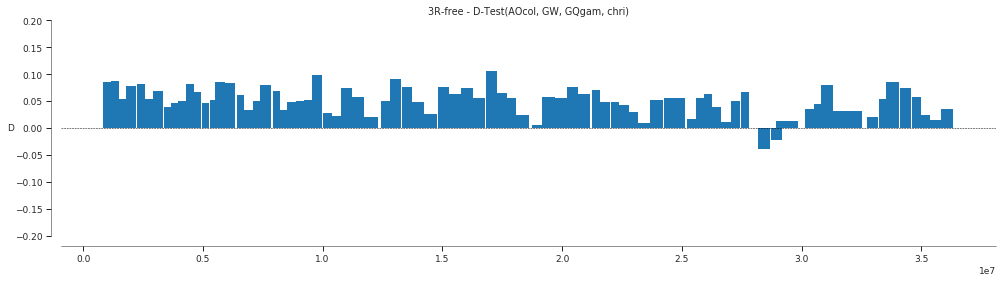

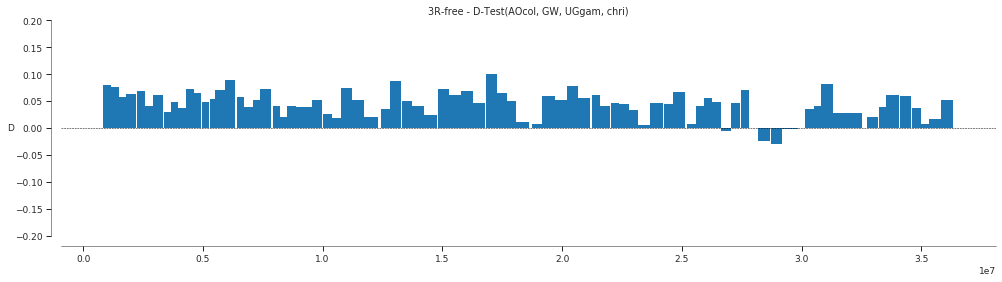

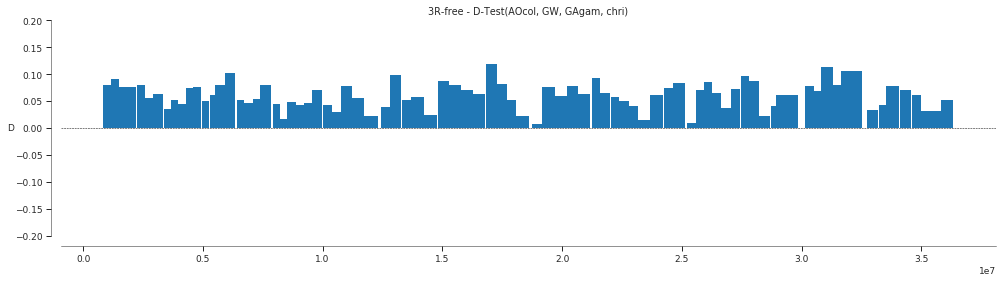

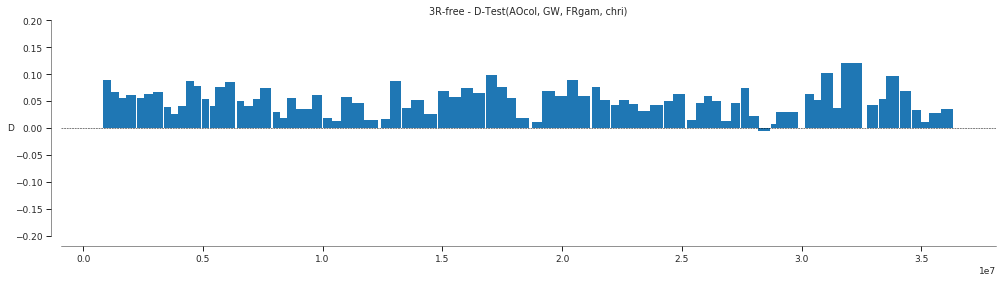

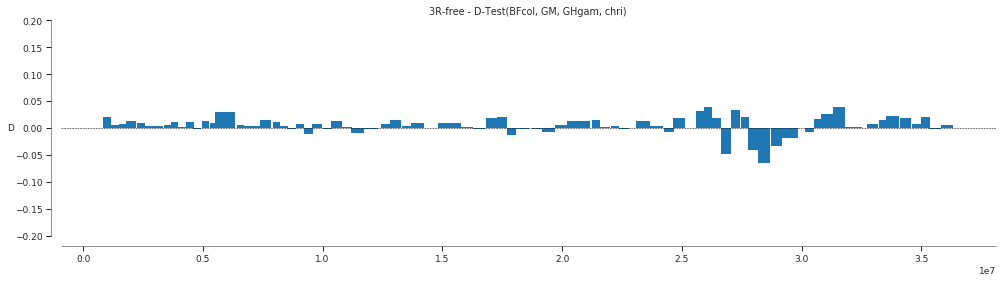

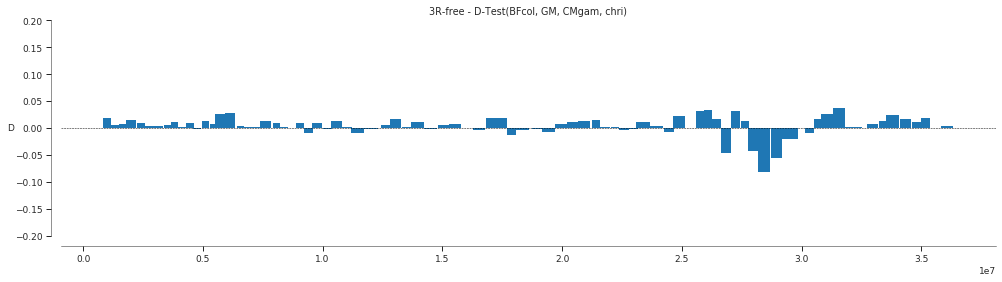

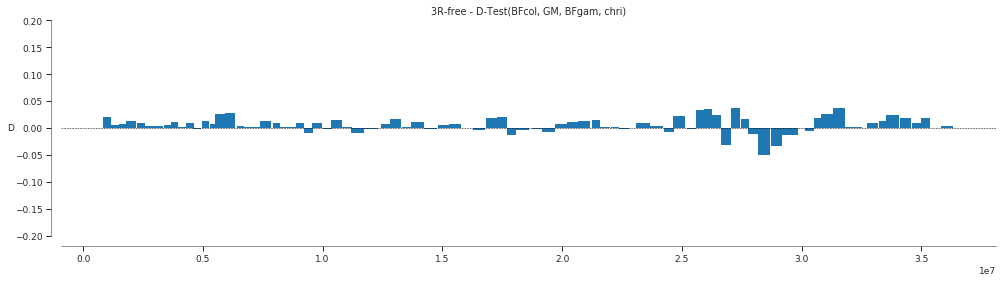

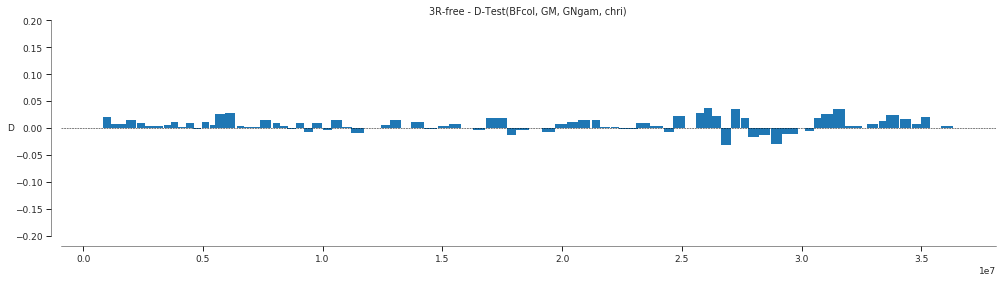

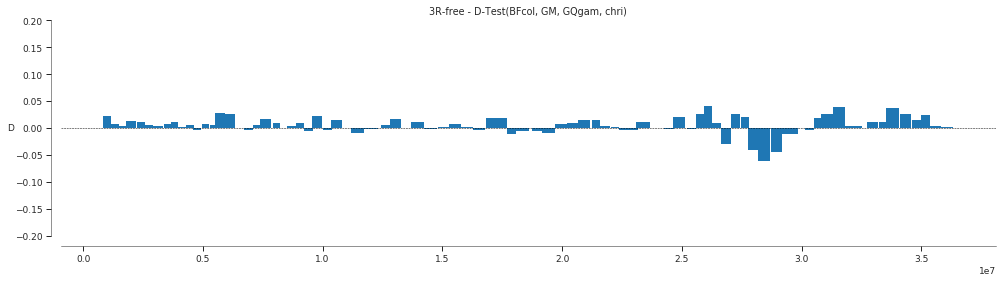

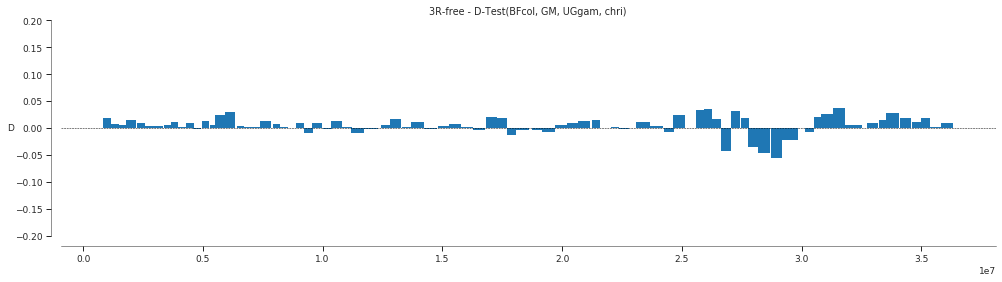

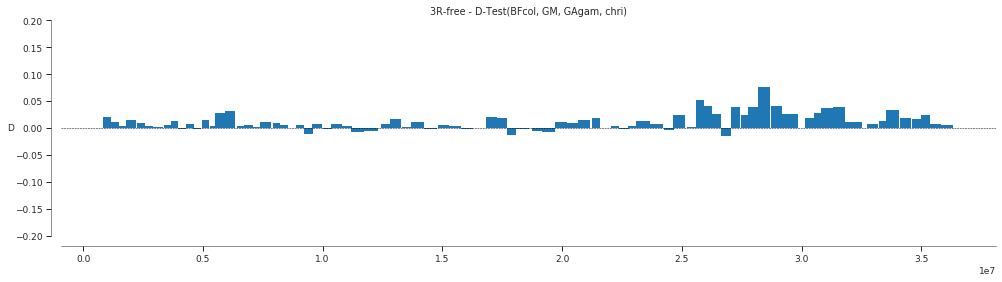

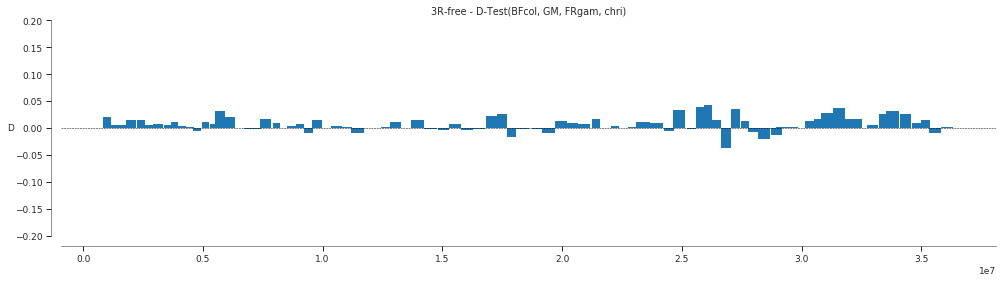

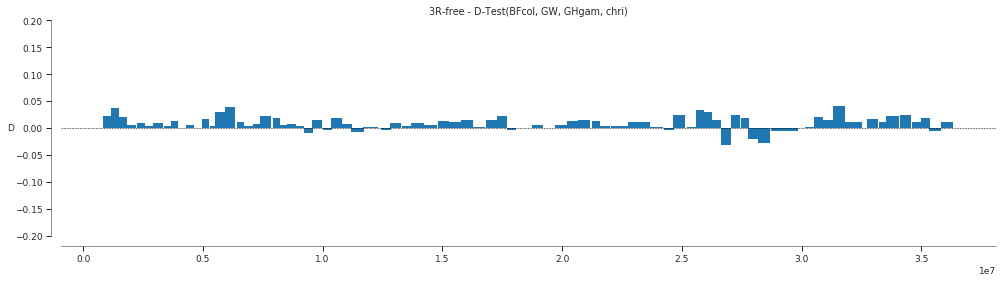

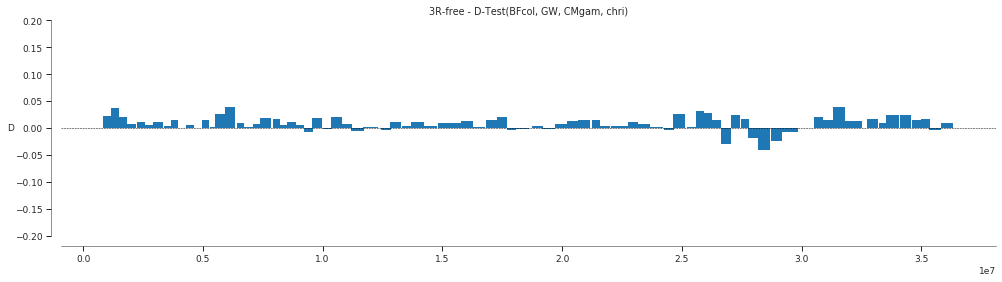

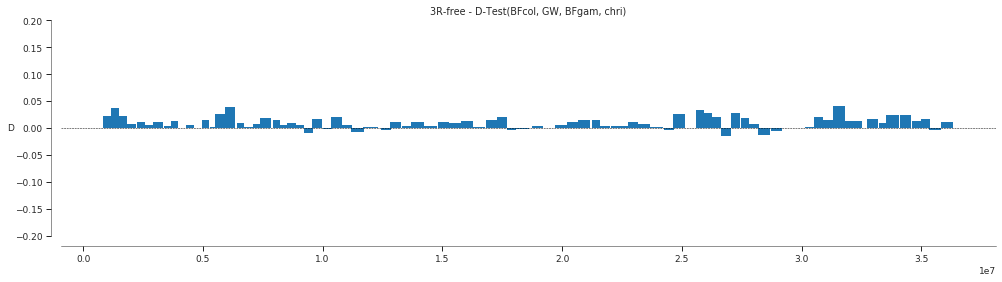

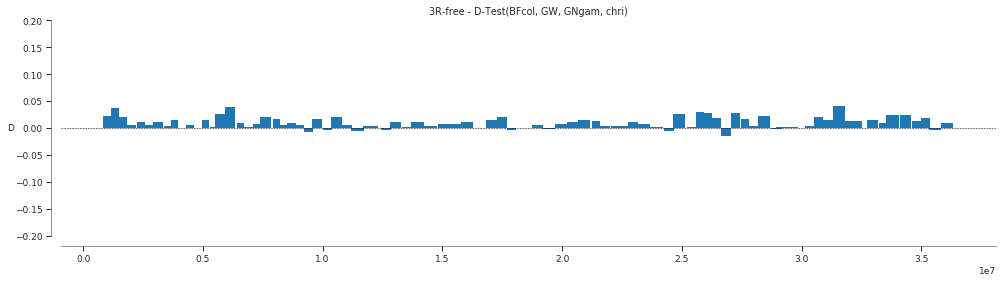

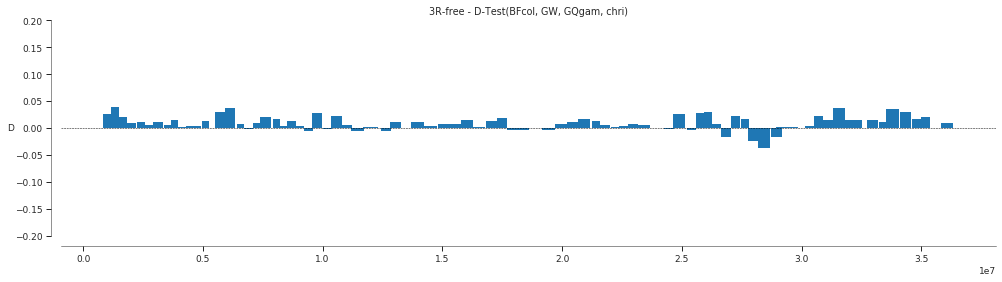

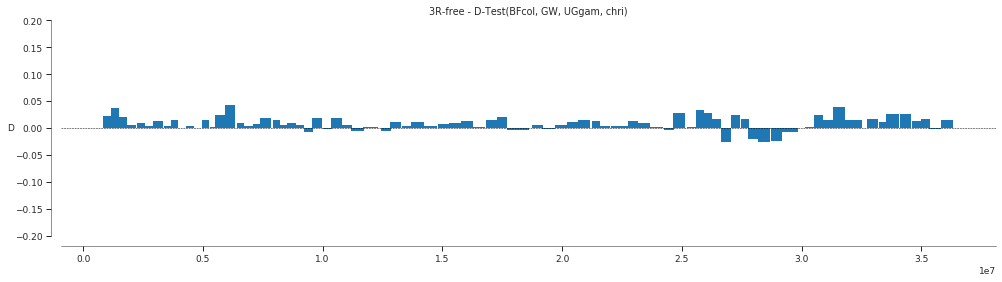

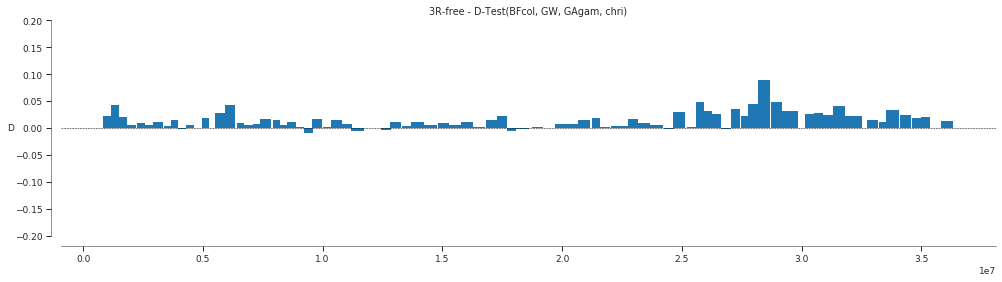

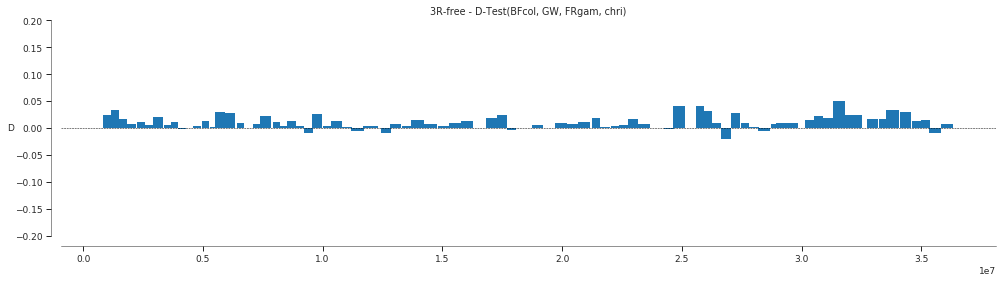

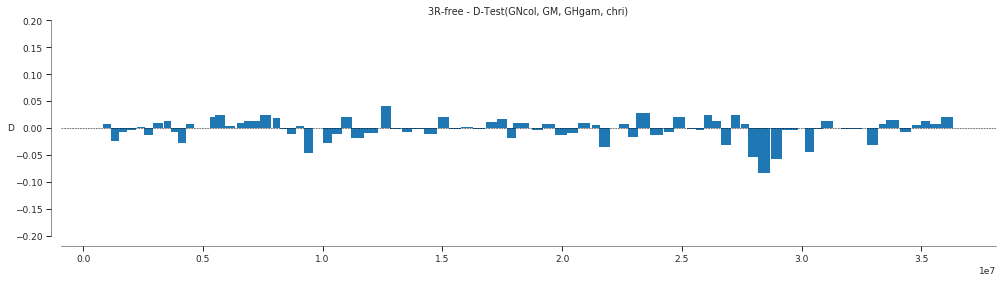

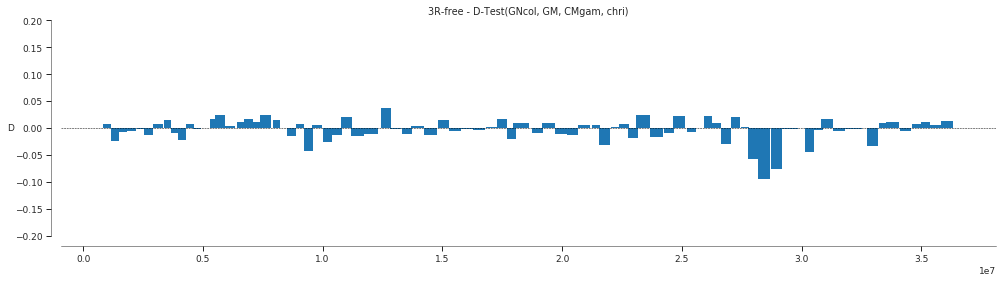

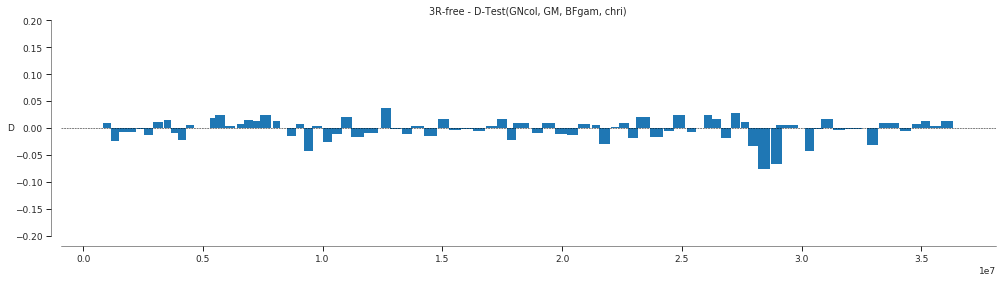

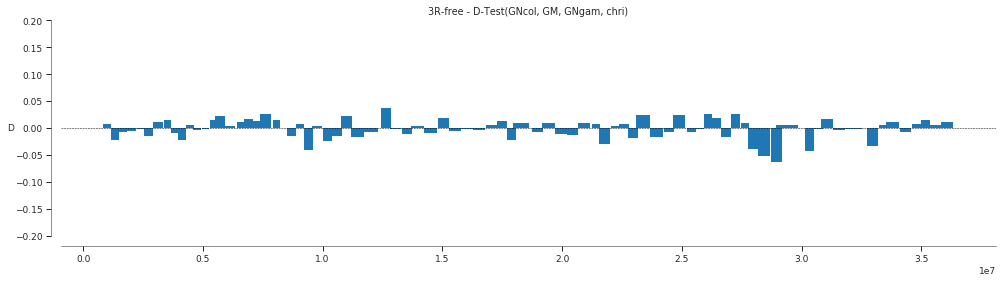

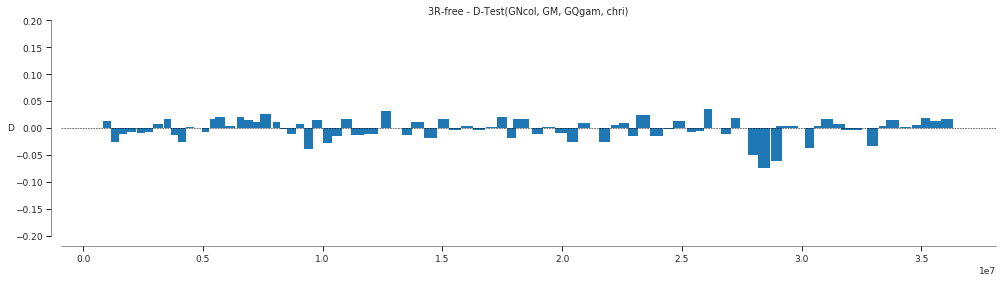

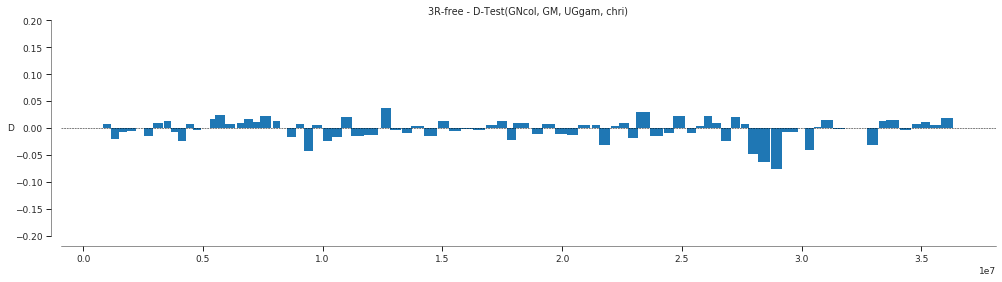

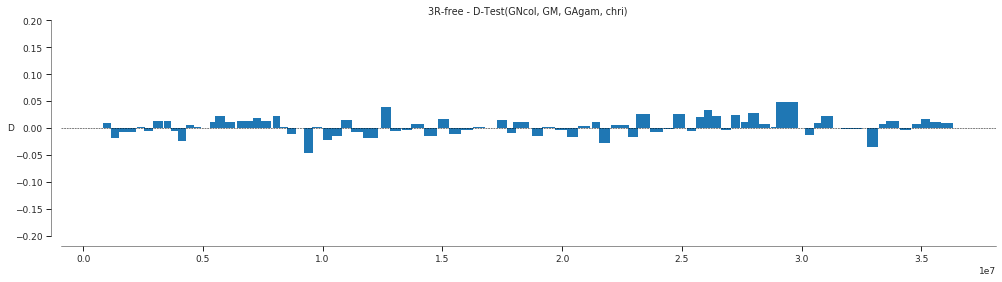

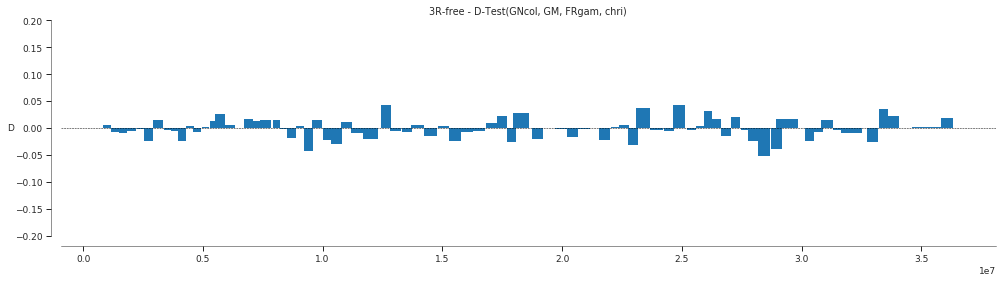

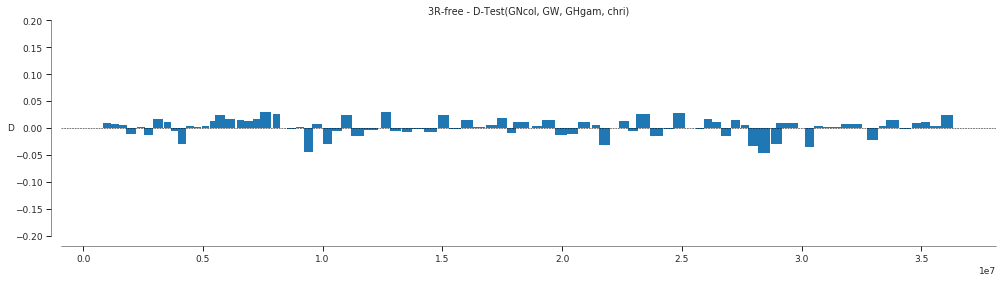

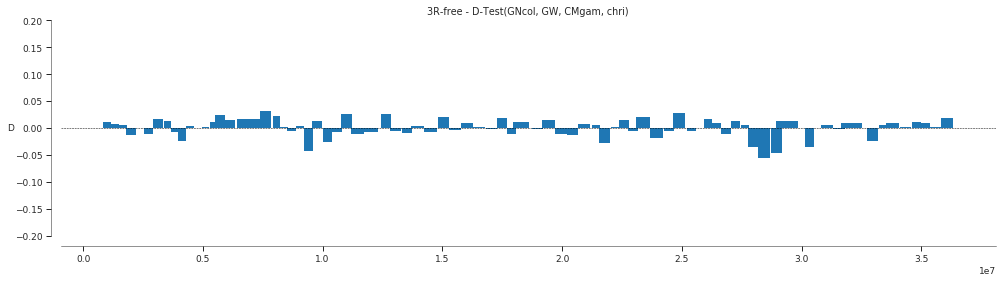

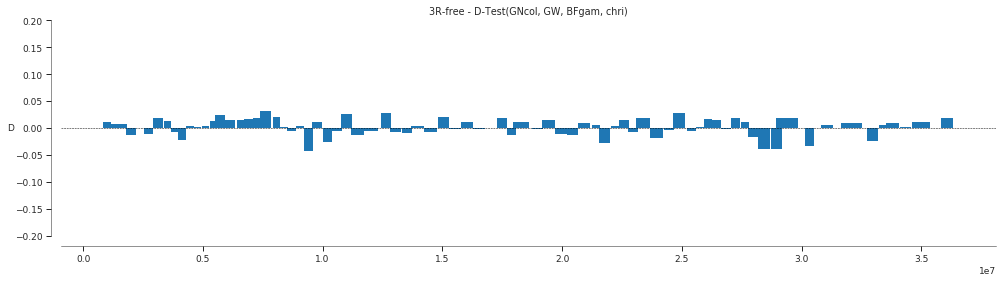

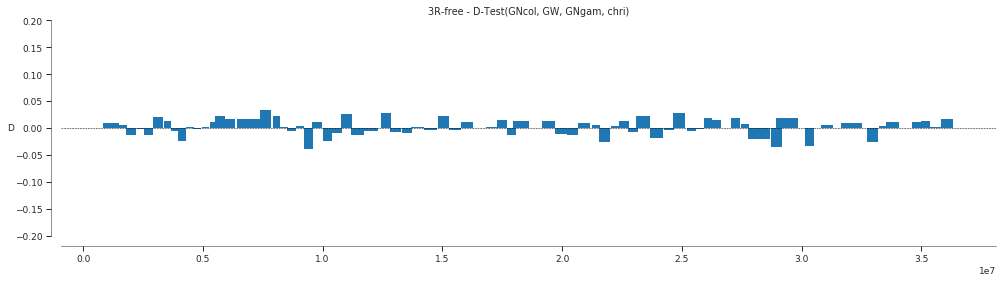

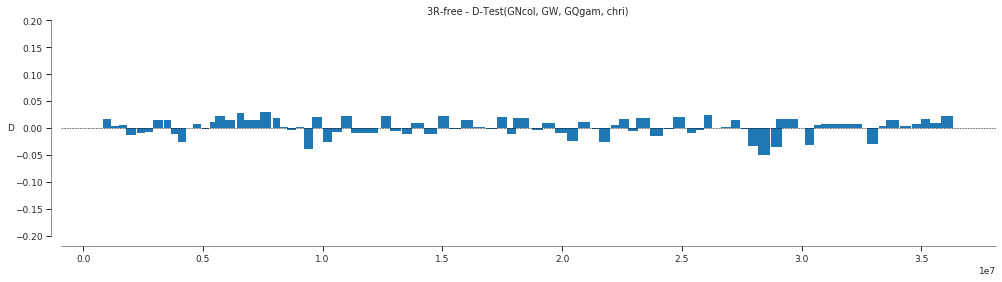

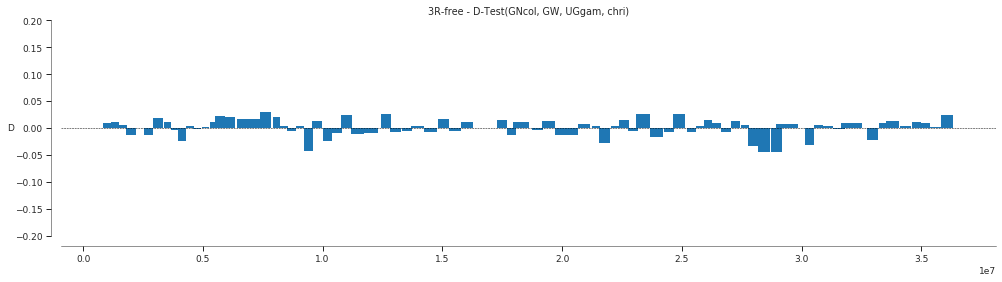

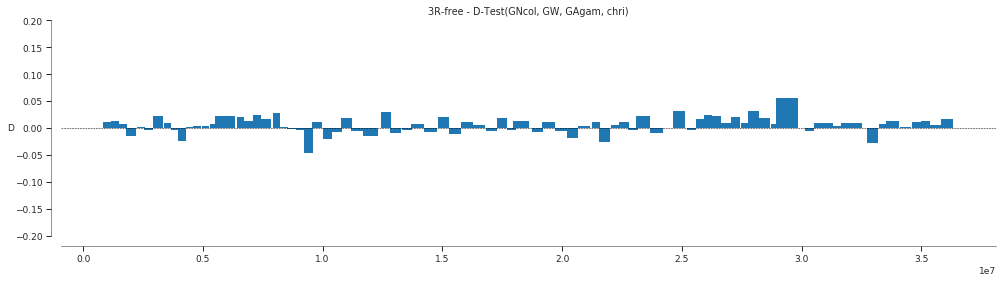

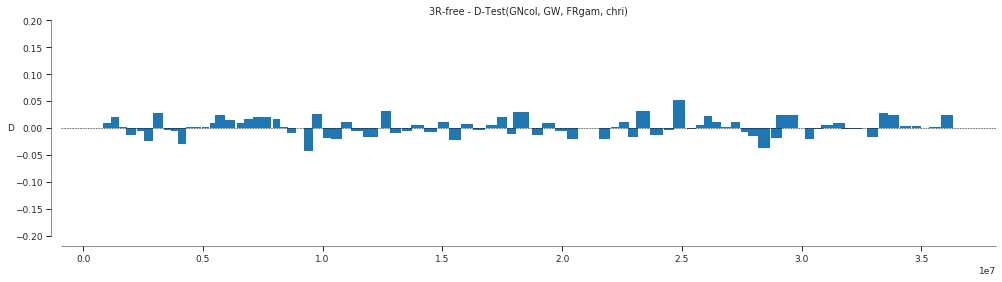

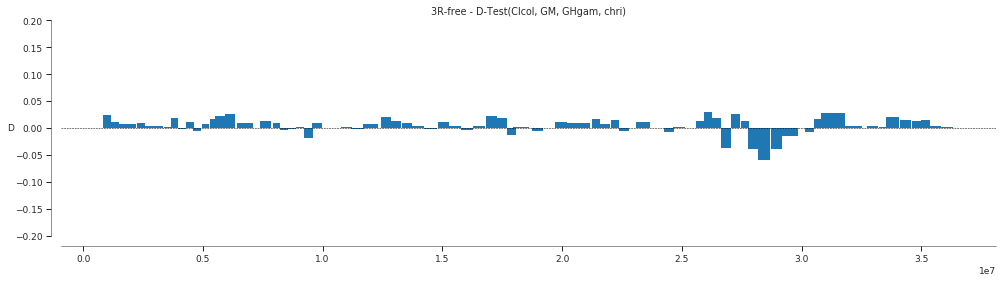

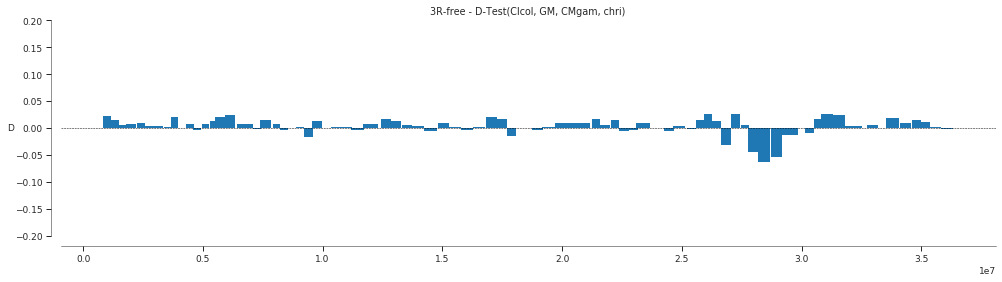

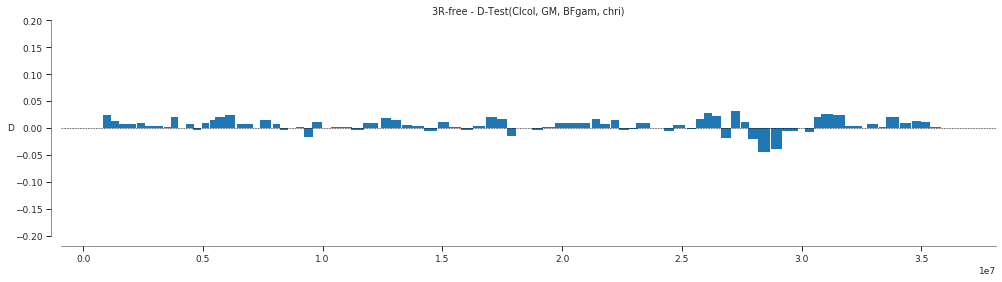

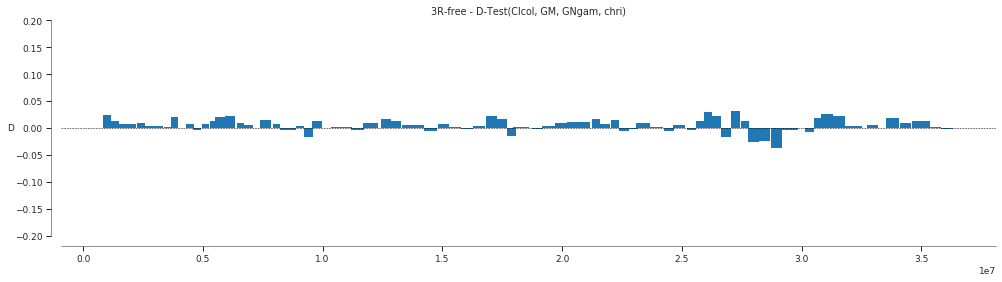

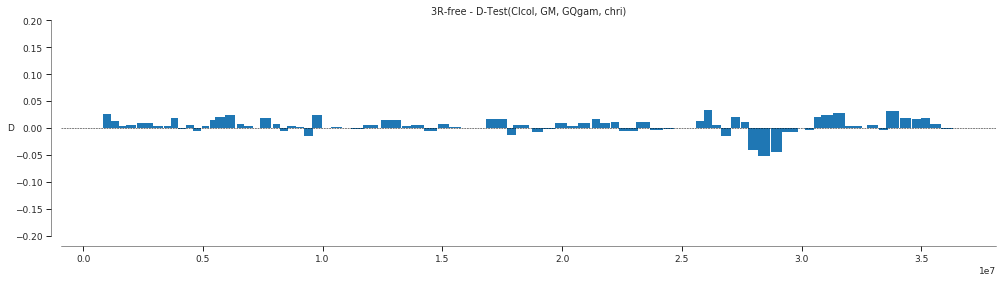

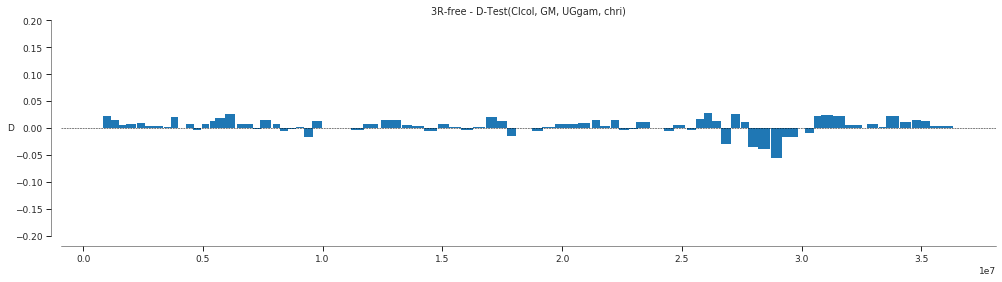

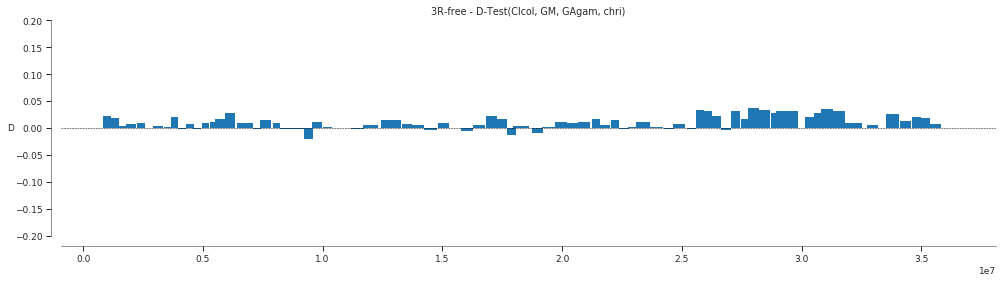

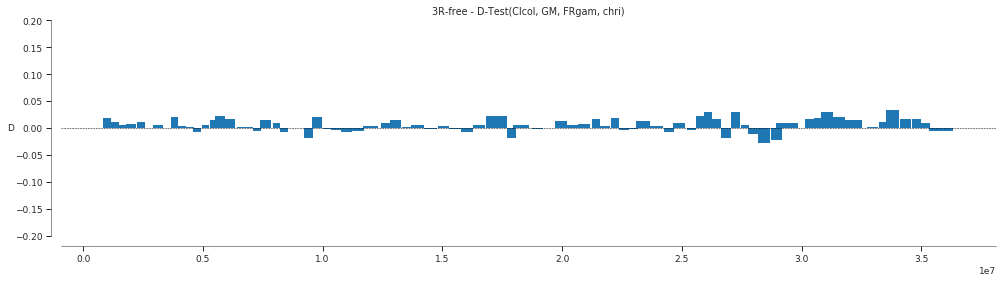

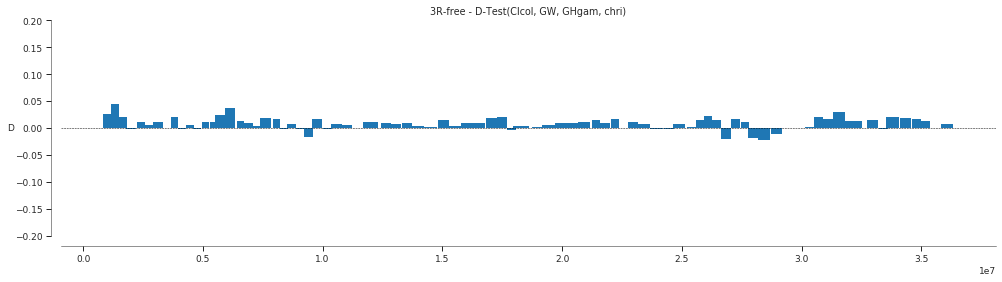

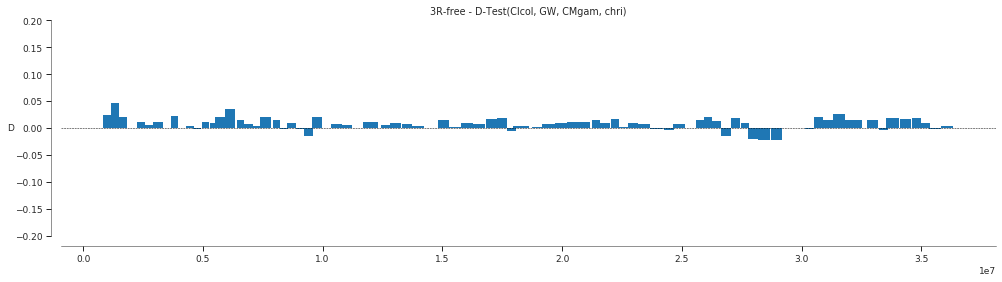

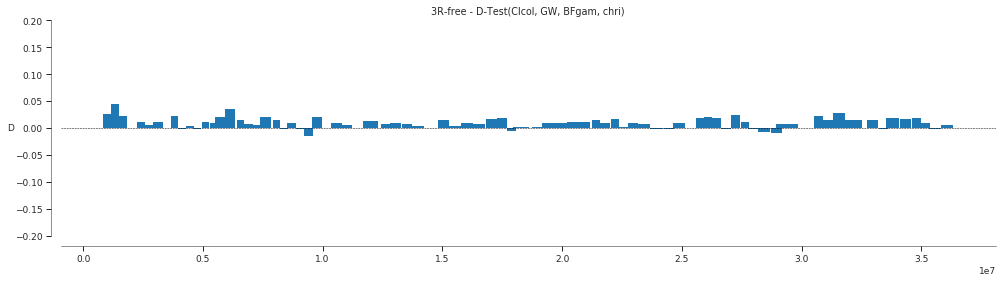

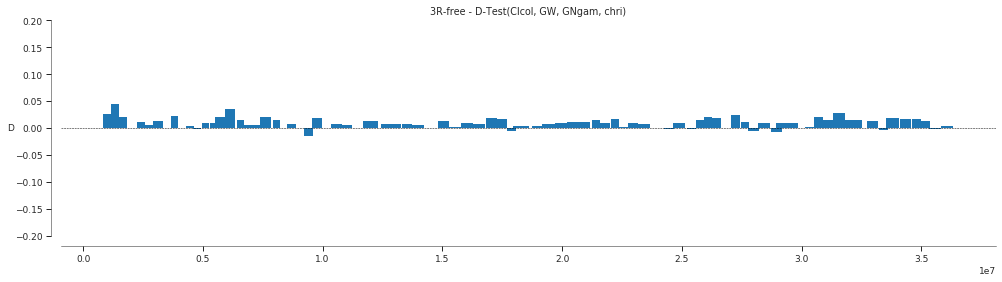

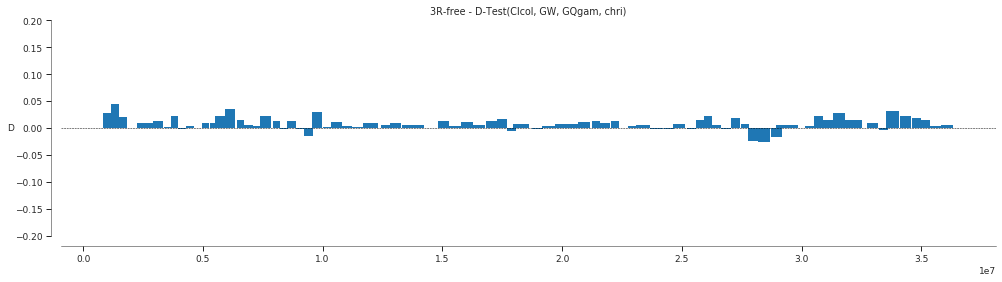

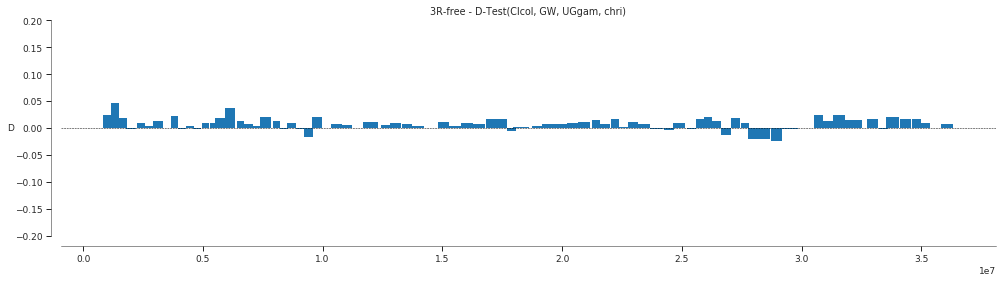

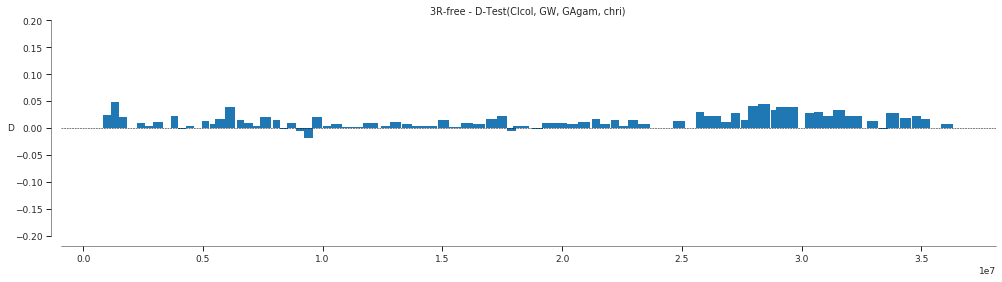

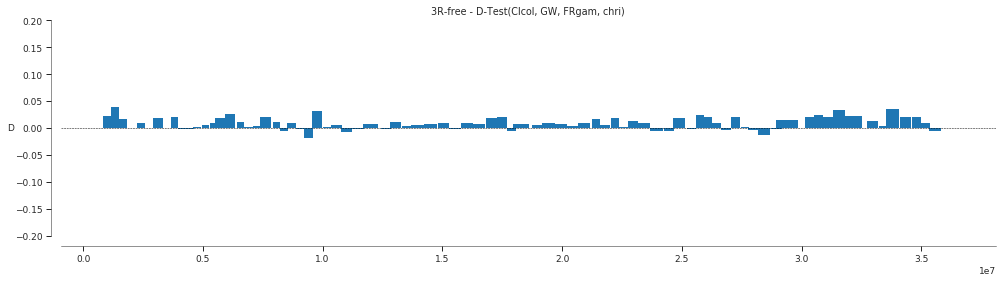

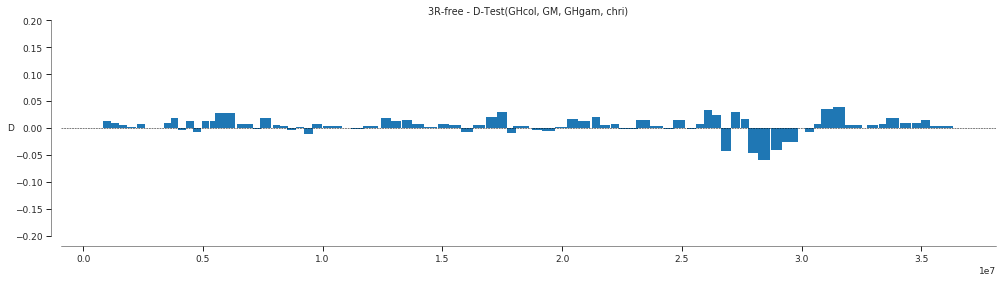

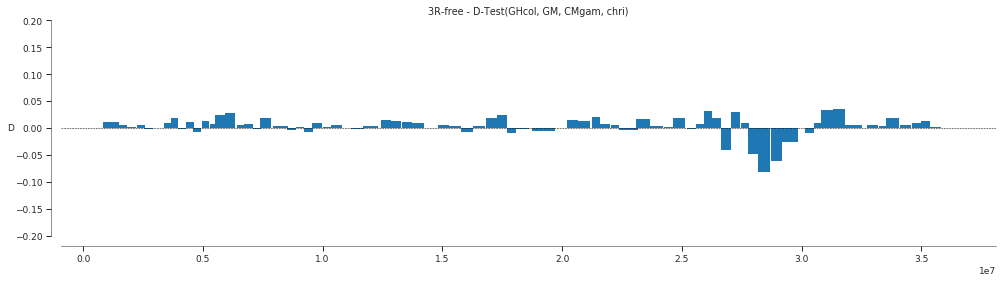

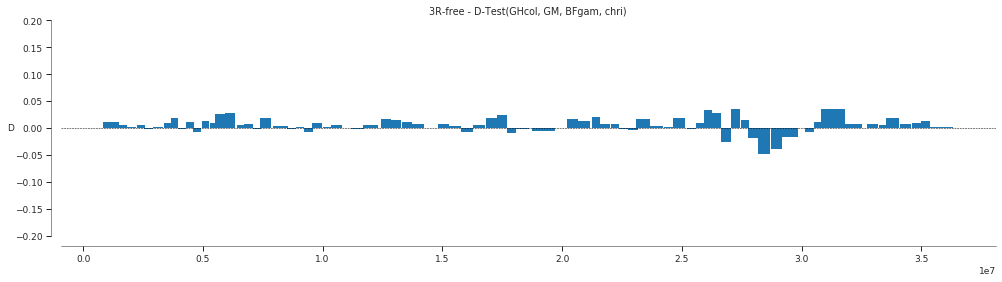

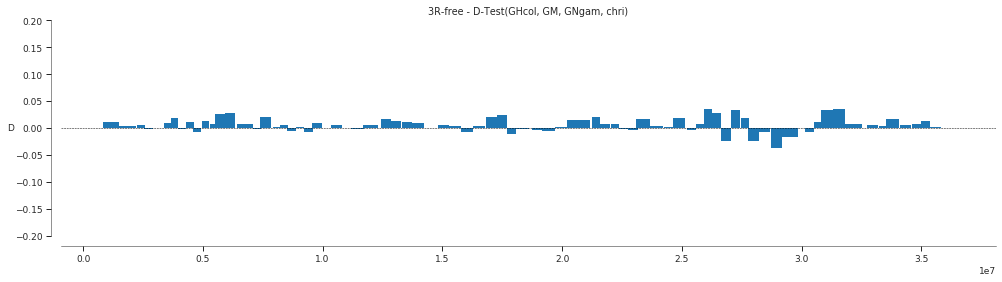

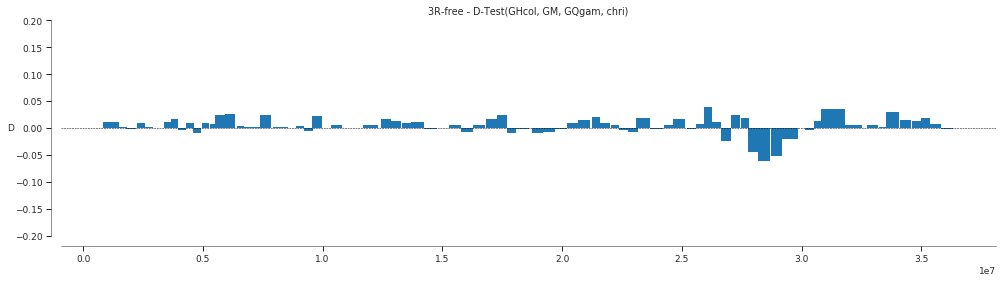

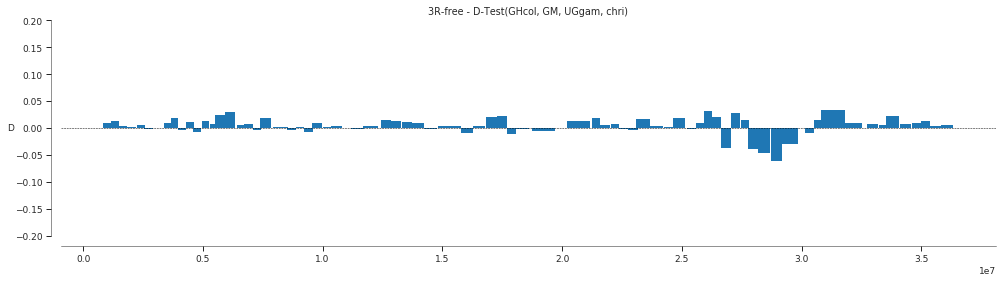

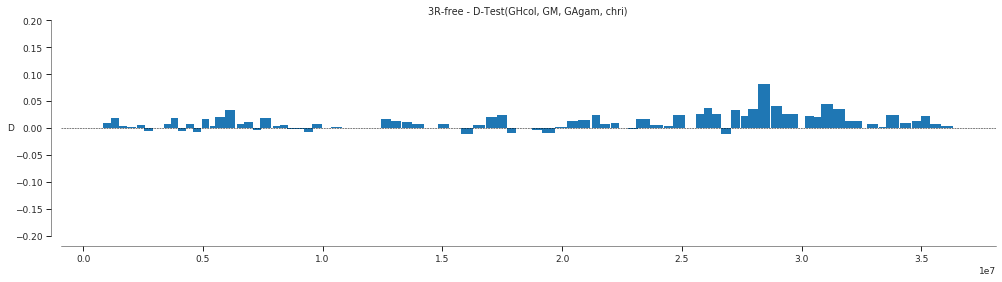

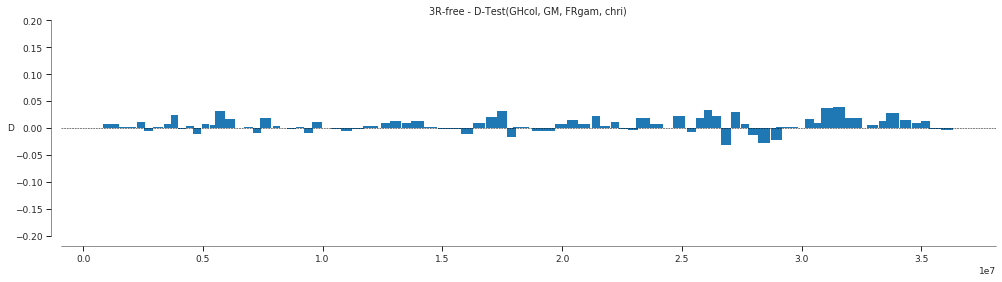

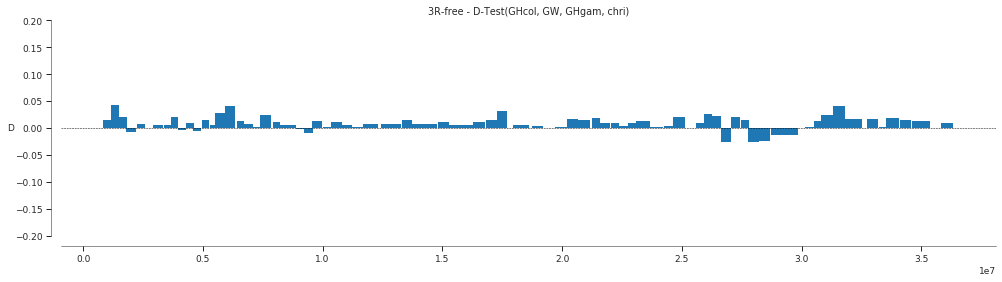

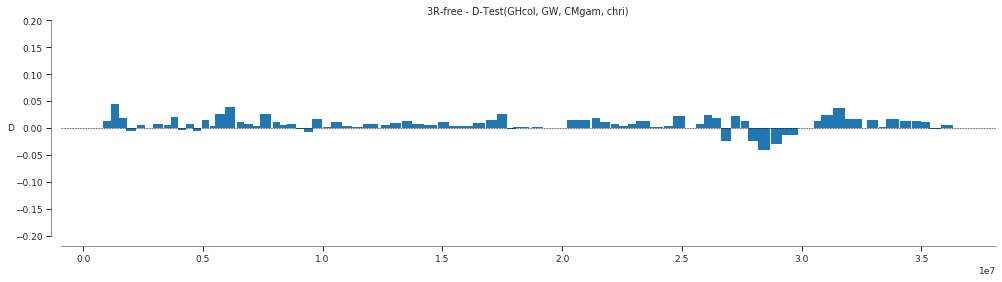

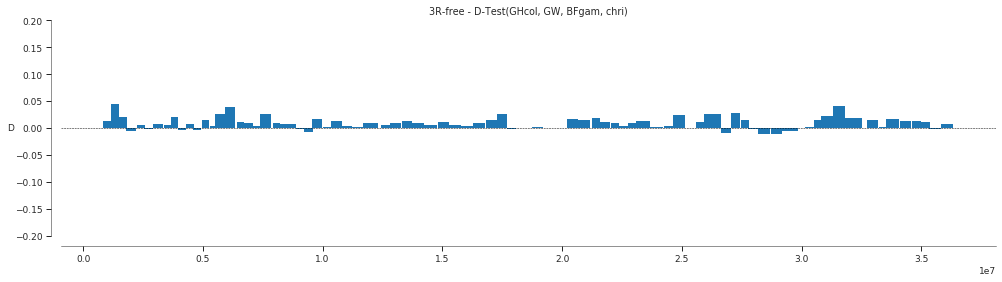

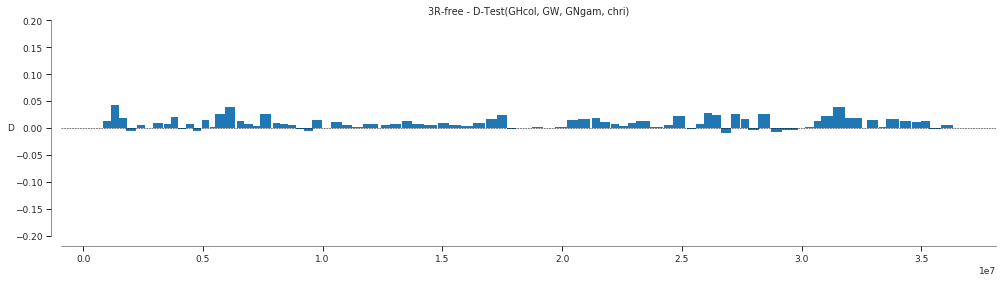

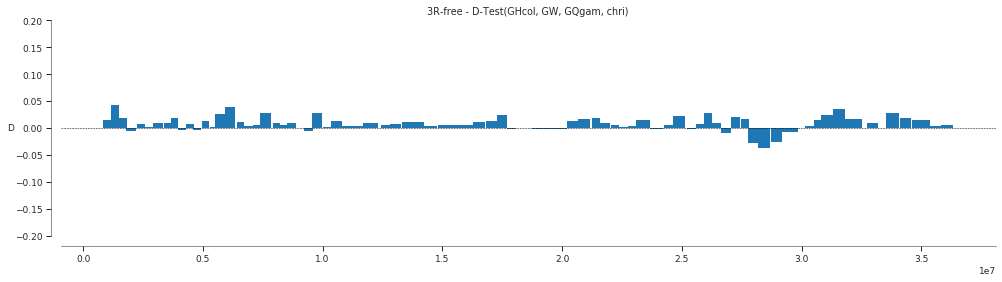

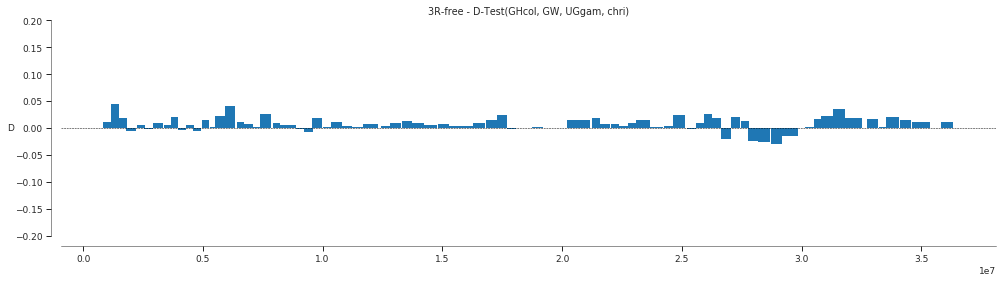

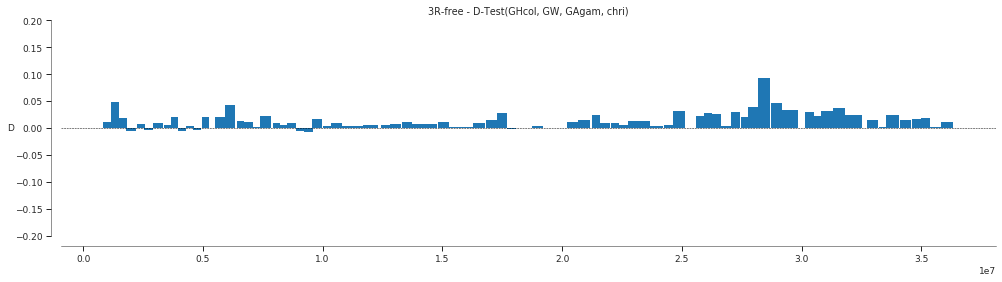

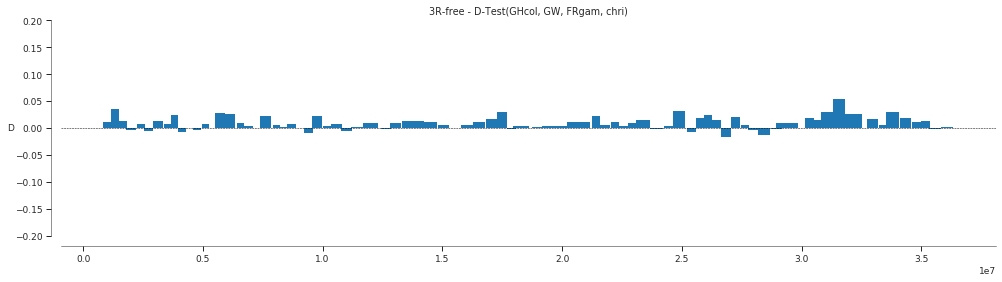

In [60]:
# load variant positions
block_starts = allel.moving_statistic(loc, statistic=np.min, size=100000)
block_stops = allel.moving_statistic(loc, statistic=np.max, size=100000)
block_widths = block_stops - block_starts
title = results_3R['Test']
### qui bisogna fare un ciclo:
for i in range(len(bloks_3R)):	
		ylim=(-.2, .2)
		fig, ax =  plt.subplots(figsize=(14, 4))
		ax.bar(block_starts, bloks_3R[i], width=block_widths, linewidth=0)
		ax.axhline(0, color='k', linestyle='--')
		ax.set_ylabel('D', rotation=0, ha='center', va='center')
		ax.set_ylim(*ylim)
		ax.set_title('%s' %(title[i]))
		sns.despine(ax=ax, offset=10)
		fig.tight_layout()   
i+=1

---------------------------------